## Telecom Churn Case Study

## 1. Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np 

# For string matching
import re

# For EDA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set plot theme
plt.style.use("seaborn-darkgrid")

# For outlier detection and handling
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# For scaling features
from sklearn.preprocessing import StandardScaler

# For Train-Test split
from sklearn.model_selection import train_test_split

# For PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.decomposition import PCA

# For Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE       

# For logistic regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# For Recursive Feature elimination (RFE)
from sklearn.feature_selection import RFE

# Metrics import for model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

# For defining the colors for the Matshow
from matplotlib.colors import ListedColormap

# Check for the VIF values of the feature variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For AUC-ROC curve
from sklearn import metrics

# For Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# For XGBoost
import xgboost as xgb

# For Cross Validation and hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# To Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Options to display entire data

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## 2. Importing Data-set

In [3]:
# Loading data into a dataframe and inspecting a few records

df= pd.read_csv("telecom_churn_data.csv")

df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

## 3. Basic EDA

In [4]:
# Dimensions of data

df.shape

(99999, 226)

> The data has 99999 rows and 226 columns.

In [5]:
# Checking data types of columns

df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [6]:
# Conforming the data types of all columns and check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


> There are no categorical columns and 214 numerical columns and 12 date-type columns in the data. 
>> Some columns can be treated as categorical, will handle those in the further steps.

In [7]:
# Basic statistical description

df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

### a. Removing unnecessary columns

In [8]:
df['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

In [9]:
df['mobile_number'].nunique()

99999

In [10]:
def drop_col(
    col: list = None,
    df: pd.DataFrame = df,
    ignore_cols: list = []
):
    '''
    Function to drop the columns in-place. Also displays shape of data-frame before and after dropping.
    
    Parameters:
    -----------
    col: Column/s to drop in-place
    df: Data-Frame to work on. Default is df
    ignore_cols: Ignore certain columns
    '''
    
    print('Shape before dropping: ', df.shape)
    if len(ignore_cols) > 0:
        col = [i for i in col if (i not in ignore_cols)]
    df.drop(col, inplace = True, axis = 1)
    print('Shape after dropping: ', df.shape)

In [11]:
# The column circle_id has only a single value '109' and is of no use for modelling and mobile number acts as 
# an ID columns hence can be dropped

drop_col(col = ['circle_id', 'mobile_number'])

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 224)


In [12]:
# Removing all date-time columns as it won't aid in modelling/analysis

drop_col(col = df.columns[df.columns.str.contains('date')])

Shape before dropping:  (99999, 224)
Shape after dropping:  (99999, 212)


## 4. EDA

### a. Missing Values Treatment

In [13]:
def missing_thresh(
    df: pd.DataFrame = df,
    thresh: int = 0.10,
    flag: bool = False
):
    '''
    Function to display percentage of missing values present where it is above the defined threshold in descending order.
    
    Parameters:
    -----------
    df: Data-Frame to work on. Default is df
    thresh: Percentage above which missing values must be outputted.
    flag: If true then returns only column names whose missing values percentage is above threshold. If False then displays
    percentage of missing in each column. Default = 0.10 (10%)
    '''
    if not flag:
        print((df.isna().mean()[df.isna().mean() > thresh]).sort_values(ascending = False).round(4) * 100)
    else:
        return (df.isna().mean()[df.isna().mean() > thresh]).sort_values(ascending = False).index

In [14]:
# Dropping all columns which have >30% missing values as even if it we impute '>50%'' will be 0 and hence won't aid in analysis but some columns
# are needed for later uses retaining them

drop_col(missing_thresh(df, thresh = 0.3, flag = True), 
         ignore_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 
                        'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 
                        'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 
                        'av_rech_amt_data_8', 'av_rech_amt_data_9'])

Shape before dropping:  (99999, 212)
Shape after dropping:  (99999, 196)


In [15]:
#displaying all column names that have more than 30% missing values
missing_thresh(df)

total_rech_data_6     74.85
count_rech_3g_6       74.85
av_rech_amt_data_6    74.85
max_rech_data_6       74.85
count_rech_2g_6       74.85
av_rech_amt_data_7    74.43
max_rech_data_7       74.43
count_rech_3g_7       74.43
count_rech_2g_7       74.43
total_rech_data_7     74.43
count_rech_3g_9       74.08
av_rech_amt_data_9    74.08
count_rech_2g_9       74.08
max_rech_data_9       74.08
total_rech_data_9     74.08
count_rech_3g_8       73.66
max_rech_data_8       73.66
total_rech_data_8     73.66
av_rech_amt_data_8    73.66
count_rech_2g_8       73.66
dtype: float64


In [16]:
# Checking for duplicate row entries

print('Shape before dropping duplicates: ', df.shape)
df.drop_duplicates(inplace = True)
print('Shape before after duplicates: ', df.shape)

Shape before dropping duplicates:  (99999, 196)
Shape before after duplicates:  (99999, 196)


> There are no duplicate rows in the data.

> No missing value >10% exists. 
>> approximately 125 columns  have Null values and most of them are about customer recharge data, it is safe to assume that the Null values can be treated as no recharges and hence can be imputed with 0 (constant)

In [17]:
def fillna_col(
    df: pd.DataFrame = df,
    col: list = None,
    val: int = 0
):
    '''
    Function to impute inplace. The function also tries to impute the columns containing 'count' in their heading depending
    on value of recharge amt or recharge data. (via mode or 0)
    
    Parameters:
    -----------
    df: Data-Frame to work on. Default is df
    col: Column/s to impute in-place
    val: Value to impute column/s
    '''
    col = [i for i in col if not re.search('date|jul|aug|jun|sep', i)]
    num_col = [i for i in col if re.search('count', i)]
    if len(num_col):
        print(f'Number columns: {num_col}')
    for i in num_col:
        df.loc[(df['total_rech_amt_' + i[-1]] != np.nan) | (df['total_rech_data_' + i[-1]] != np.nan), i].fillna(0)
        df[i].fillna(df[i].mode()[0], inplace = True)
    col = [i for i in col if i not in num_col]
    df.fillna({i: 0 for i in col}, inplace = True)
    print(f'\nColumns impute with value {val}')

In [18]:
fillna_col(df, missing_thresh(df, thresh = 0.0, flag = True))

Number columns: ['count_rech_3g_6', 'count_rech_2g_6', 'count_rech_3g_7', 'count_rech_2g_7', 'count_rech_3g_9', 'count_rech_2g_9', 'count_rech_2g_8', 'count_rech_3g_8']

Columns impute with value 0


In [19]:
missing_thresh(df, thresh = 0.0)

Series([], dtype: float64)


> Treated all missing values except for columns containing datetime entries

By problem statement we know that months 6 and 7 can be treated as good phase, 8 as action phase and 9 as churn phase. We average the recharge values of the good phase to filter out the high value customers (top 30%)

In [20]:
# Calculating average rechage amount for months '6' and '7'

df['rech_amt_avg'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [21]:
# Calculating average rechage amount-data for months '6' and '7'

df['rech_data_avg'] = df['av_rech_amt_data_6'] + df['av_rech_amt_data_7']

In [22]:
# Calculating overall average recharge (data + amount) for months '6' and '7'

df['rech_avg'] = df['rech_amt_avg'] + df['rech_data_avg']

In [23]:
# Determining threshold for high value customers

high_val_thresh = df['rech_avg'].quantile(0.7)

In [24]:
# Extracting high value customer

df = df[df['rech_avg'] > high_val_thresh]

### b. Feature Engineering

In [25]:
# Checking dimensions before introducing new variables

df.shape

(29969, 199)

In [26]:
# Creating a new categorical variable to determine probabilities of churning

df['churn_prob_cat'] = 0

> The variable will have categories 'Very Low', 'Low', 'Medium', 'High' and 'Very High' specifying the probability of churning but as we will be needing to convert it into dummy variables later we'll be coding the categories from 0 to 4. 

In [27]:
# Checking dimensions after introducing new variables

df.shape

(29969, 200)

> **The logic behind identifying the categories is that we try to identify the trends in recharge (both of amount and in data) using percentage changes across the months '6', '7' and '8' and bin the data accordingly into the respective 5 categories.**

In [28]:
# Columns to determine churn Probability depending on Spend rate of the '6th', '7th' and '8th' months

rech_num_cols = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']
rech_amt_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
rech_data_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']
count_rech_2g_cols = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8']
count_rech_3g_cols = ['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']

In [29]:
def pct_hist(
    cols: list = [None],
    df: pd.DataFrame = df
):
    '''
    Function to calculate percentage across the columns and display a histogram to determine the cut-off for churn 
    probability and create neccessary categories
    
    Parameters:
    -----------
    cols: Column/s to calculate percentage change
    df: Data-Frame to work on. Default is df
    '''
    
    # Temporary data-frame
    
    temp = df[cols]
    
    # To handle NaN output from pct_change
    for i in cols:
        temp[i].replace(to_replace = 0, value = np.nan, inplace = True)
    temp.dropna(inplace = True)
    
    temp = temp.pct_change(axis = 1)
    temp['net'] = temp.sum(axis = 1)
    
    temp['net'] = pd.cut(temp['net'], bins = 5, labels = [0, 1, 2, 3, 4])
    cond = df.loc[temp.index, 'churn_prob_cat'] > temp['net'].astype('int')
    
    temp.loc[cond, 'net'] = df.loc[temp.index, 'churn_prob_cat']
    
    print('Individual category counts before analysing trend')
    print('\n', df['churn_prob_cat'].value_counts().to_frame())
    
    print('\n\n')
    
    df.loc[temp.index, 'churn_prob_cat'] = temp['net'].astype('int')
    
    print('Individual category counts after analysing trend')
    print('\n', df['churn_prob_cat'].value_counts().to_frame())

In [30]:
pct_hist(rech_num_cols)

Individual category counts before analysing trend

    churn_prob_cat
0           29969



Individual category counts after analysing trend

    churn_prob_cat
0           29861
1              82
2              13
3              11
4               2


In [31]:
pct_hist(rech_amt_cols)

Individual category counts before analysing trend

    churn_prob_cat
0           29861
1              82
2              13
3              11
4               2



Individual category counts after analysing trend

    churn_prob_cat
0           29857
1              85
2              13
3              11
4               3


In [32]:
pct_hist(rech_data_cols)

Individual category counts before analysing trend

    churn_prob_cat
0           29857
1              85
2              13
3              11
4               3



Individual category counts after analysing trend

    churn_prob_cat
0           29572
1             341
2              37
3              13
4               6


In [33]:
pct_hist(count_rech_2g_cols)

Individual category counts before analysing trend

    churn_prob_cat
0           29572
1             341
2              37
3              13
4               6



Individual category counts after analysing trend

    churn_prob_cat
0           29361
1             526
2              57
3              18
4               7


In [34]:
pct_hist(count_rech_3g_cols)

Individual category counts before analysing trend

    churn_prob_cat
0           29361
1             526
2              57
3              18
4               7



Individual category counts after analysing trend

    churn_prob_cat
0           28989
1             855
2              88
3              25
4              12


In [35]:
# Removing all columns that have single values in all rows

cols = list()
for i in df.columns:
    if len(df[i].value_counts()) <= 1:
        cols.append(i)
drop_col(cols, df)

Shape before dropping:  (29969, 200)
Shape after dropping:  (29969, 189)


In [36]:
# Removing columns that were used making 'churn_prob_cat'

cols = list()
cols.extend(rech_num_cols)
cols.extend(rech_amt_cols)
cols.extend(rech_data_cols)
cols.extend(count_rech_2g_cols)
cols.extend(count_rech_3g_cols)
drop_col(cols, df)

Shape before dropping:  (29969, 189)
Shape after dropping:  (29969, 174)


In [37]:
# Creating the dependent variable based on usage as defined in the problem statement

df['churn'] = 0

df.loc[(df['total_ic_mou_9'] == 0) & (df['total_og_mou_9'] == 0) & (df['vol_2g_mb_9'] == 0) & 
       (df['vol_3g_mb_9'] == 0), 'churn'] = 1

In [38]:
#checking the percentage of values in each class (0 & 1) of churn
df['churn'].value_counts(normalize = True) * 100

0    92.008409
1     7.991591
Name: churn, dtype: float64

In [39]:
#typecasting the dependent variable as integer
df['churn'] = df['churn'].astype('int')

In [40]:
# Adhering to naming convention - Some columns have been named Jun, Jul,... rather than '6', '7',... standardising them

df = df.rename(columns = {'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7','aug_vbc_3g': 'vbc_3g_8', 
                          'sep_vbc_3g': 'vbc_3g_9'},)
df.columns[df.columns.str.contains('jun|jul|aug|sep')]

Index([], dtype='object')

In [41]:
# Analysing trends for Value Based Customer (VBC)

vbc_cols = df.columns[df.columns.str.contains('vbc')]
pct_hist(cols = vbc_cols, df = df)

Individual category counts before analysing trend

    churn_prob_cat
0           28989
1             855
2              88
3              25
4              12



Individual category counts after analysing trend

    churn_prob_cat
0           28979
1             859
2              91
3              26
4              14


In [42]:
# Converting some columns to categorial type depednding on the percentile

'''
---Categories---
0: Low
1: Moderate
2: Above average
3: High
'''

temp = df['total_ic_mou_6'] + df['total_og_mou_6']
df['total_mou_6'] = pd.qcut(temp, q = 4, labels = [0, 1, 2, 3]).astype('int')

temp = df['total_ic_mou_7'] + df['total_og_mou_7']
df['total_mou_7'] = pd.qcut(temp, q = 4, labels = [0, 1, 2, 3]).astype('int')

temp = df['total_ic_mou_8'] + df['total_og_mou_8']
df['total_mou_8'] = pd.qcut(temp, q = 4, labels = [0, 1, 2, 3]).astype('int')

In [43]:
# Checking for missing values

missing_thresh(df, thresh = 0.0)

Series([], dtype: float64)


In [44]:
# Removing all columns containing the chrun phase month data (_9)

drop_col(df.columns[df.columns.str.contains('_9')], df)

Shape before dropping:  (29969, 178)
Shape after dropping:  (29969, 132)


In [45]:
# Taking out categorical columns which will be used during EDA

cat_cols = ['total_mou_6', 'total_mou_7', 'total_mou_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'churn_prob_cat', 
            'churn']

In [46]:
# Checking if dummy variables creation is necessary
df[cat_cols].dtypes

total_mou_6       int32
total_mou_7       int32
total_mou_8       int32
monthly_2g_6      int64
monthly_2g_7      int64
monthly_2g_8      int64
churn_prob_cat    int64
churn             int32
dtype: object

# 4. EDA - Visualization and Outlier analysis

In [47]:
def bar(
    col_str: str,
    df: pd.DataFrame,
    title: str = ''
):
    '''
    Function to plot bar graph
    col_str: String to find all columns having the 'col_str'
    title: Title for the bar plot
    '''
    
    good_ph_cols = df.columns[df.columns.str.contains(col_str) & (df.columns.str.contains('_6') |
                                                                  df.columns.str.contains('_7'))]
    action_ph_cols = df.columns[df.columns.str.contains(col_str) & (df.columns.str.contains('_8'))]
    
    temp = pd.DataFrame()
    temp[col_str + '_goodPh'] = df[good_ph_cols].sum(axis = 1)
    temp[col_str + '_actionPh'] = df[action_ph_cols]   
    temp['churn'] = df['churn']

    temp1 = pd.DataFrame(columns = ['Churn', 'No Churn'])
    temp1.loc['goodPh'] = temp.loc[temp['churn'] == 1, col_str + '_goodPh'].mean(), temp.loc[temp['churn'] == 0, col_str + '_goodPh'].mean()
    temp1.loc['actionPh'] = temp.loc[temp['churn'] == 1, col_str + '_actionPh'].mean(), temp.loc[temp['churn'] == 0, col_str + '_actionPh'].mean()

    temp1.plot(kind = 'bar', figsize = (12, 7))
    
    plt.xticks(ticks = (0, 1), labels = ['Good Phase', 'Action Phase'], rotation = 0)
    plt.title(title, fontsize = 18)

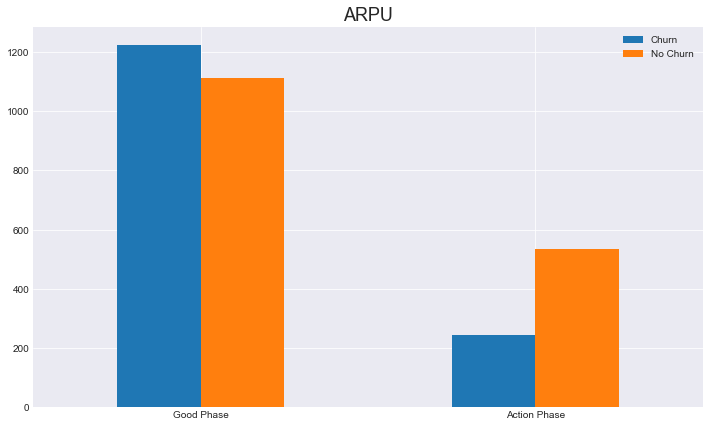

In [48]:
bar('arpu', df, "ARPU")

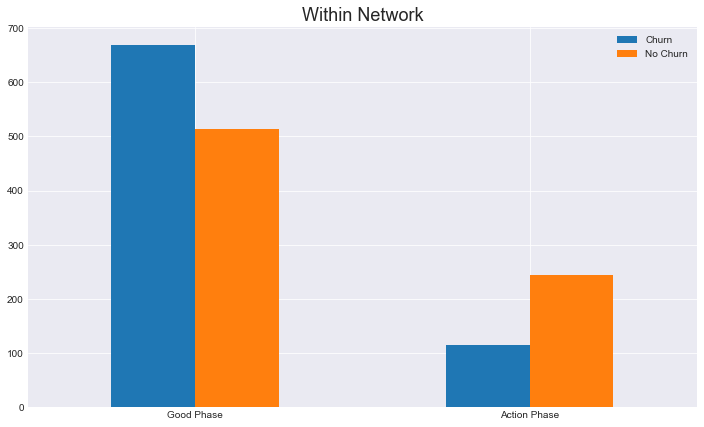

In [49]:
bar('onnet', df, "Within Network")

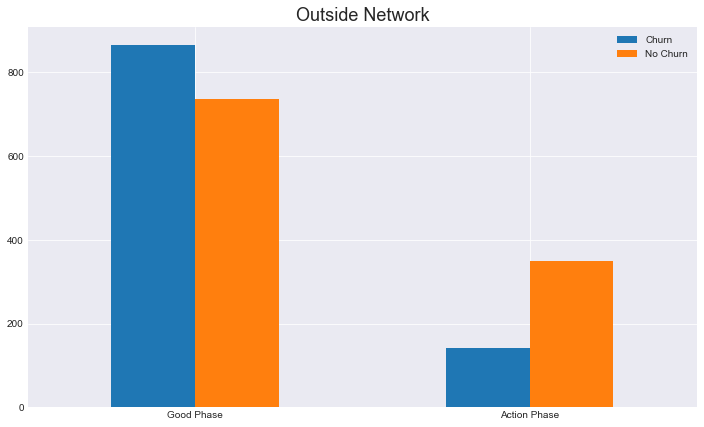

In [50]:
bar('offnet', df, "Outside Network")

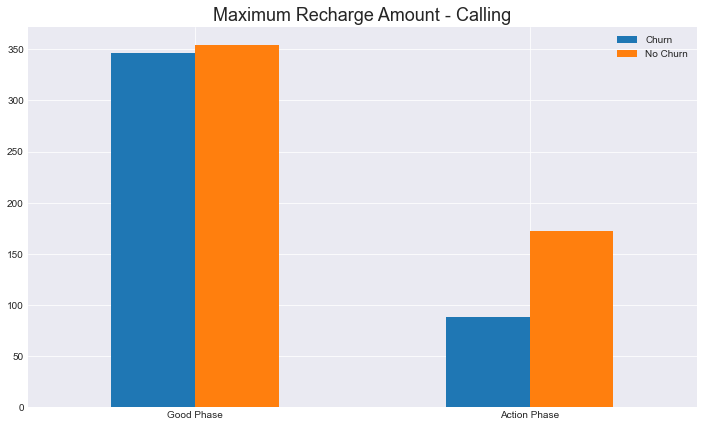

In [51]:
bar('max_rech_amt', df, "Maximum Recharge Amount - Calling")

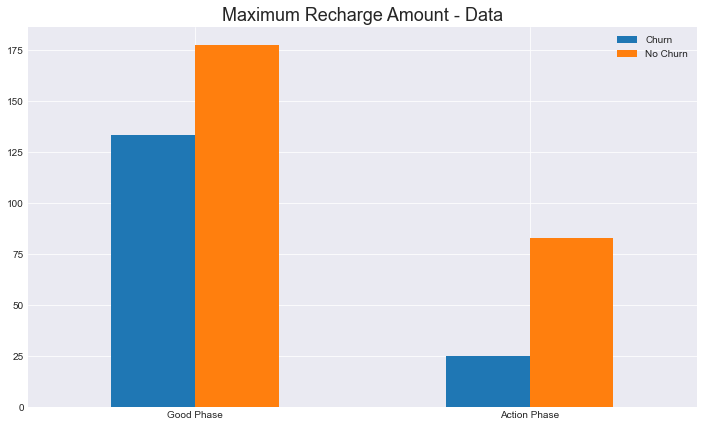

In [52]:
bar('max_rech_data', df, "Maximum Recharge Amount - Data")

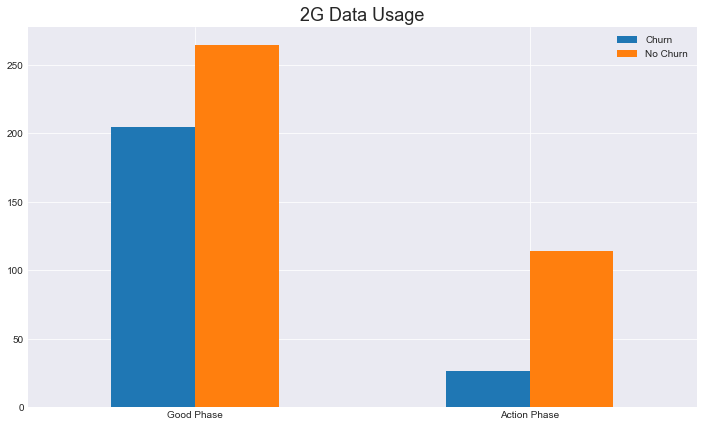

In [53]:
bar('vol_2g_mb', df, '2G Data Usage')

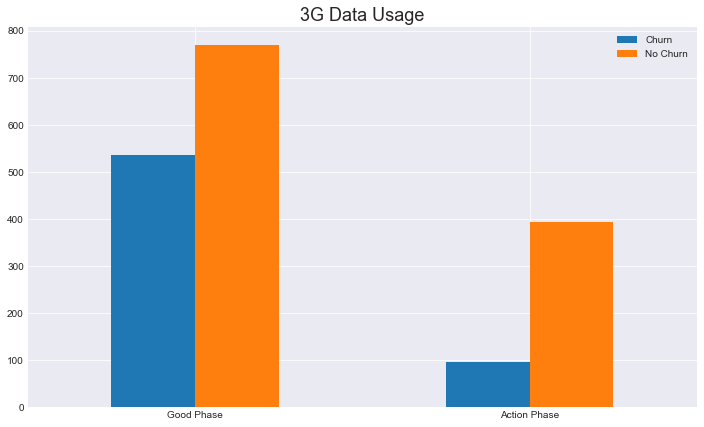

In [54]:
bar('vol_3g_mb', df, '3G Data Usage')

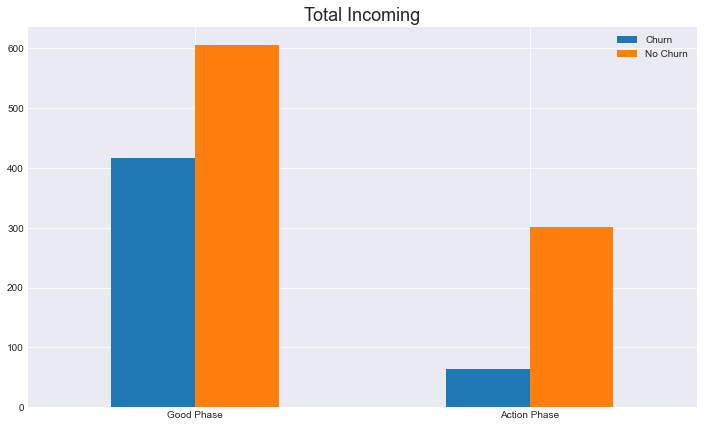

In [55]:
bar('total_ic_mou', df, 'Total Incoming')

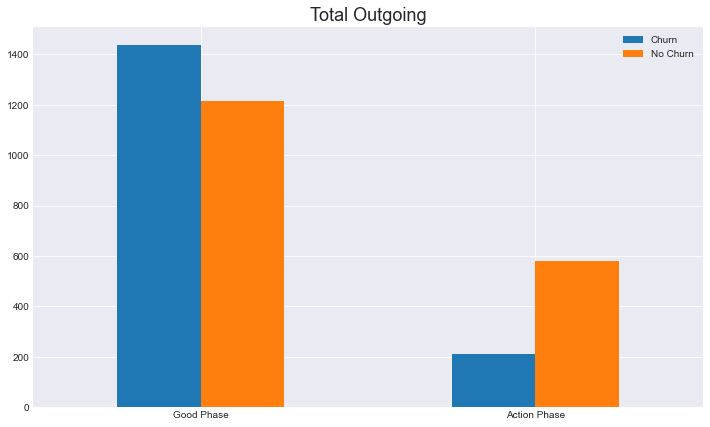

In [56]:
bar('total_og_mou', df, 'Total Outgoing')

1. Customers who make higher amounts of call and data recharges tend to churn less. 
2. Customers with higher data usage often tend to churn less.
3. Customers who actively recieve calls do not tend to churn. 

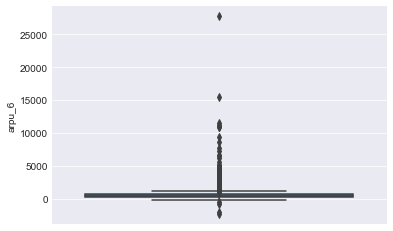

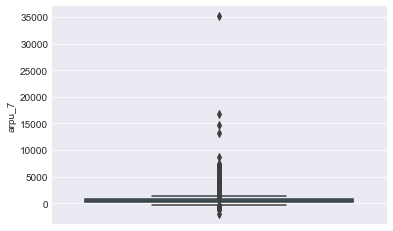

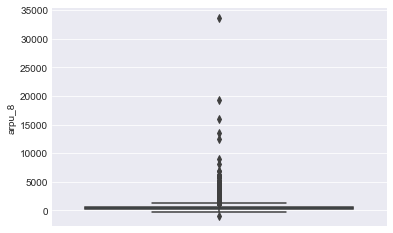

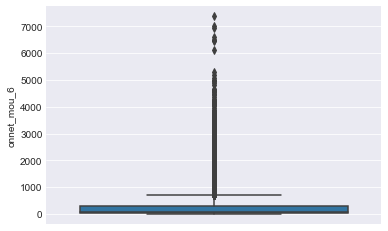

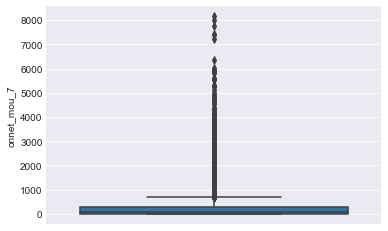

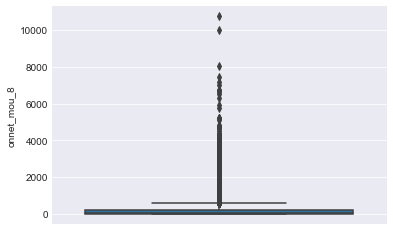

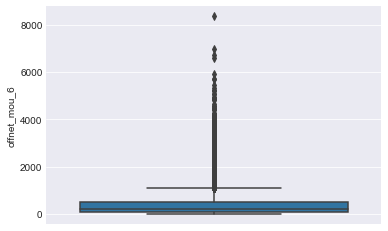

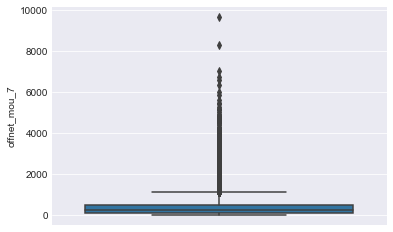

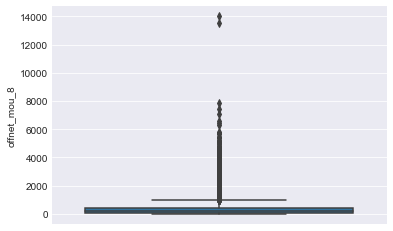

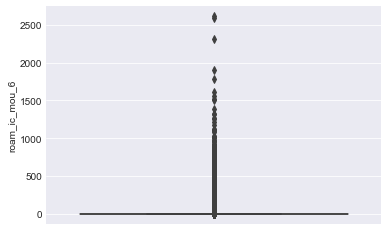

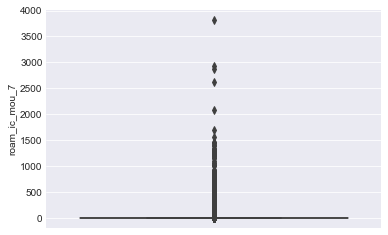

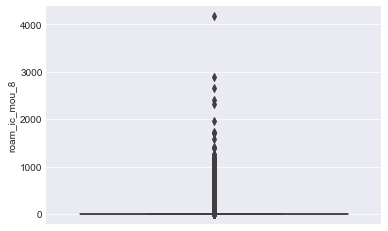

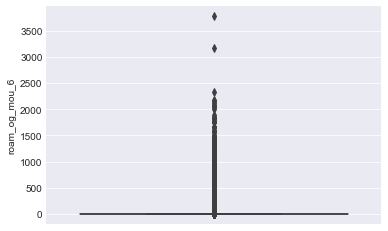

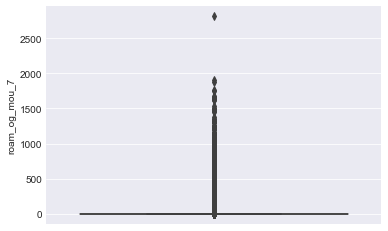

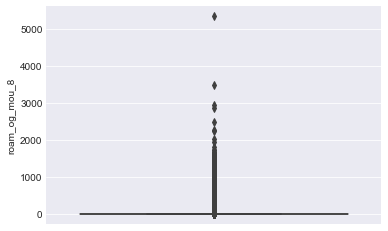

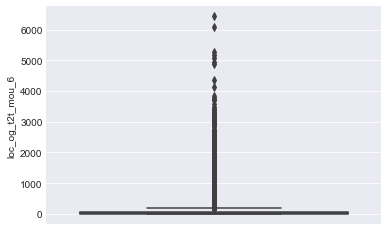

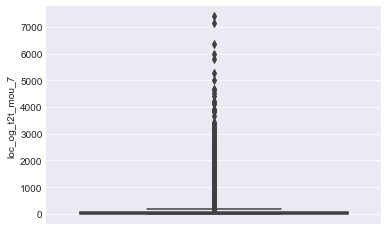

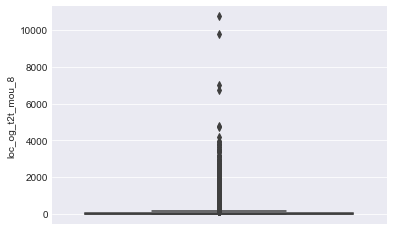

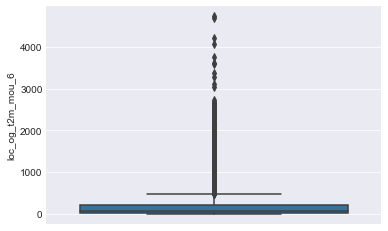

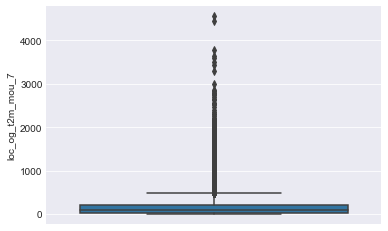

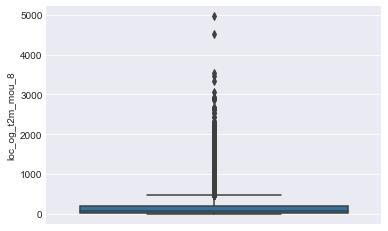

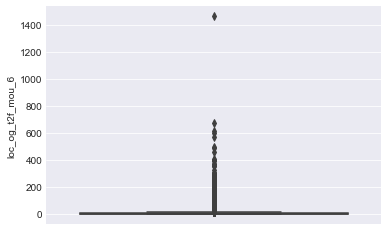

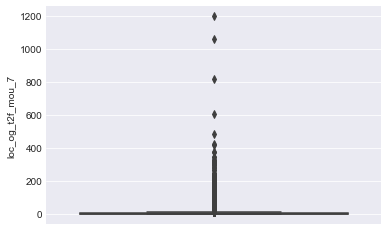

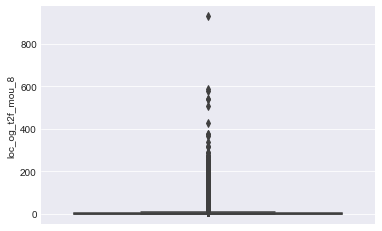

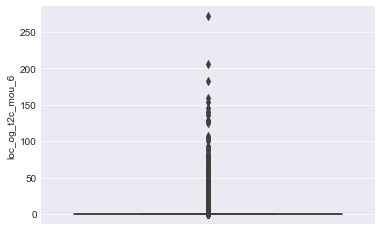

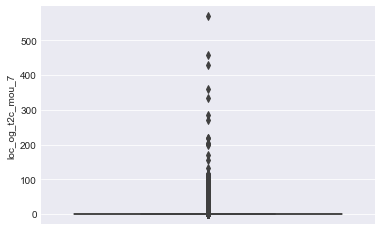

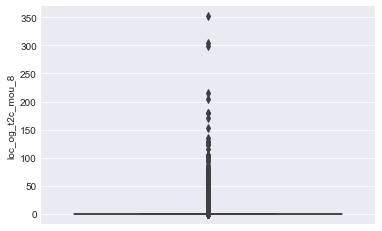

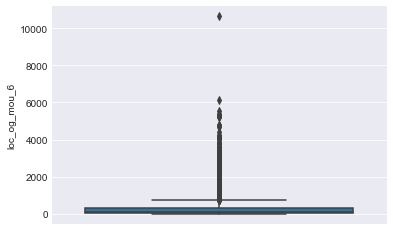

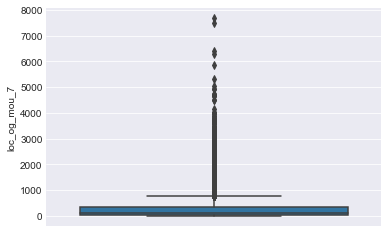

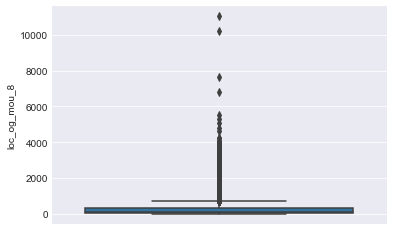

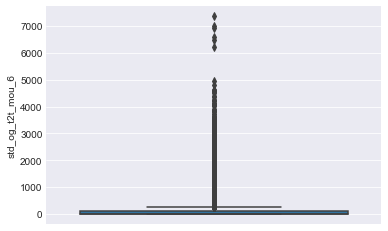

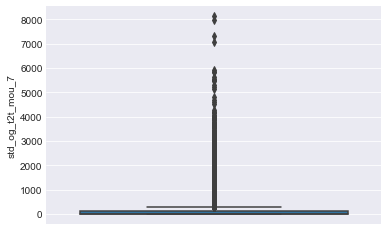

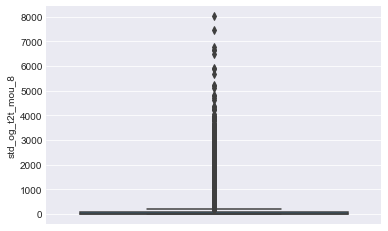

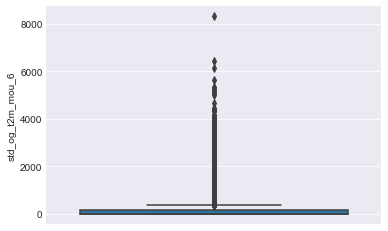

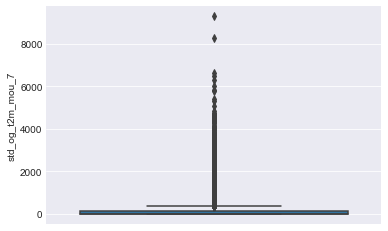

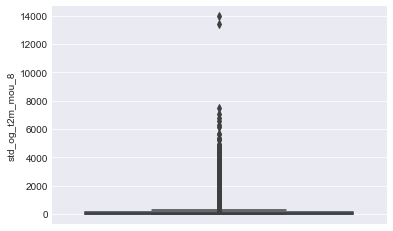

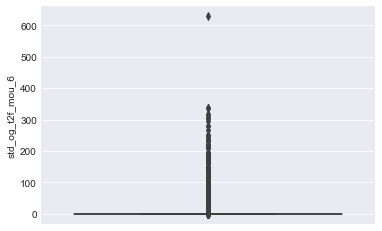

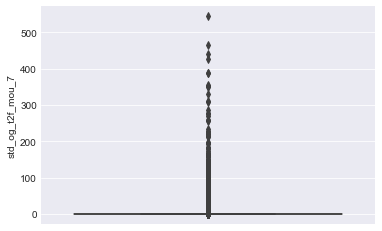

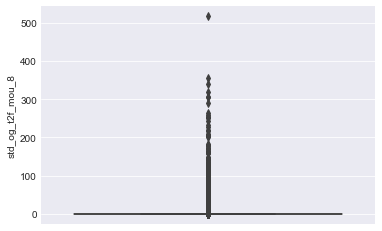

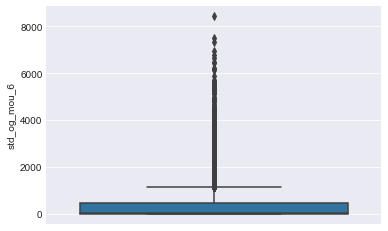

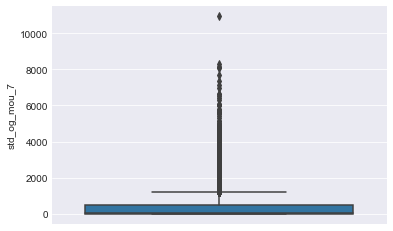

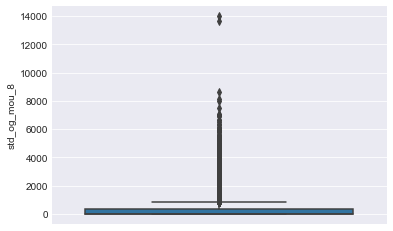

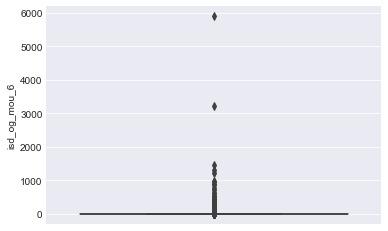

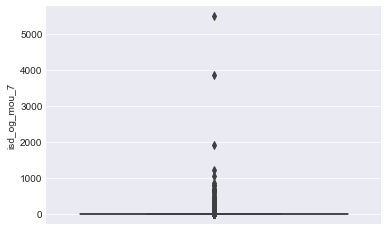

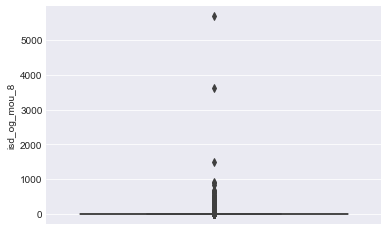

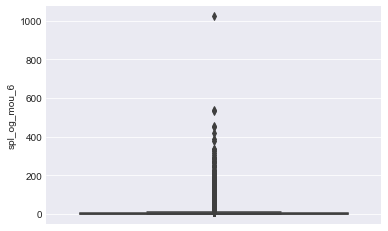

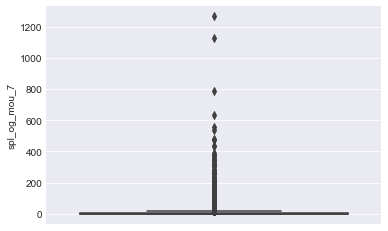

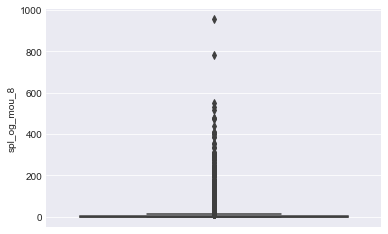

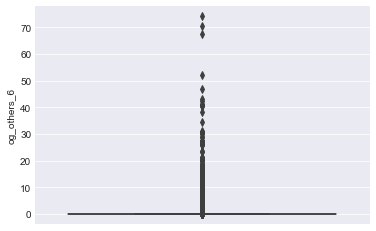

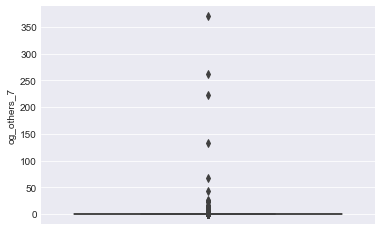

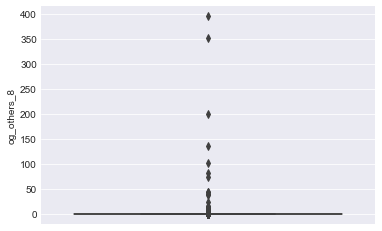

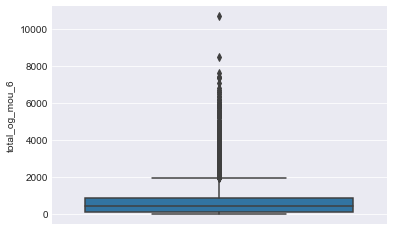

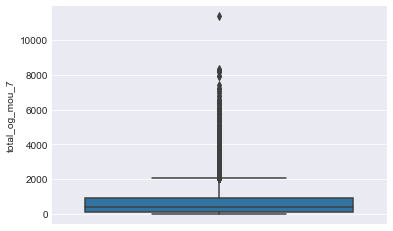

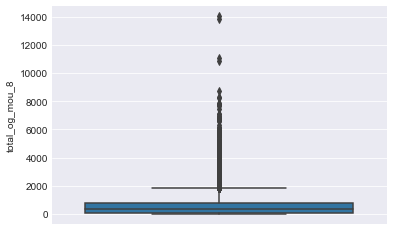

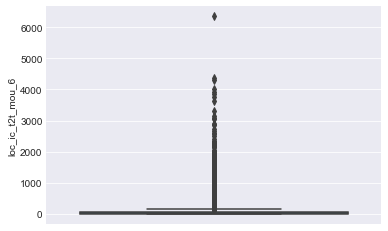

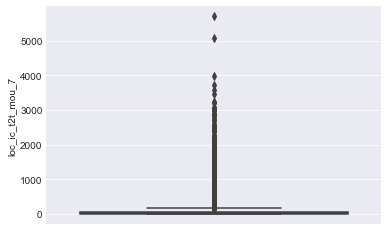

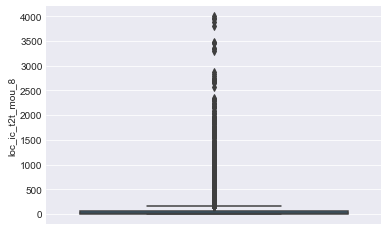

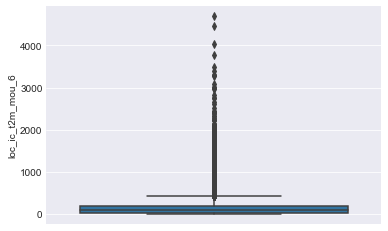

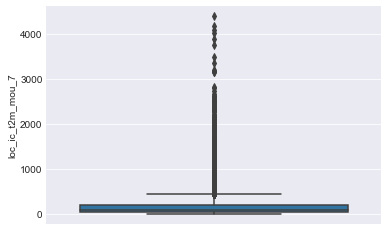

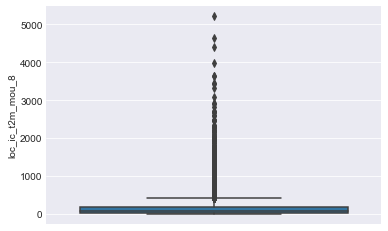

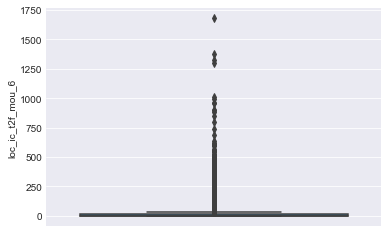

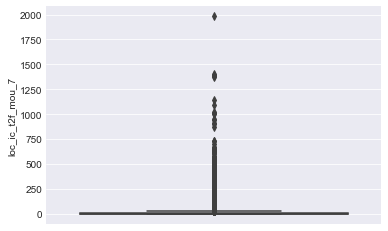

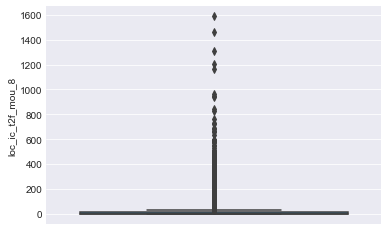

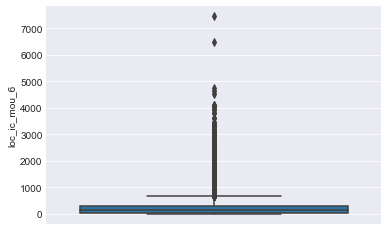

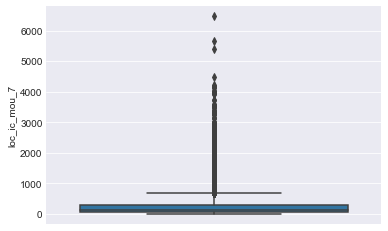

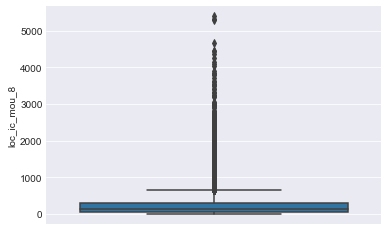

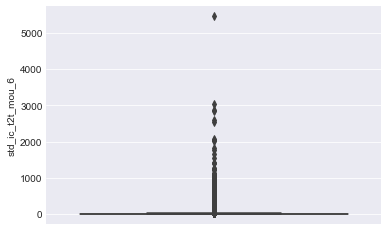

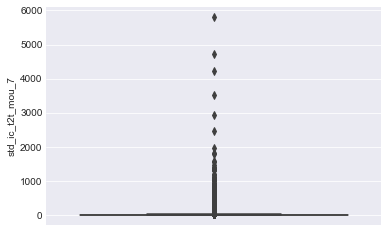

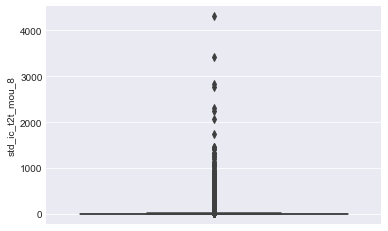

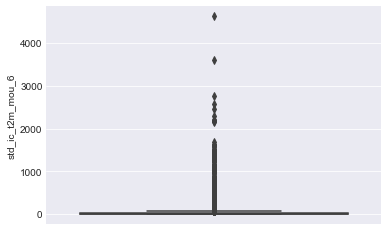

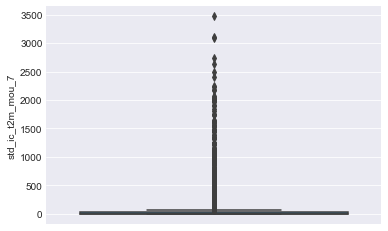

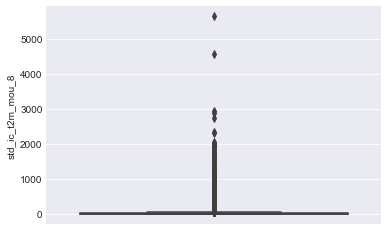

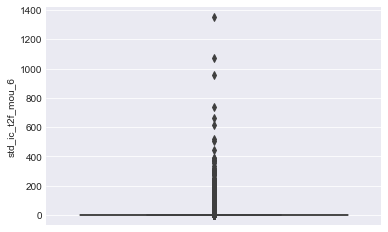

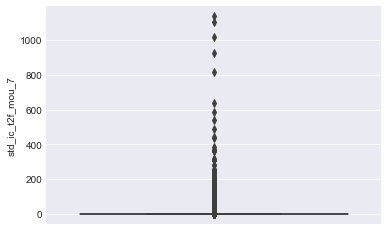

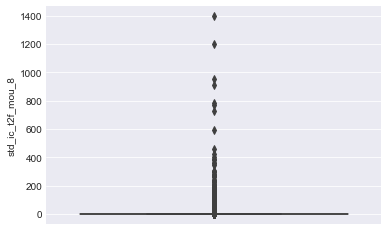

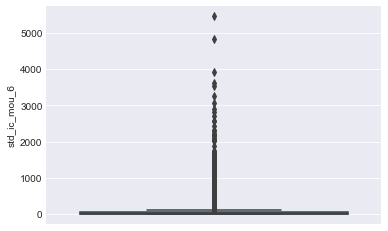

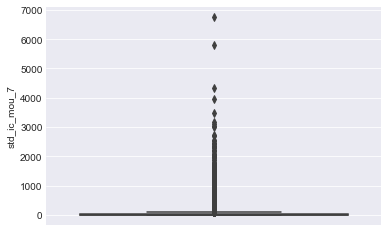

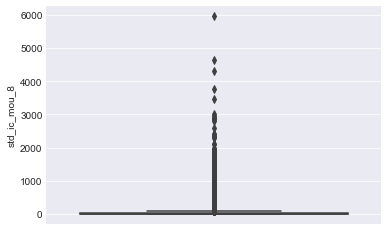

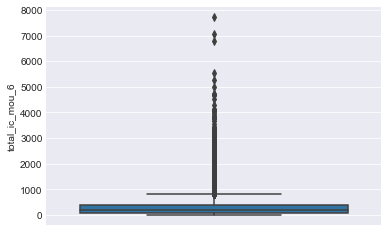

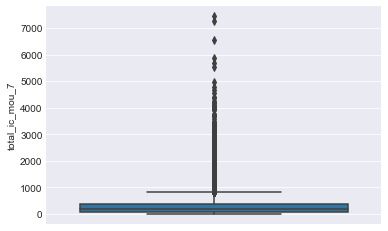

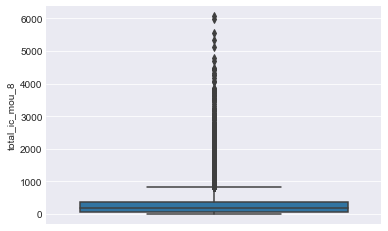

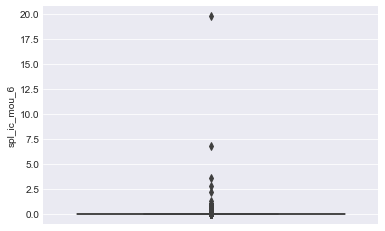

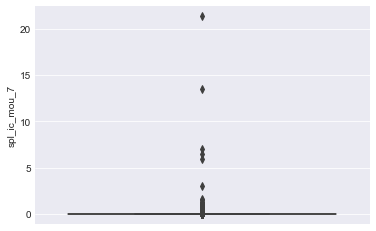

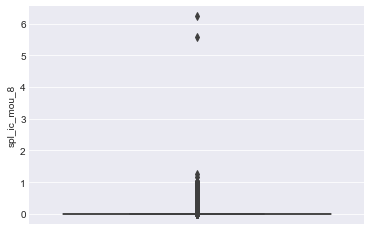

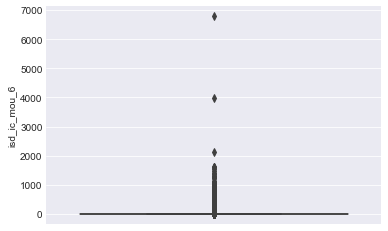

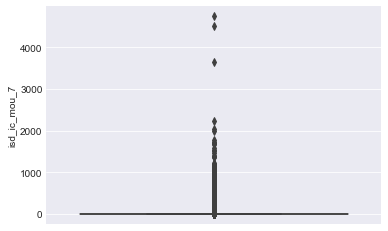

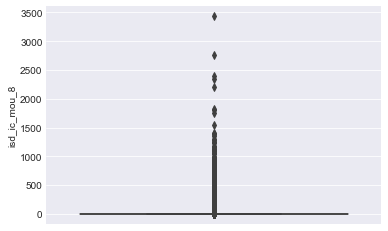

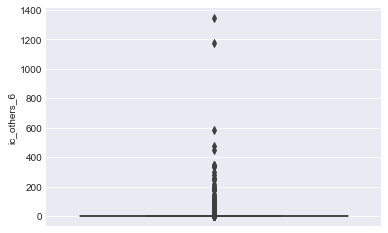

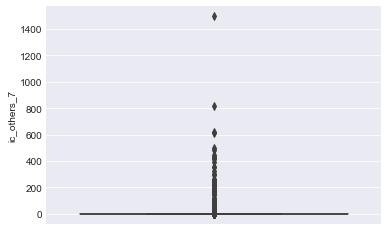

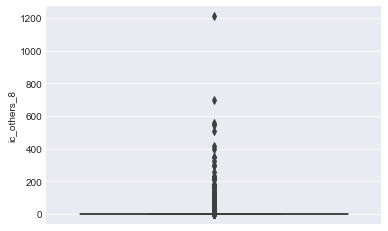

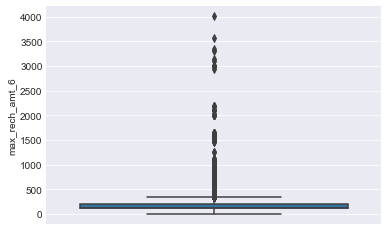

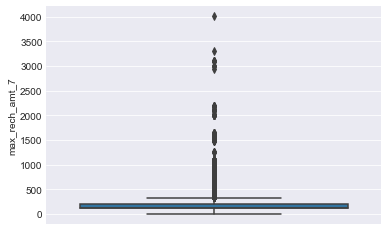

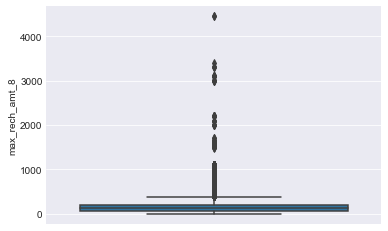

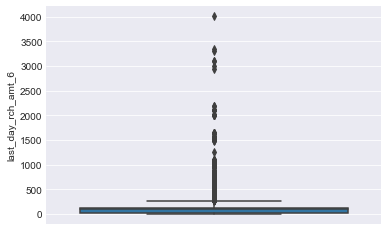

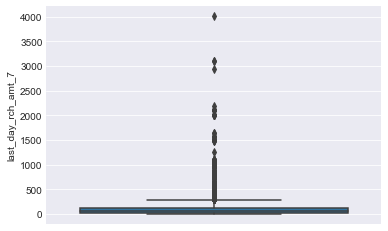

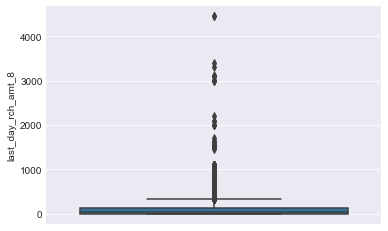

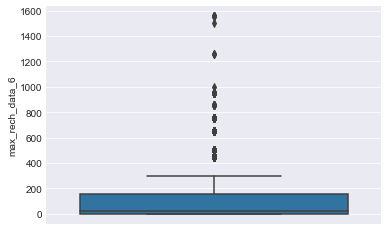

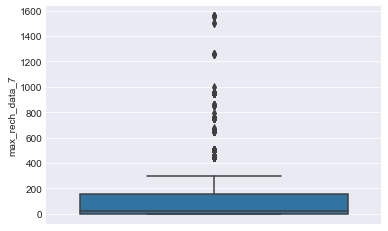

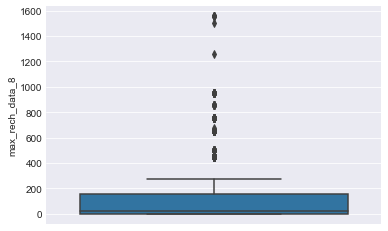

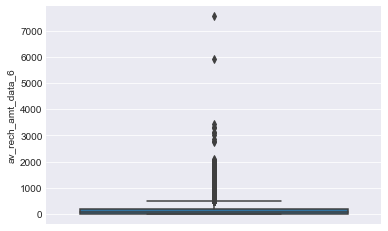

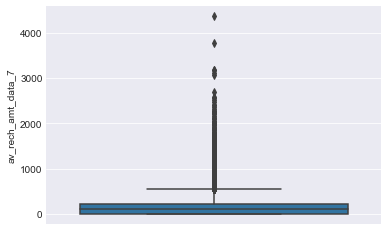

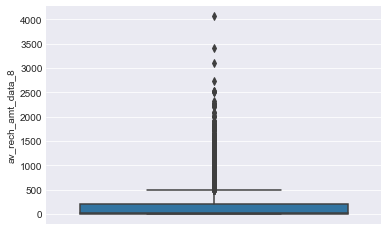

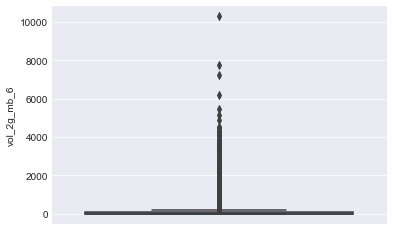

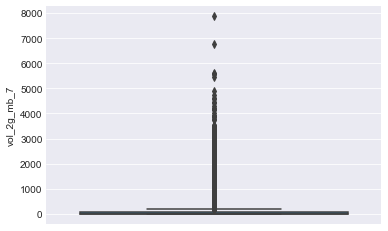

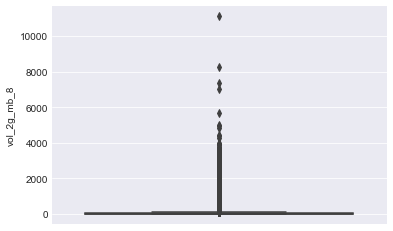

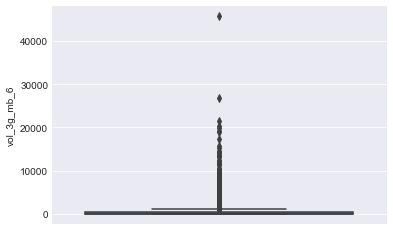

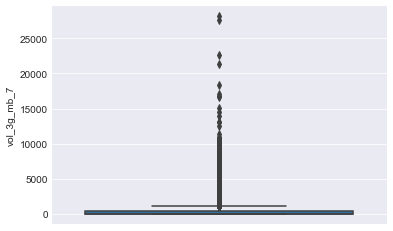

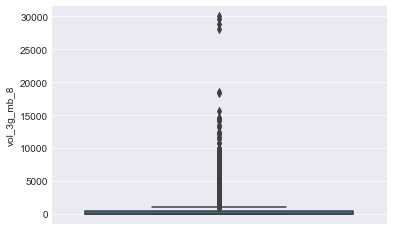

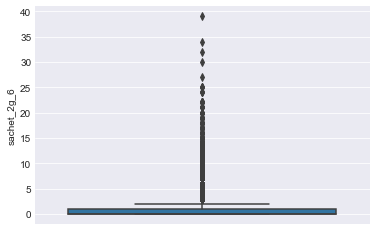

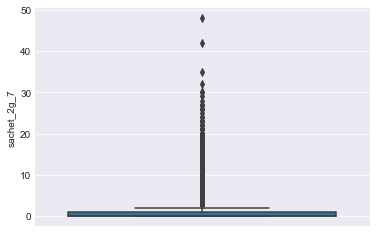

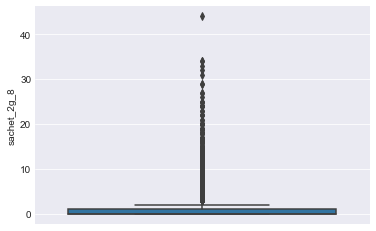

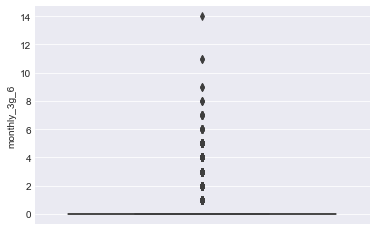

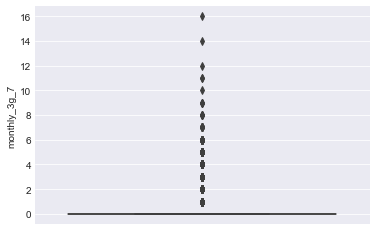

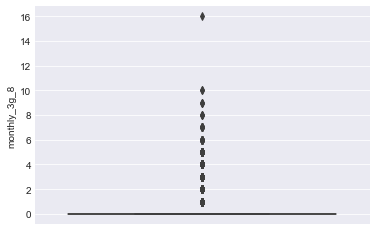

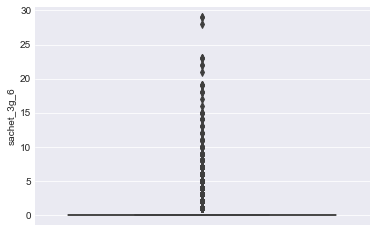

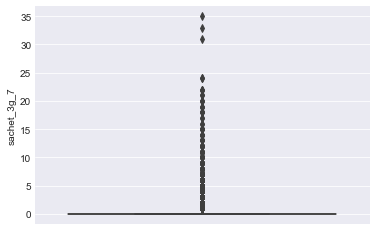

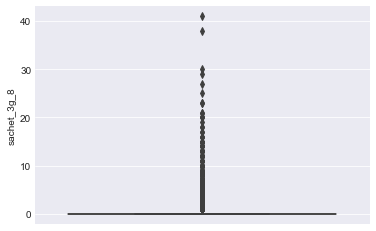

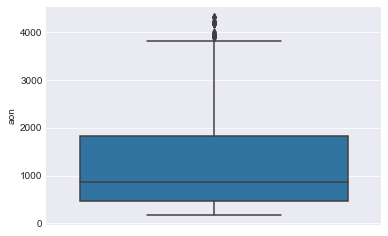

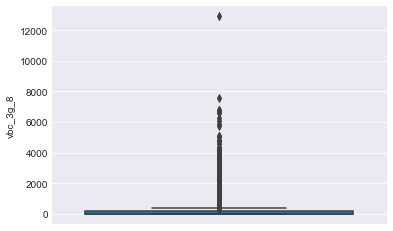

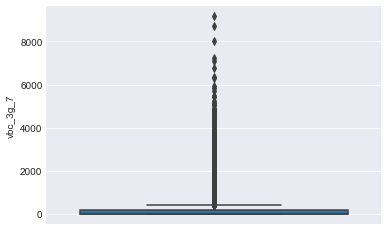

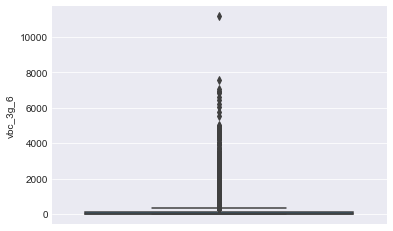

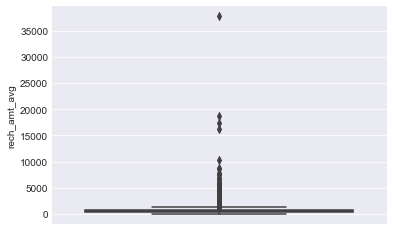

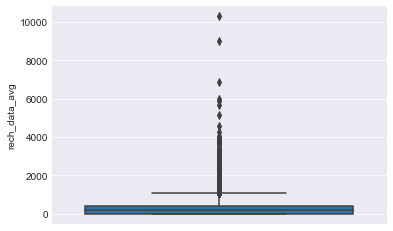

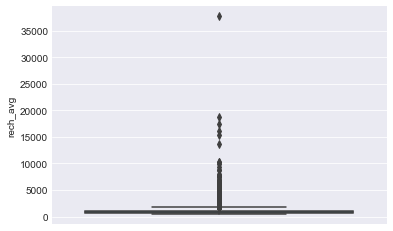

In [57]:
#plotting box plots to check for outliers
cols = [i for i in df.columns if i not in cat_cols]
for i,j in enumerate(cols):
    plt.figure(i)
    sns.boxplot(data = df, y = j, hue = 'churn')

plt.show()

>The data has a lot of outliers we perform a skew check 

In [58]:
#defining a function for checking skewness in data
def skew_check(df, cols):
    skew_check=df[cols].apply(lambda x:skew(x)).sort_values(ascending=False)
    skew_check_high =skew_check[skew_check>0.2]
    skewness = pd.DataFrame({'Skew' :skew_check_high})
    return skewness

In [59]:
#displaying the percentage of skewness
skew_check(df, cols)

Skew
og_others_7         94.461246
og_others_8         90.550513
isd_og_mou_8        89.517342
isd_og_mou_6        87.256802
isd_og_mou_7        83.894896
spl_ic_mou_7        73.021079
ic_others_6         58.887539
ic_others_8         44.783591
ic_others_7         43.504285
spl_ic_mou_6        41.840411
std_ic_t2f_mou_8    34.352355
isd_ic_mou_6        34.052443
std_ic_t2t_mou_7    31.272506
std_ic_t2f_mou_6    30.023356
std_ic_t2f_mou_7    28.856255
loc_og_t2c_mou_7    26.403294
std_ic_t2t_mou_6    26.146951
isd_ic_mou_7        24.065332
std_ic_t2t_mou_8    23.549417
spl_og_mou_7        19.625562
rech_amt_avg        18.428568
std_og_t2f_mou_7    18.375544
roam_ic_mou_8       18.366325
loc_og_t2f_mou_6    18.068947
std_og_t2f_mou_6    17.716651
arpu_7              17.656822
std_og_t2f_mou_8    17.474528
std_ic_t2m_mou_8    17.460882
isd_ic_mou_8        17.348060
roam_ic_mou_7       17.174703
loc_og_t2c_mou_8    16.923696
loc_og_t2f_mou_7    16.650915
spl_og_mou_6        15.708152
arpu_8              15.377269
spl_og_mou_8        14.792957
roam_og_mou_8       14.544489
std_ic_t2m_mou_6    14.425036
loc_og_t2t_mou_8    14.015381
std_ic_mou_7        13.471686
sachet_3g_8         13.355587
spl_ic_mou_8        13.333425
loc_og_t2c_mou_6    12.987231
std_ic_mou_8        12.923266
std_ic_t2m_mou_7    12.705091
loc_og_t2f_mou_8    12.627842
std_ic_mou_6        12.247788
arpu_6              12.096347
sachet_3g_6         12.021584
sachet_3g_7         11.872886
rech_avg            11.779097
loc_ic_t2t_mou_6    11.641099
roam_ic_mou_6       11.618413
loc_ic_t2t_mou_7    11.072503
loc_ic_t2f_mou_7    11.035569
loc_ic_t2f_mou_8    10.619209
vol_3g_mb_6         10.538290
loc_og_t2t_mou_7    10.535561
loc_ic_t2t_mou_8    10.487646
loc_ic_t2f_mou_6    10.352613
og_others_6         10.305407
roam_og_mou_6        9.492576
loc_og_t2t_mou_6     9.492574
roam_og_mou_7        9.396481
vol_3g_mb_8          8.593454
last_day_rch_amt_8   7.830656
vol_2g_mb_8          7.471345
vol_3g_mb_7          7.378277
std_og_t2m_mou_8     7.360943
last_day_rch_amt_6   6.593293
max_rech_amt_8       6.295776
vol_2g_mb_6          6.104652
last_day_rch_amt_7   5.779539
max_rech_amt_6       5.668787
av_rech_amt_data_6   5.661057
vol_2g_mb_7          5.649280
max_rech_amt_7       5.543110
vbc_3g_6             5.496390
std_og_t2t_mou_8     5.324415
loc_og_mou_8         5.319283
vbc_3g_8             5.247257
loc_ic_t2m_mou_8     5.240928
loc_ic_t2m_mou_7     5.232263
monthly_3g_7         5.082016
onnet_mou_8          5.066477
loc_ic_t2m_mou_6     5.028514
offnet_mou_8         5.010646
vbc_3g_7             4.922373
std_og_t2m_mou_7     4.915454
std_og_t2t_mou_7     4.722143
std_og_t2m_mou_6     4.719054
monthly_3g_8         4.677879
std_og_t2t_mou_6     4.674105
loc_og_mou_6         4.503673
monthly_3g_6         4.479866
sachet_2g_8          4.468233
loc_ic_mou_6         4.430832
loc_ic_mou_7         4.420585
loc_og_mou_7         4.399905
loc_og_t2m_mou_6     4.377594
rech_data_avg        4.343495
loc_ic_mou_8         4.263392
onnet_mou_7          4.244913
sachet_2g_6          4.226513
total_ic_mou_7       4.207840
std_og_mou_8         4.194331
loc_og_t2m_mou_8     4.123481
total_ic_mou_6       4.111608
sachet_2g_7          4.111455
loc_og_t2m_mou_7     4.104114
onnet_mou_6          4.046184
total_ic_mou_8       3.882711
av_rech_amt_data_7   3.864688
av_rech_amt_data_8   3.672067
offnet_mou_7         3.644687
offnet_mou_6         3.415259
total_og_mou_8       3.300101
std_og_mou_7         3.241993
std_og_mou_6         3.111933
total_og_mou_7       2.625575
max_rech_data_7      2.600108
max_rech_data_8      2.576847
max_rech_data_6      2.544636
total_og_mou_6       2.534027
aon                  0.944162

In [60]:
#performing log transformation to reduce outliers
df_logtrans = df.copy()
df_logtrans[cols] = np.log1p(df_logtrans[cols])

In [61]:
#checking percentage of skewness after log transformation
skew_check(df_logtrans, cols)

Skew
og_others_7       29.810348
og_others_8       27.337333
spl_ic_mou_7      10.313421
isd_og_mou_8       6.995925
isd_og_mou_6       6.239363
isd_og_mou_7       6.209581
spl_ic_mou_8       5.066134
sachet_3g_8        4.634413
sachet_3g_7        4.193214
sachet_3g_6        4.113124
ic_others_6        3.914510
ic_others_8        3.874414
ic_others_7        3.665692
std_og_t2f_mou_8   3.619436
std_og_t2f_mou_7   3.494466
std_og_t2f_mou_6   3.436190
spl_ic_mou_6       3.180787
std_ic_t2f_mou_8   2.674442
std_ic_t2f_mou_6   2.653489
std_ic_t2f_mou_7   2.592661
roam_ic_mou_7      2.553080
roam_ic_mou_8      2.487520
og_others_6        2.473306
monthly_3g_8       2.471152
isd_ic_mou_6       2.449968
isd_ic_mou_8       2.448006
monthly_3g_7       2.391083
loc_og_t2c_mou_6   2.372177
monthly_3g_6       2.337862
loc_og_t2c_mou_8   2.326451
roam_og_mou_8      2.325627
roam_og_mou_7      2.316246
isd_ic_mou_7       2.311125
loc_og_t2c_mou_7   2.273109
roam_ic_mou_6      2.145165
sachet_2g_6        2.040050
sachet_2g_8        2.003933
roam_og_mou_6      2.002993
sachet_2g_7        1.928979
loc_og_t2f_mou_8   1.260187
rech_avg           1.227474
loc_og_t2f_mou_6   1.221170
std_ic_t2t_mou_8   1.212177
loc_og_t2f_mou_7   1.201814
std_ic_t2t_mou_6   1.113364
spl_og_mou_6       1.095643
std_ic_t2t_mou_7   1.078450
spl_og_mou_8       0.984358
spl_og_mou_7       0.907235
vbc_3g_6           0.871036
vol_2g_mb_8        0.816233
vbc_3g_8           0.783016
loc_ic_t2f_mou_8   0.760127
vbc_3g_7           0.753848
loc_ic_t2f_mou_6   0.735425
std_og_t2t_mou_8   0.734297
loc_ic_t2f_mou_7   0.728593
vol_3g_mb_8        0.716208
vol_3g_mb_6        0.686924
vol_2g_mb_7        0.644737
vol_2g_mb_6        0.641027
vol_3g_mb_7        0.596986
std_og_t2t_mou_6   0.582280
std_og_t2t_mou_7   0.578076
std_ic_t2m_mou_8   0.555054
std_ic_t2m_mou_6   0.466524
std_ic_t2m_mou_7   0.449413
std_og_t2m_mou_8   0.373317
std_ic_mou_8       0.244931
std_og_t2m_mou_7   0.239644
std_og_t2m_mou_6   0.225736

In [62]:
for i in cols:
    df[i] = df[i].apply(lambda x: 0 if x < 0 else x)

In [63]:
#performing boxcox transformation to reduce outliers
df_boxcox = df.copy()

for col in cols:
    df_boxcox[col] = boxcox1p(df_boxcox[col], boxcox_normmax(df_boxcox[col] + 1))

In [64]:
#checking percentage of skewness after boxcox transformation
skew_check(df_boxcox, cols)

Skew
og_others_7         14.127772
og_others_8         13.288197
spl_ic_mou_7         3.707900
isd_og_mou_8         3.577752
sachet_3g_8          3.240437
isd_og_mou_7         3.235550
spl_ic_mou_8         3.210362
isd_og_mou_6         3.139426
sachet_3g_7          2.926489
sachet_3g_6          2.899971
std_og_t2f_mou_8     2.284661
std_og_t2f_mou_7     2.229201
monthly_3g_8         2.170845
std_og_t2f_mou_6     2.155681
roam_ic_mou_7        2.080718
monthly_3g_7         2.070373
roam_og_mou_7        2.068479
monthly_3g_6         2.061075
roam_og_mou_8        2.016636
roam_ic_mou_8        2.008478
isd_ic_mou_8         1.805901
roam_ic_mou_6        1.776899
roam_og_mou_6        1.773342
isd_ic_mou_6         1.770589
og_others_6          1.754711
spl_ic_mou_6         1.740243
isd_ic_mou_7         1.713141
loc_og_t2c_mou_6     1.671629
loc_og_t2c_mou_8     1.618397
loc_og_t2c_mou_7     1.602803
ic_others_7          1.532316
sachet_2g_6          1.516880
sachet_2g_8          1.513026
std_ic_t2f_mou_8     1.501888
sachet_2g_7          1.481814
std_ic_t2f_mou_6     1.476941
ic_others_8          1.462132
std_ic_t2f_mou_7     1.459651
ic_others_6          1.447988
vbc_3g_6             1.123350
vol_3g_mb_8          1.092374
vol_3g_mb_6          1.063710
vbc_3g_8             1.059397
vbc_3g_7             1.036131
vol_3g_mb_7          0.998067
vol_2g_mb_8          0.836816
loc_og_t2f_mou_8     0.798363
std_ic_t2t_mou_8     0.793072
spl_og_mou_6         0.775032
loc_og_t2f_mou_6     0.766304
loc_og_t2f_mou_7     0.746824
spl_og_mou_8         0.738498
std_ic_t2t_mou_6     0.738496
vol_2g_mb_6          0.726775
std_ic_t2t_mou_7     0.718828
vol_2g_mb_7          0.716975
std_og_t2t_mou_8     0.702372
spl_og_mou_7         0.697160
av_rech_amt_data_8   0.649838
std_og_t2t_mou_6     0.612153
std_og_t2t_mou_7     0.611703
av_rech_amt_data_6   0.596035
av_rech_amt_data_7   0.586579
max_rech_data_8      0.531069
loc_ic_t2f_mou_8     0.479268
max_rech_data_6      0.475702
loc_ic_t2f_mou_6     0.469485
std_og_t2m_mou_8     0.461553
max_rech_data_7      0.458219
std_ic_t2m_mou_8     0.449422
loc_ic_t2f_mou_7     0.449003
rech_data_avg        0.445847
std_ic_t2m_mou_7     0.388643
std_ic_t2m_mou_6     0.385011
std_og_t2m_mou_7     0.383776
std_og_t2m_mou_6     0.372406
std_og_mou_8         0.331325
std_ic_mou_8         0.299631
last_day_rch_amt_8   0.284922
max_rech_amt_6       0.268273
max_rech_amt_7       0.260761
std_og_mou_7         0.258132
std_og_mou_6         0.248746
std_ic_mou_7         0.247664
std_ic_mou_6         0.247059
arpu_7               0.238887
arpu_6               0.222462
last_day_rch_amt_7   0.210299
loc_og_t2t_mou_8     0.203709

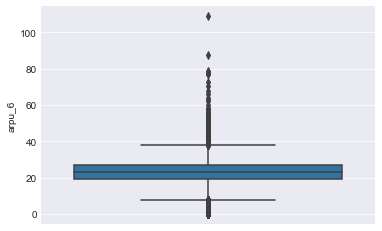

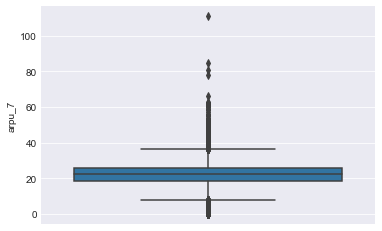

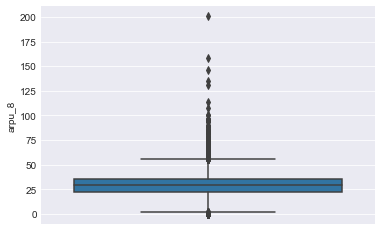

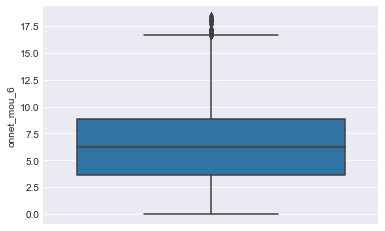

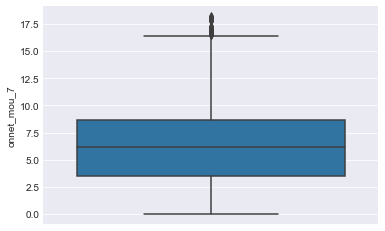

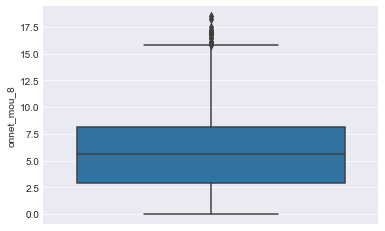

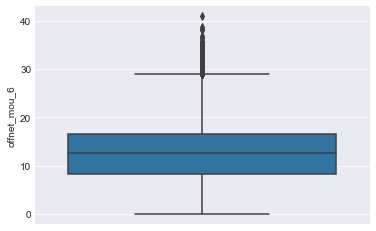

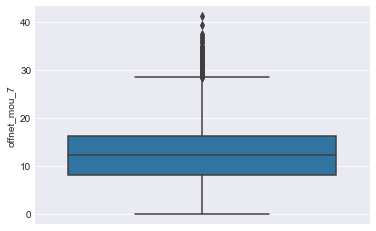

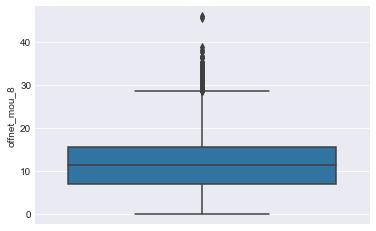

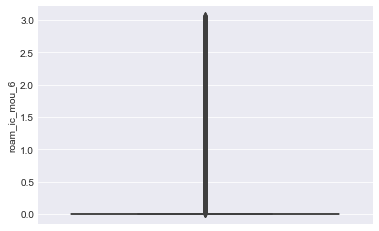

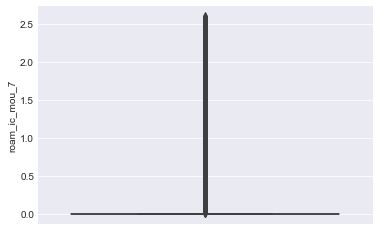

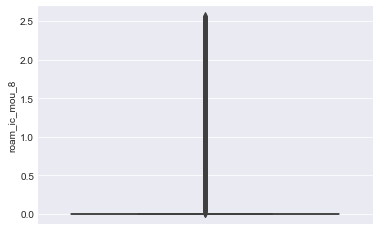

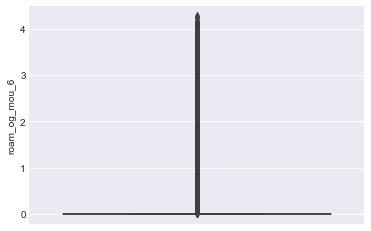

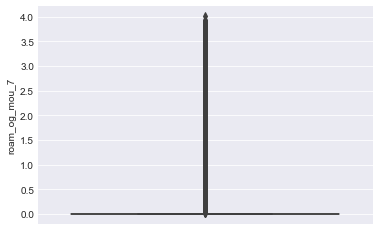

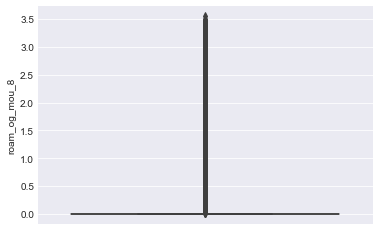

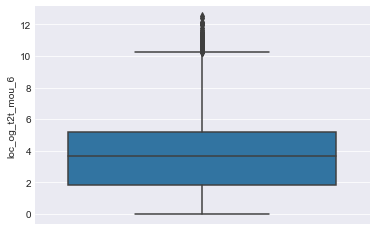

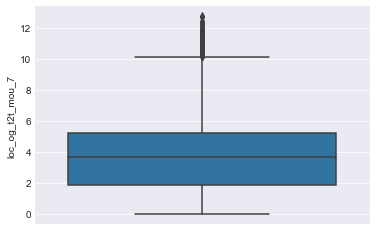

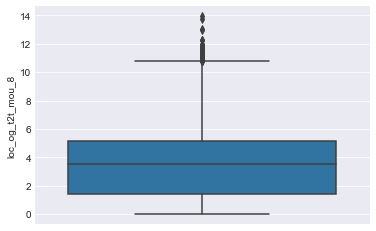

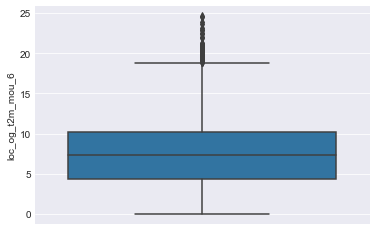

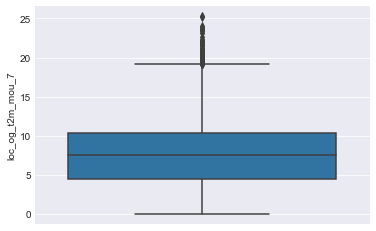

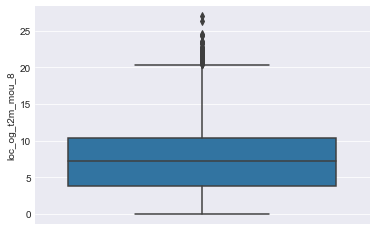

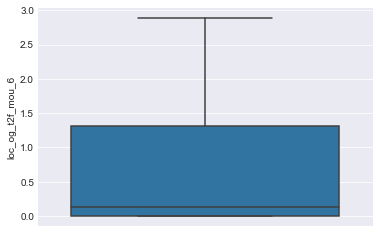

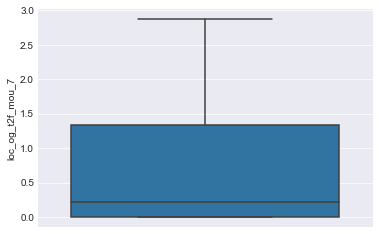

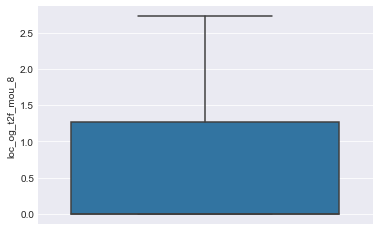

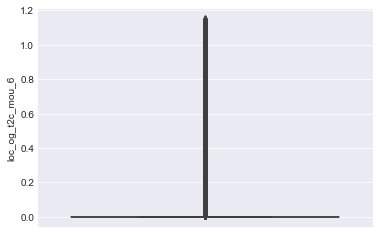

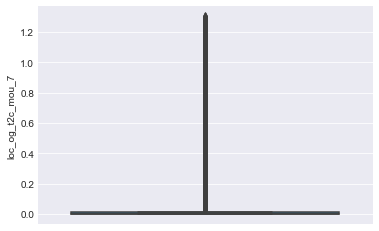

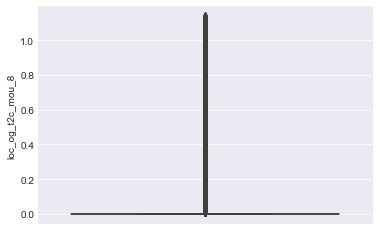

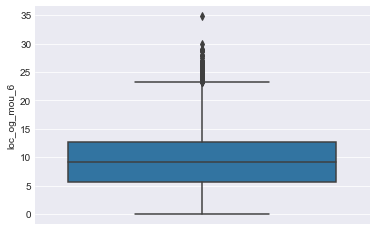

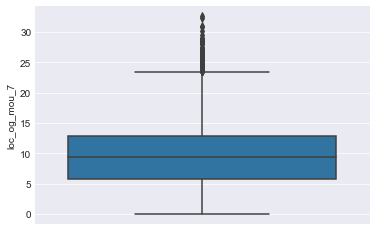

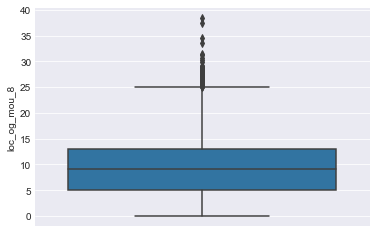

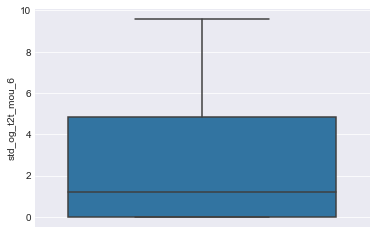

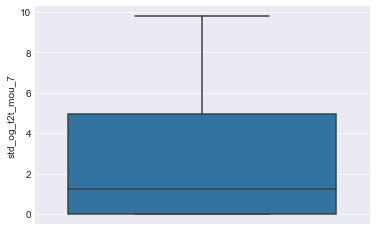

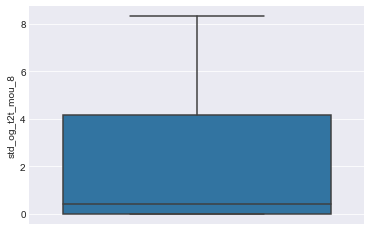

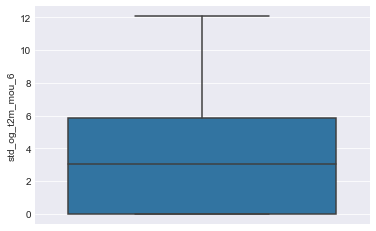

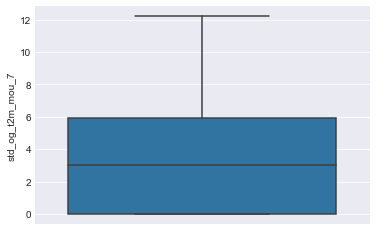

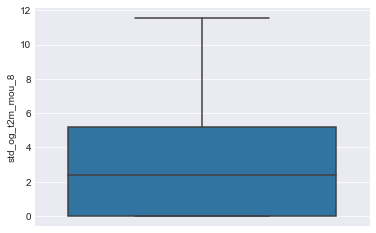

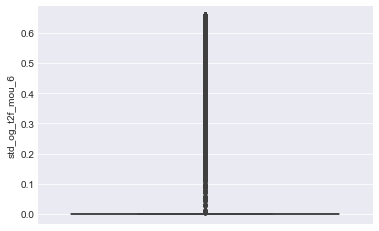

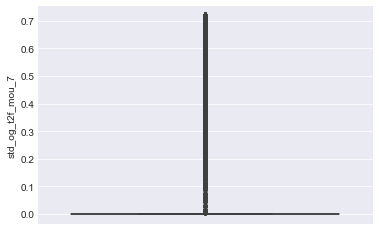

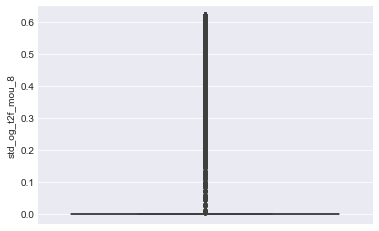

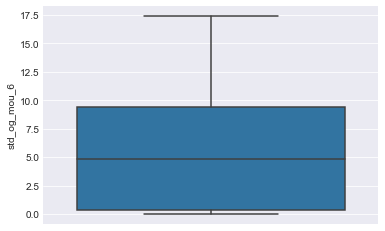

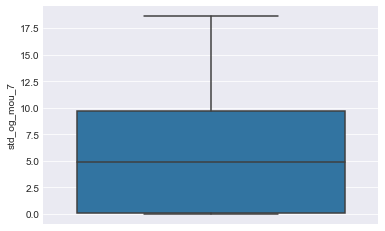

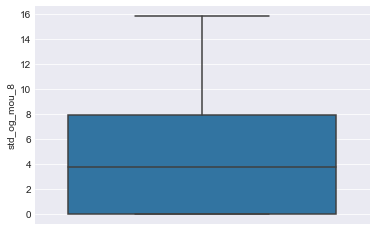

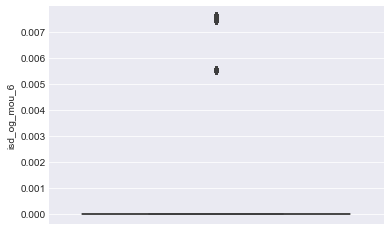

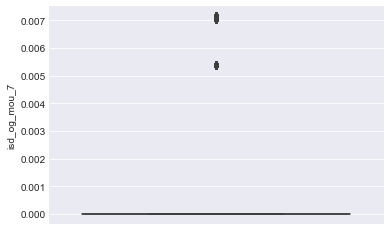

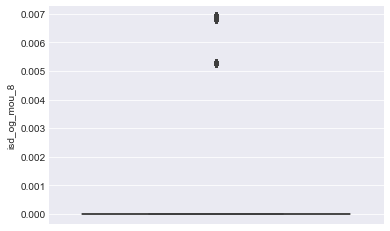

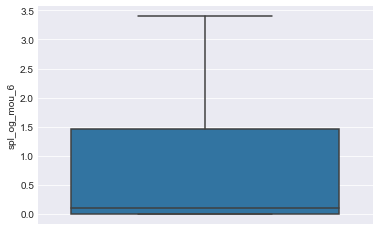

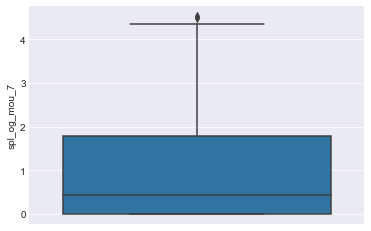

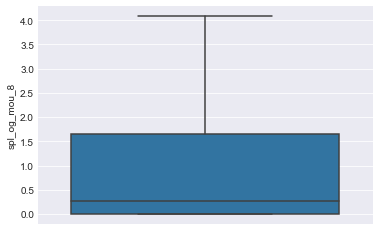

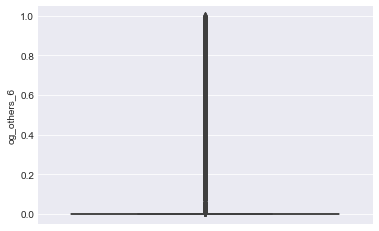

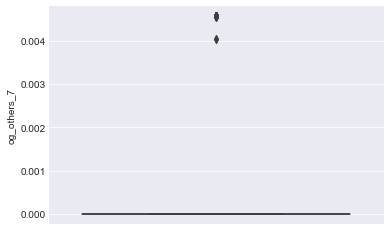

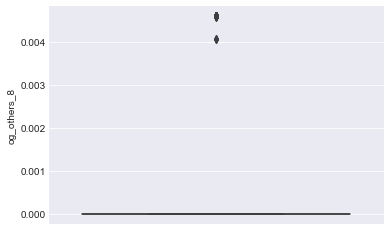

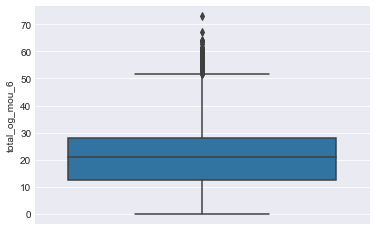

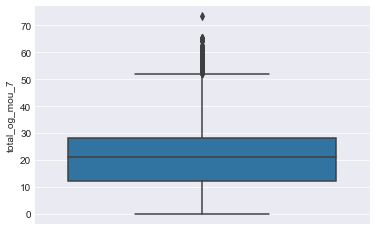

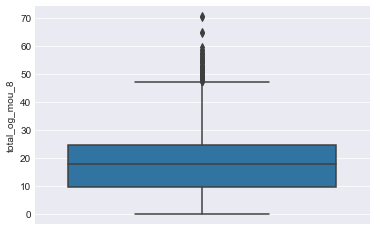

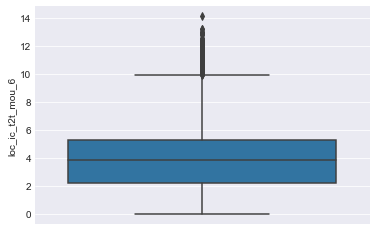

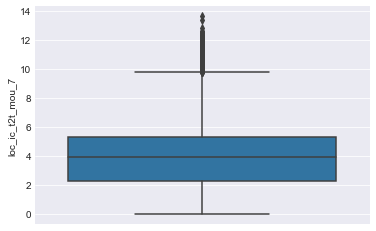

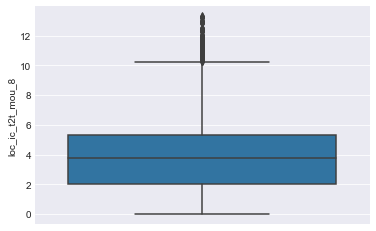

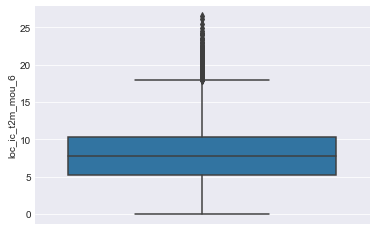

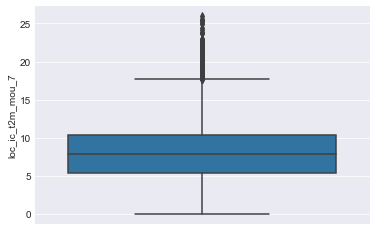

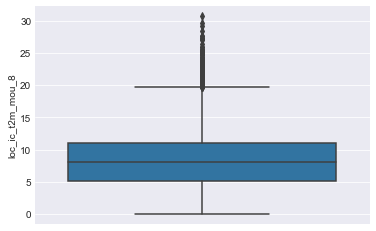

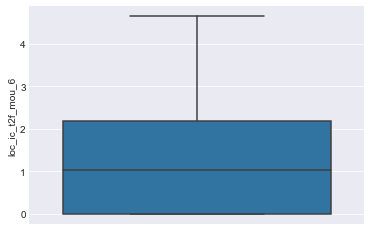

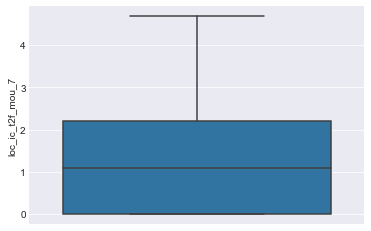

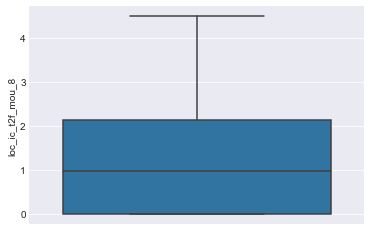

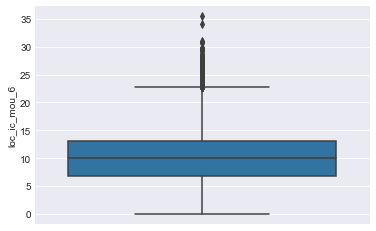

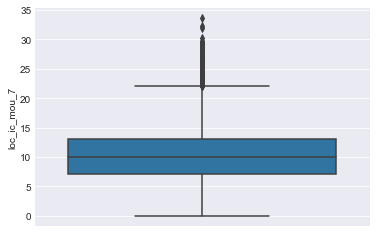

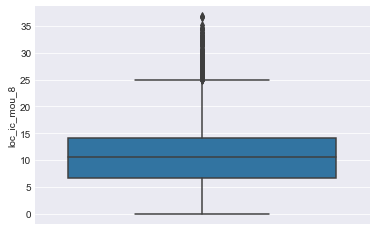

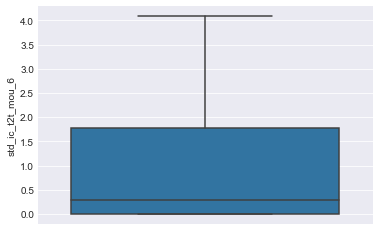

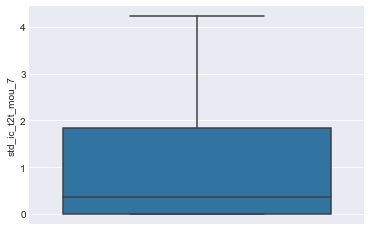

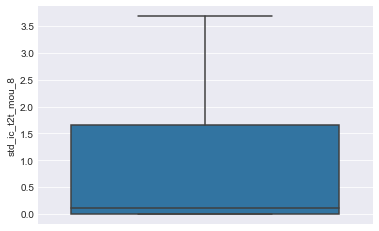

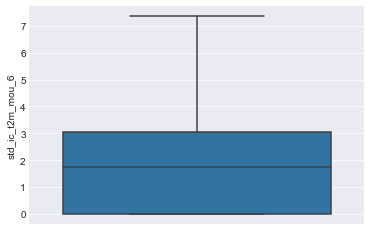

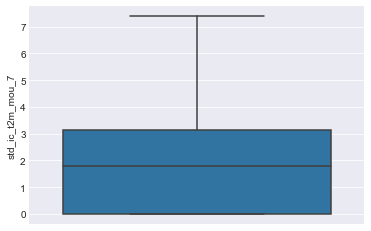

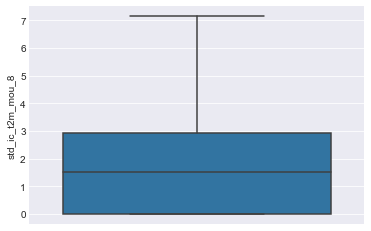

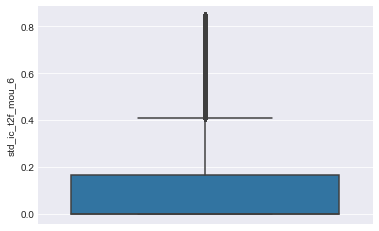

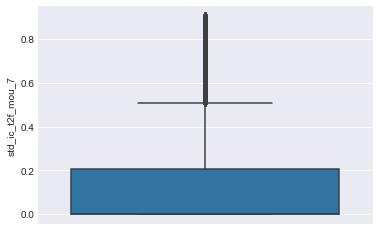

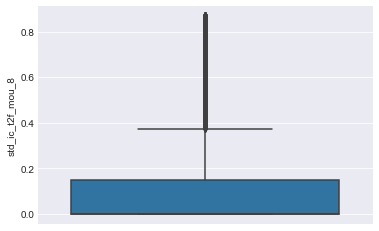

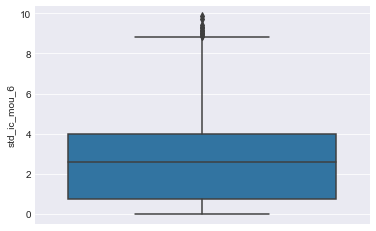

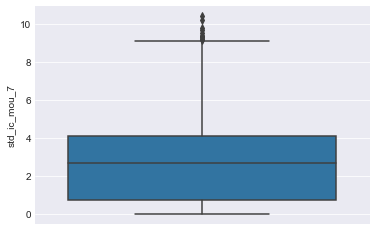

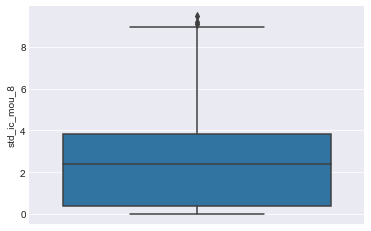

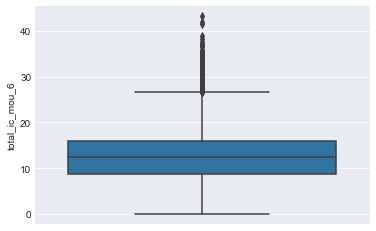

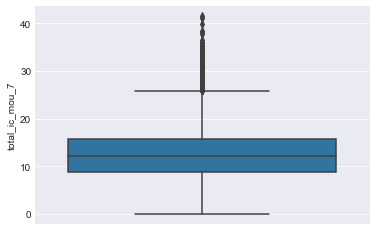

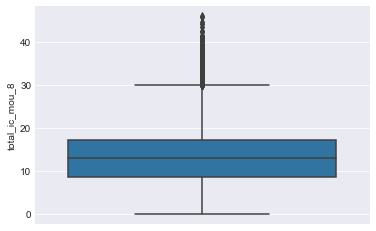

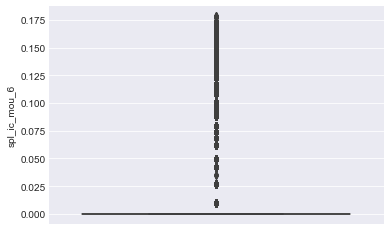

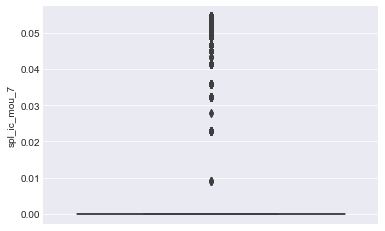

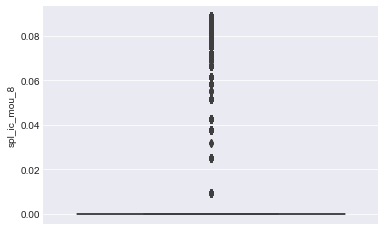

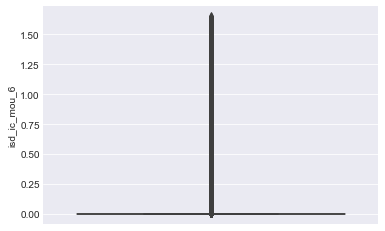

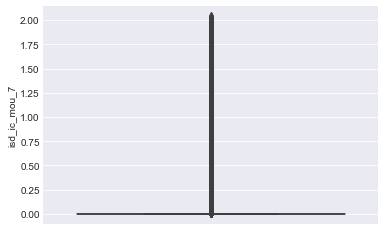

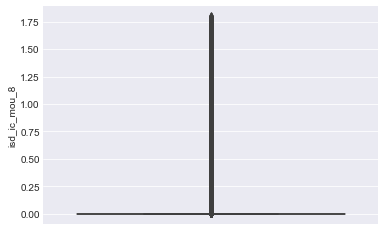

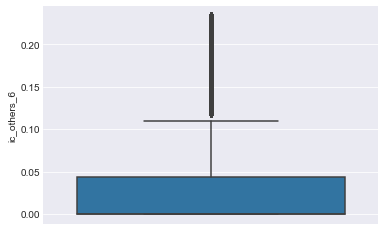

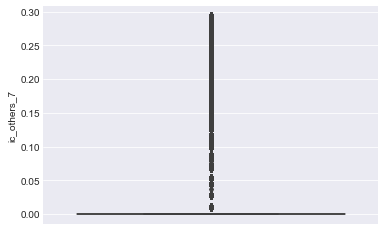

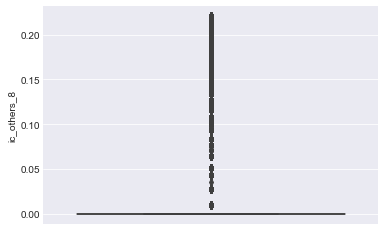

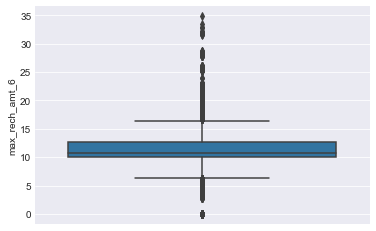

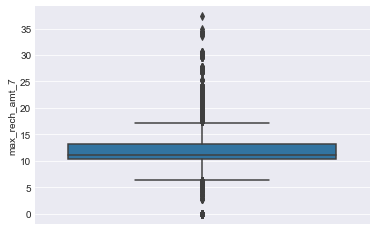

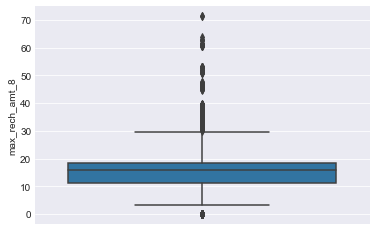

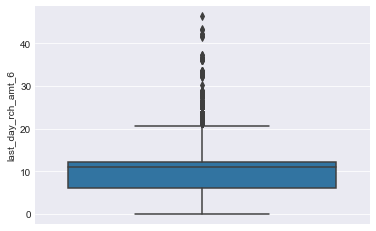

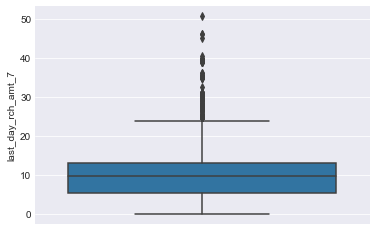

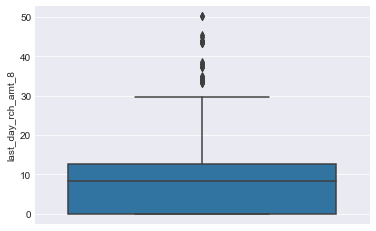

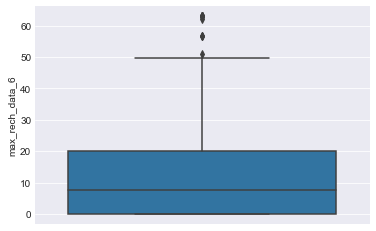

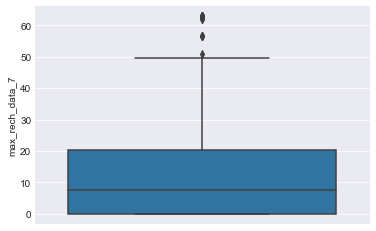

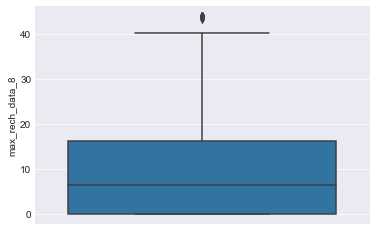

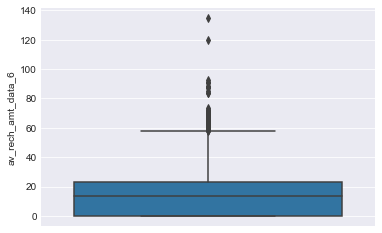

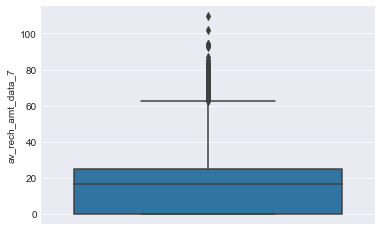

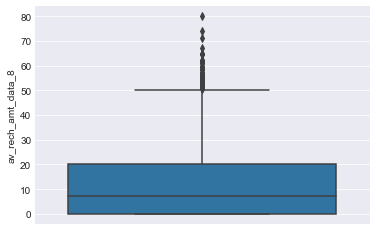

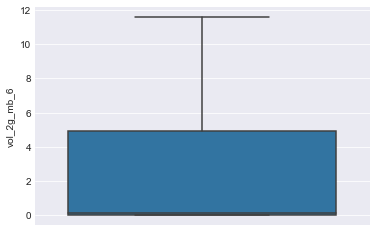

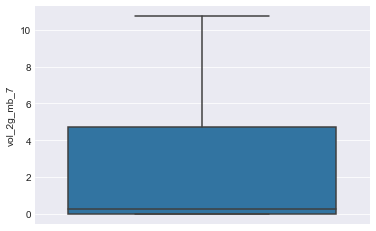

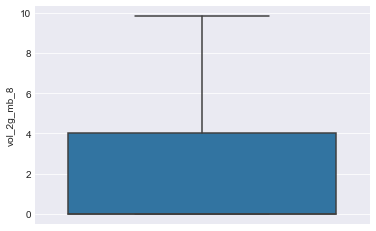

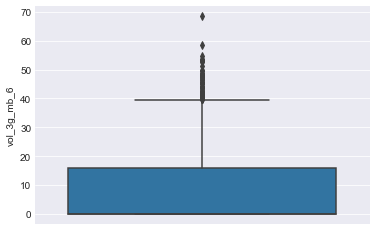

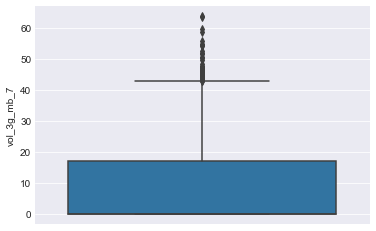

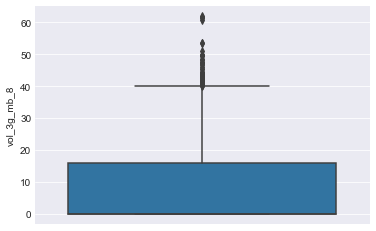

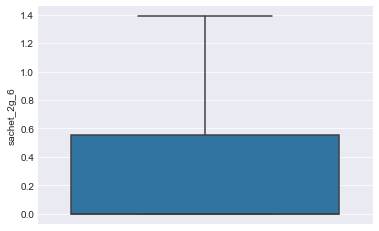

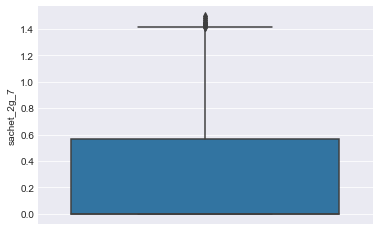

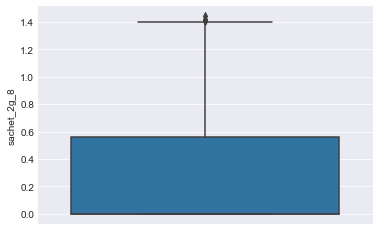

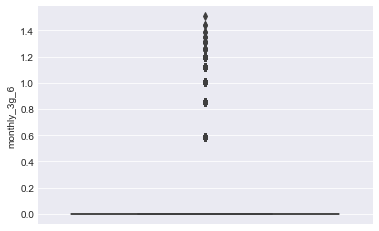

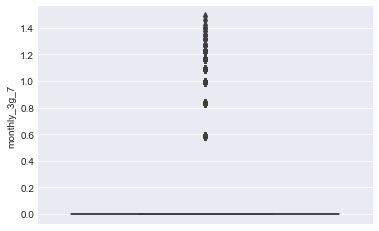

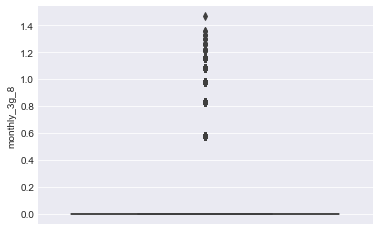

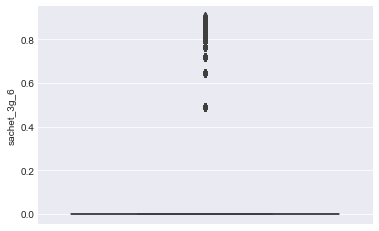

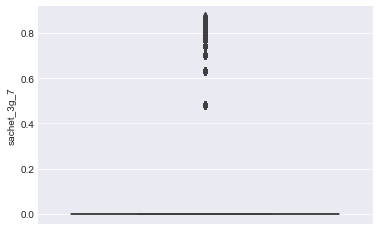

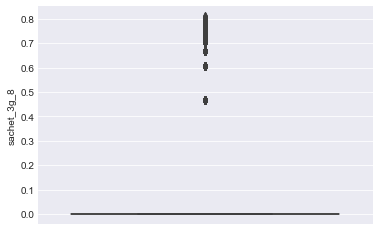

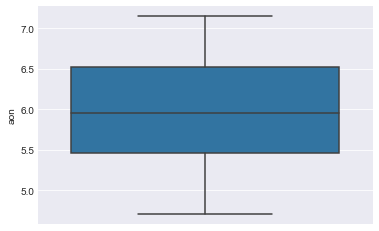

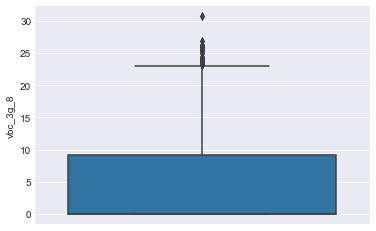

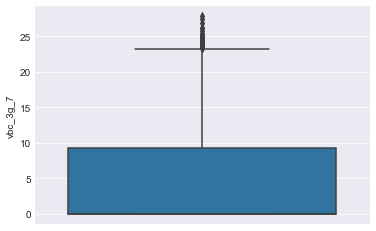

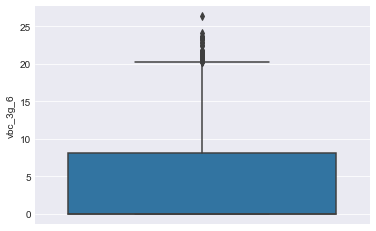

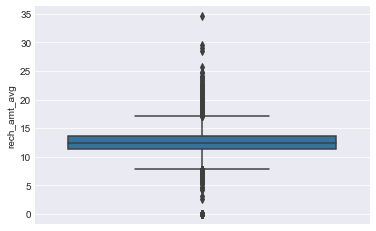

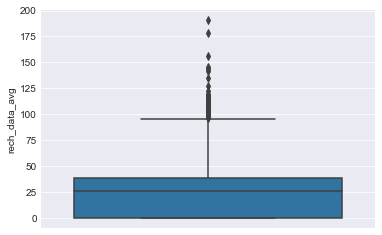

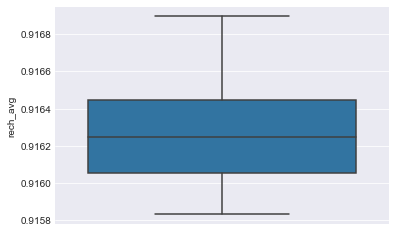

In [65]:
#plotting box plots on columns after boxcox transformation
cols = [i for i in df_boxcox.columns if i not in cat_cols]
for i,j in enumerate(cols):
    plt.figure(i)
    sns.boxplot(data = df_boxcox, y = j, hue = 'churn')
plt.show()

In [66]:
#outliers have reduced hence we retain boxcox transformation on the data 
df = df_boxcox

 ## 5. Class Imbalance Handle
 There's high imbalance in class 0 and 1 this will affect the model's accuracy. Hence we perform necessary steps to oversample the data.

In [67]:
#seperating the independent(predictors) and dependent variables(target)
y = df.pop('churn')
X = df

In [68]:
#performing SMOTE to handle class imbalance in dependent variable
print(f"Before OverSampling, counts of label '1': {y.value_counts()[0]}") 
print(f"Before OverSampling, counts of label '0': {y.value_counts()[1]} \n") 

smote = SMOTE(random_state = 12)
X, y = smote.fit_resample(X, y)

print(f"After OverSampling, counts of label '1': {y.value_counts()[0]}") 
print(f"After OverSampling, counts of label '0': {y.value_counts()[1]} \n") 

Before OverSampling, counts of label '1': 27574
Before OverSampling, counts of label '0': 2395 

After OverSampling, counts of label '1': 27574
After OverSampling, counts of label '0': 27574 



In [69]:
#plotting a series of pair plots after sampling
df['churn'] = y

In [70]:
#defining a function to plot 
def pairplot(
    call_type: str,
    stdloc: str = '',
    df: pd.DataFrame = df,
    optional: str = ''
):
    if stdloc == '':
        v_6 = df.columns[(df.columns.str.contains(call_type)) & (df.columns.str.contains('_6')) & ((df.columns.str.contains('t2')) | (df.columns.str.contains(optional)))]
        v_6 = v_6[~(v_6.str.contains('roam')) & ~(v_6.str.contains('total')) & ~(v_6.str.contains('loc_' + call_type + '_mou_')) & ~(v_6.str.contains('std_' + call_type + '_mou_'))]
    else:
        v_6 = df.columns[((df.columns.str.contains(call_type)) & (df.columns.str.contains('_6')) & (df.columns.str.contains('t2'))) & (df.columns.str.contains(stdloc))]
        v_6 = v_6[~(v_6.str.contains('roam')) & ~(v_6.str.contains('total'))]
    v_6 = df[v_6].sum(axis = 1)
    if stdloc == '':
        v_7 = df.columns[(df.columns.str.contains(call_type)) & (df.columns.str.contains('_7')) & ((df.columns.str.contains('t2')) | (df.columns.str.contains(optional)))]
        v_7 = v_7[~(v_7.str.contains('roam')) & ~(v_7.str.contains('total')) & ~(v_7.str.contains('loc_' + call_type + '_mou_')) & ~(v_7.str.contains('std_' + call_type + '_mou_'))]
    else:
        v_7 = df.columns[((df.columns.str.contains(call_type)) & (df.columns.str.contains('_7')) & (df.columns.str.contains('t2'))) & (df.columns.str.contains(stdloc))]
        v_7 = v_7[~(v_7.str.contains('roam')) & ~(v_7.str.contains('total'))]
    v_7 = df[v_7].sum(axis = 1)
    if stdloc == '':
        v_8 = df.columns[(df.columns.str.contains(call_type)) & (df.columns.str.contains('_8')) & ((df.columns.str.contains('t2')) | (df.columns.str.contains(optional)))]
        v_8 = v_8[~(v_8.str.contains('roam')) & ~(v_8.str.contains('total')) & ~(v_8.str.contains('loc_' + call_type + '_mou_')) & ~(v_8.str.contains('std_' + call_type + '_mou_'))]
    else:
        v_8 = df.columns[((df.columns.str.contains(call_type)) & (df.columns.str.contains('_8')) & (df.columns.str.contains('t2'))) & (df.columns.str.contains(stdloc))]
        v_8 = v_8[~(v_8.str.contains('roam')) & ~(v_8.str.contains('total'))]
    v_8 = df[v_8].sum(axis = 1)

    temp = pd.concat([v_6, v_7, v_8, df['churn']], axis = 1)
    
    sns.pairplot(data = temp, hue = 'churn', palette = 'tab10')
    
    plt.show()

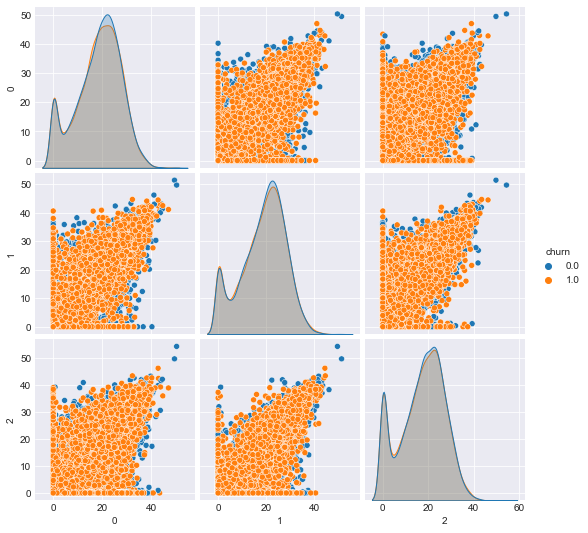

In [71]:
pairplot('og')

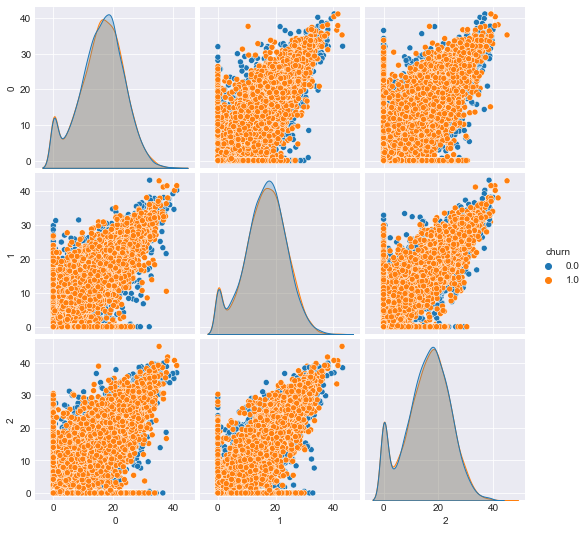

In [72]:
pairplot('ic')

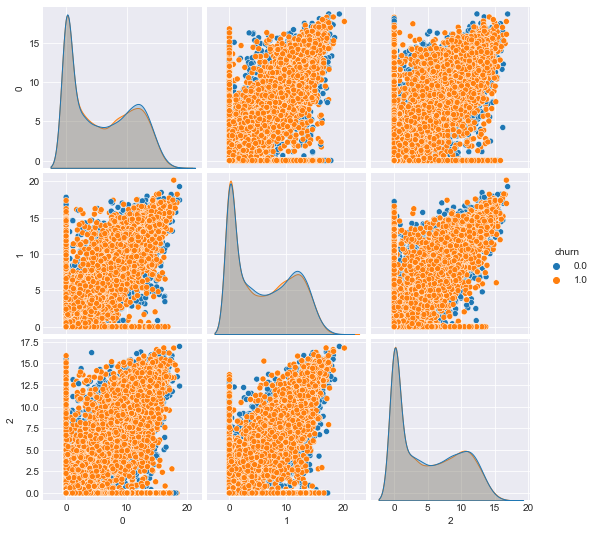

In [73]:
pairplot('og', 'std')

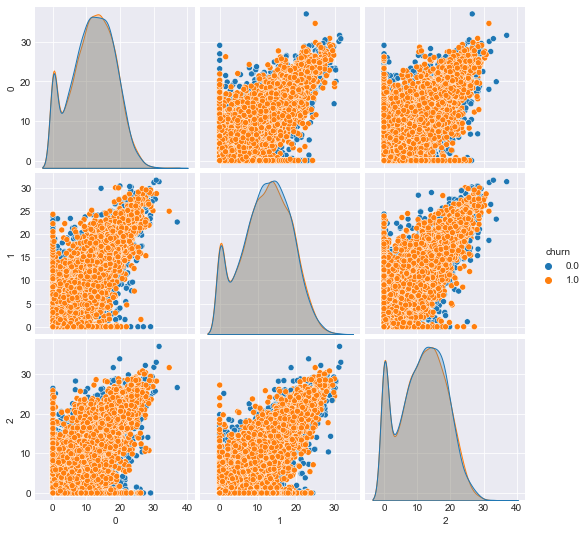

In [74]:
pairplot('og', 'loc')

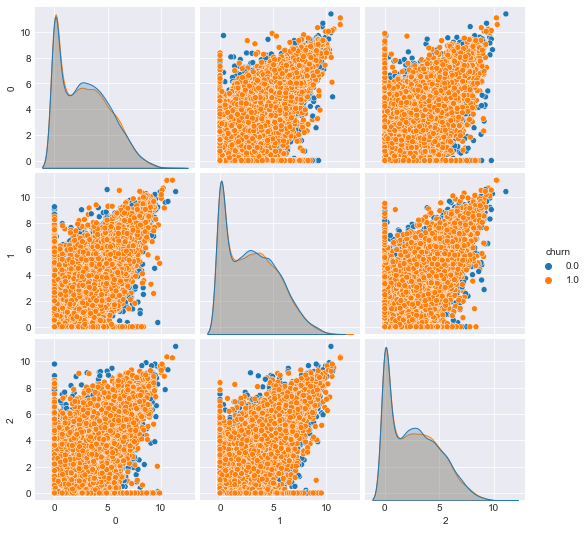

In [75]:
pairplot('ic', 'std')

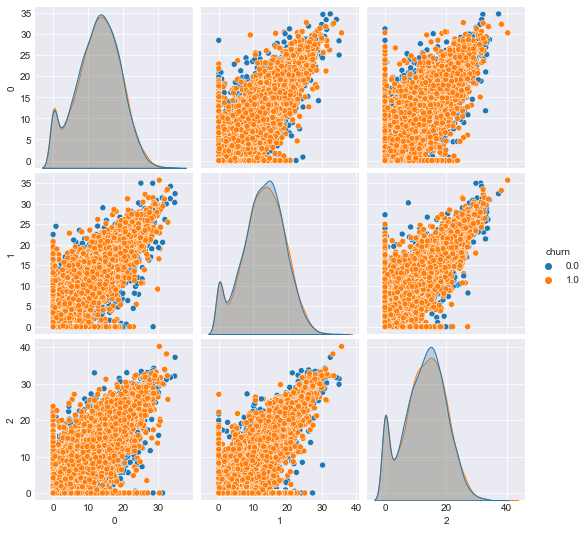

In [76]:
pairplot('ic', 'loc')

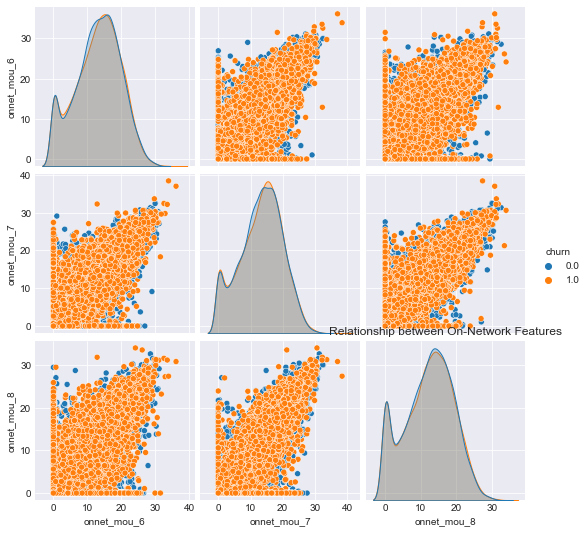

In [77]:
onnet_mou_6 = ['loc_og_t2t_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6',  'std_og_t2f_mou_6', 
               'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_6' , 'std_ic_t2t_mou_6', 'std_ic_t2f_mou_6']
onnet_mou_6 = df[onnet_mou_6].sum(axis = 1)
onnet_mou_7 = ['loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7',  'std_og_t2f_mou_7', 
               'loc_ic_t2t_mou_7', 'loc_ic_t2f_mou_7' , 'std_ic_t2t_mou_7', 'std_ic_t2f_mou_7']
onnet_mou_7 = df[onnet_mou_7].sum(axis = 1)
onnet_mou_8 = ['loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',  'std_og_t2f_mou_8', 
               'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8' , 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8']
onnet_mou_8 = df[onnet_mou_8].sum(axis = 1)

temp = pd.concat([onnet_mou_6, onnet_mou_7, onnet_mou_8, df['churn']], axis = 1)
temp.columns = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'churn']

sns.pairplot(data = temp, hue = 'churn', palette = 'tab10')

plt.title('Relationship between On-Network Features')
plt.show()

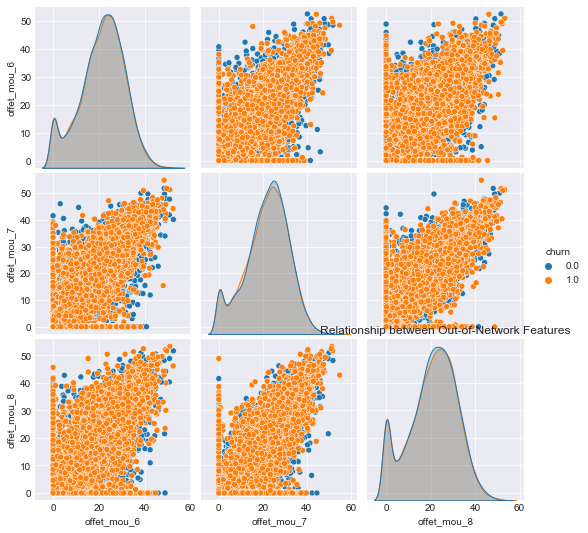

In [78]:
offet_mou_6 = ['loc_og_t2m_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2m_mou_6', 
               'std_ic_t2m_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6', 'ic_others_6']
offet_mou_6 = df[offet_mou_6].sum(axis = 1)
offet_mou_7 = ['loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2m_mou_7', 
               'std_ic_t2m_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7', 'ic_others_7']
offet_mou_7 = df[offet_mou_7].sum(axis = 1)
offet_mou_8 = ['loc_og_t2m_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2m_mou_8', 
               'std_ic_t2m_mou_8', 'isd_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8']
offet_mou_8 = df[offet_mou_8].sum(axis = 1)

temp = pd.concat([offet_mou_6, offet_mou_7, offet_mou_8, df['churn']], axis = 1)
temp.columns = ['offet_mou_6', 'offet_mou_7', 'offet_mou_8', 'churn']

sns.pairplot(data = temp, hue = 'churn', palette = 'tab10')

plt.title('Relationship between Out-of-Network Features')
plt.show()

# 6. Train-Test Split

In [79]:
# Splitting data into 70 for train and 30 test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

In [80]:
print("Train Data set")
print('X:', X_train.shape)
print('y:', y_train.shape)

print("\nTest Data set")
print('X:', X_test.shape)
print('y:', y_test.shape)

Train Data set
X: (38603, 131)
y: (38603,)

Test Data set
X: (16545, 131)
y: (16545,)


# 7. Feature Scaling

In [81]:
# Initializing standard scaler

scaler = StandardScaler()

In [82]:
#statistical description of train and test columns

X_train[cols].describe().round(2)
X_test[cols].describe().round(2)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count  16545.00  16545.00  16545.00     16545.00     16545.00     16545.00   
mean      23.47     21.59     22.48         6.44         6.03         4.46   
std        7.11      7.10     14.91         3.87         3.78         3.77   
min        0.00      0.00      0.00         0.00         0.00         0.00   
25%       19.66     18.03     10.54         3.64         3.21         0.26   
50%       23.68     22.06     24.42         6.51         6.13         4.34   
75%       27.48     25.58     32.70         9.29         8.76         7.27   
max      108.87    110.81    200.64        18.23        17.87        17.05   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      16545.00      16545.00      16545.00       16545.00       16545.00   
mean          12.53         11.71          8.77           0.44           0.41   
std            6.68          6.58          6.94           0.83           0.73   
min            0.00          0.00          0.00           0.00           0.00   
25%            8.34          7.37          1.55           0.00           0.00   
50%           12.78         11.86          8.83           0.00           0.00   
75%           16.91         16.13         13.86           0.39           0.51   
max           40.93         36.24         38.77           3.06           2.59   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       16545.00       16545.00       16545.00       16545.00   
mean            0.45           0.60           0.63           0.62   
std             0.74           1.12           1.11           1.02   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.76           0.60           0.90           1.07   
max             2.56           4.16           3.90           3.50   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          16545.00          16545.00          16545.00          16545.00   
mean               3.30              3.14              2.42              6.60   
std                2.24              2.26              2.42              4.14   
min                0.00              0.00              0.00              0.00   
25%                1.54              1.16              0.00              3.65   
50%                3.39              3.23              2.03              6.64   
75%                4.85              4.73              4.28              9.48   
max               12.09             12.69             12.95             24.59   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count          16545.00          16545.00          16545.00          16545.00   
mean               6.42              5.00              0.54              0.52   
std                4.26              4.75              0.71              0.70   
min                0.00              0.00              0.00              0.00   
25%                3.25              0.00              0.00              0.00   
50%                6.46              4.46              0.03              0.00   
75%                9.36              8.61              1.03              0.99   
max               25.28             26.96              2.72              2.70   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count          16545.00          16545.00          16545.00          16545.00   
mean               0.40              0.17              0.20              0.14   
std                0.66              0.31              0.36              0.30   
min                0.00              0.00              0.00              0.00   
25%                0.00              0.00              0.00              0.00   
50%     

In [83]:
#applying scaler on test and train data 
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [84]:
#statistical description of train and test columns after scaling

X_train[cols].describe().round(2)
X_test[cols].describe().round(2)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count  16545.00  16545.00  16545.00     16545.00     16545.00     16545.00   
mean      -0.00      0.01      0.02        -0.00         0.01         0.01   
std        1.02      1.01      1.02         0.99         1.00         1.00   
min       -3.37     -3.06     -1.52        -1.66        -1.58        -1.17   
25%       -0.55     -0.49     -0.80        -0.72        -0.74        -1.10   
50%        0.03      0.08      0.15         0.02         0.03        -0.02   
75%        0.57      0.58      0.72         0.73         0.73         0.76   
max       12.26     12.72     12.19         3.03         3.13         3.37   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      16545.00      16545.00      16545.00       16545.00       16545.00   
mean          -0.00          0.01          0.02          -0.00          -0.01   
std            0.99          1.00          1.01           1.00           0.99   
min           -1.87         -1.77         -1.25          -0.53          -0.56   
25%           -0.62         -0.65         -1.03          -0.53          -0.56   
50%            0.04          0.04          0.03          -0.53          -0.56   
75%            0.65          0.69          0.75          -0.06           0.13   
max            4.23          3.75          4.36           3.15           2.92   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       16545.00       16545.00       16545.00       16545.00   
mean           -0.01          -0.00          -0.01          -0.00   
std             1.00           0.99           0.99           1.00   
min            -0.61          -0.54          -0.57          -0.61   
25%            -0.61          -0.54          -0.57          -0.61   
50%            -0.61          -0.54          -0.57          -0.61   
75%             0.42          -0.01           0.22           0.44   
max             2.83           3.14           2.91           2.83   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          16545.00          16545.00          16545.00          16545.00   
mean               0.01              0.02              0.01              0.00   
std                1.00              1.01              1.01              1.01   
min               -1.47             -1.38             -0.99             -1.60   
25%               -0.78             -0.86             -0.99             -0.71   
50%                0.05              0.06             -0.15              0.01   
75%                0.70              0.72              0.79              0.70   
max                3.95              4.27              4.39              4.37   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count          16545.00          16545.00          16545.00          16545.00   
mean               0.01              0.01              0.01              0.01   
std                1.00              1.00              1.00              1.00   
min               -1.51             -1.04             -0.75             -0.73   
25%               -0.74             -1.04             -0.75             -0.73   
50%                0.02             -0.10             -0.70             -0.73   
75%                0.70              0.78              0.72              0.69   
max                4.45              4.65              3.10              3.12   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count          16545.00          16545.00          16545.00          16545.00   
mean               0.00             -0.01              0.00             -0.01   
std                1.00              1.00              1.01              1.00   
min               -0.61             -0.55             -0.56             -0.47   
25%               -0.61             -0.55             -0.56             -0.47   
50%     

# 8. Modelling

##  Dimensionality Reduction

- Using PCA, output of which will be used to build the high-performance model.

In [85]:
# Initializing PCA 

pca = PCA(random_state = 42)

In [86]:
#fitting pca on X-train
X_train_pca = pca.fit(X_train)

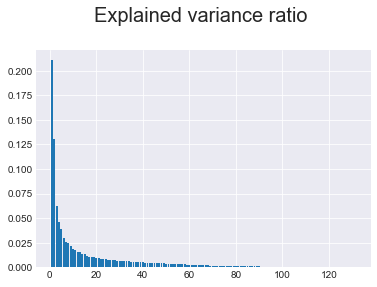

In [87]:
#visual representation of explained variance ratio
plt.bar(range(1, len(X_train_pca.explained_variance_ratio_) + 1), X_train_pca.explained_variance_ratio_)
plt.title("Explained variance ratio \n", fontsize=20)
plt.show()

In [88]:
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)

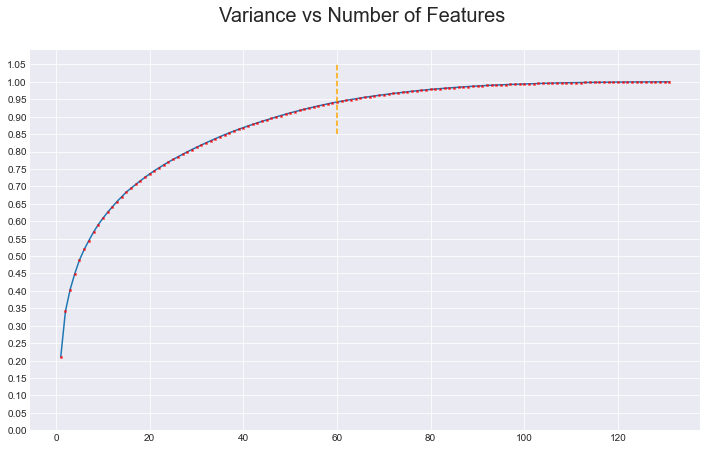

In [89]:
# Plotting to find number of features required to get 95% of explained variance

plt.figure(figsize = [12, 7])

plt.plot(range(1, len(var_cumu) + 1), var_cumu, marker = 'x', markersize = 2, markeredgecolor = 'red')
plt.plot([60, 60], [0.85, 1.05], color = 'orange', linestyle = 'dashed')
plt.title("Variance vs Number of Features \n", fontsize=20)

plt.yticks(np.arange(0, 1.1, 0.05))
plt.show()

#### 60 Principal components are required to 95% of explained variance. Hence the data dimension can be reduced to 60 variables/ features

In [90]:
#initializing PCA of 60 components
pca = PCA(n_components = 60, random_state = 42)

In [91]:
# Performing PCA with 60 Principal components on train data-set

X_train_pca = pca.fit_transform(X_train)

In [92]:
# Performing PCA with 60 Principal comonents on test data-set

X_test_pca = pca.transform(X_test)

## c. Interpretable Model

- ### Logistic Regression

In [93]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38471
Model Family:                Binomial   Df Model:                          131
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12157.
Date:                Mon, 03 May 2021   Deviance:                       24314.
Time:                        20:16:00   Pearson chi2:                 4.73e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7272      0.072     23.996      0.000       1.586       1.868
arpu_6                -0.2170      0.046     -4.681      0.000      -0.308      -0.126
arpu_7                -0.2616      0.046     -5.640      0.000      -0.353      -0.171
arpu_8                -0.0399      0.057     -0.700      0.484      -0.152       0.072
onnet_mou_6            0.1380      0.072      1.907      0.057      -0.004       0.280
onnet_mou_7            0.4774      0.080      5.982      0.000       0.321       0.634
onnet_mou_8           -0.8611      0.073    -11.829      0.000      -1.004      -0.718
offnet_mou_6          -0.0265      0.075     -0.354      0.724      -0.173       0.120
offnet_mou_7           0.6103      0.084      7.306      0.000       0.447       0.774
offnet_mou_8          -1.0047      0.079    -12.783      0.000      -1.159      -0.851
roam_ic_mou_6          0.0048      0.052      0.092      0.927      -0.097       0.106
roam_ic_mou_7          0.1007      0.055      1.828      0.068      -0.007       0.209
roam_ic_mou_8         -0.2920      0.046     -6.336      0.000      -0.382      -0.202
roam_og_mou_6          0.0229      0.053      0.434      0.664      -0.080       0.126
roam_og_mou_7         -0.3594      0.057     -6.274      0.000      -0.472      -0.247
roam_og_mou_8          1.0701      0.047     22.628      0.000       0.977       1.163
loc_og_t2t_mou_6       0.0712      0.073      0.973      0.330      -0.072       0.215
loc_og_t2t_mou_7      -0.3132      0.079     -3.986      0.000      -0.467      -0.159
loc_og_t2t_mou_8       0.6293      0.086      7.353      0.000       0.462       0.797
loc_og_t2m_mou_6       0.1252      0.122      1.024      0.306      -0.114       0.365
loc_og_t2m_mou_7      -0.6126      0.141     -4.336      0.000      -0.890      -0.336
loc_og_t2m_mou_8       0.9826      0.152      6.465      0.000       0.685       1.280
loc_og_t2f_mou_6       0.0206      0.029      0.711      0.477      -0.036       0.078
loc_og_t2f_mou_7      -0.0251      0.031     -0.823      0.410      -0.085       0.035
loc_og_t2f_mou_8      -0.0810      0.030     -2.657      0.008      -0.141      -0.021
loc_og_t2c_mou_6      -0.0628      0.022     -2.835      0.005      -0.106      -0.019
loc_og_t2c_mou_7      -0.0407      0.023     -1.794      0.073      -0.085       0.004
loc_og_t2c_mou_8       0.0062      0.022      0.284      0.777      -0.036       0.049
loc_og_mou_6          -0.3397      0.163     -2.089      0.037      -0.658      -0.021
loc_og_mou_7           0.4617      0.190      2.435      0.015       0.090       0.833
loc_og_mou_8          -1.1039      0.207     -5.335      0.000      -1.509      -0.698
std_og_t2t_mou_6      -0.0157      0.077     -0.204      0.839      -0.167       0.135
std_og_t2t_mou_7       0.0463      0.0

#### Feature Selection Using RFE

In [94]:
# Initializing Logistic regression model

logreg = LogisticRegression(random_state = 100)

In [95]:
%%time

# Running RFE with 30 variables as output

rfe = RFE(logreg, 30)             
rfe = rfe.fit(X_train, y_train)

Wall time: 1min 17s


In [96]:
rfe.support_

array([False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 15),
 ('arpu_7', False, 14),
 ('arpu_8', False, 72),
 ('onnet_mou_6', False, 25),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 99),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 102),
 ('roam_ic_mou_7', False, 40),
 ('roam_ic_mou_8', False, 10),
 ('roam_og_mou_6', False, 87),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 82),
 ('loc_og_t2t_mou_7', False, 12),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 81),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 92),
 ('loc_og_t2f_mou_7', False, 93),
 ('loc_og_t2f_mou_8', False, 45),
 ('loc_og_t2c_mou_6', False, 48),
 ('loc_og_t2c_mou_7', False, 85),
 ('loc_og_t2c_mou_8', False, 101),
 ('loc_og_mou_6', False, 24),
 ('loc_og_mou_7', False, 11),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 70),
 ('std_og_t2t_mou_7', False, 68),
 ('std_og_t2t_mou

In [98]:
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

In [99]:
X_train_rfe = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38572
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12946.
Date:                Mon, 03 May 2021   Deviance:                       25893.
Time:                        20:19:27   Pearson chi2:                 4.25e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4054      0.054     26.233      0.000       1.300       1.510
onnet_mou_7            0.3578      0.040      8.976      0.000       0.280       0.436
onnet_mou_8           -0.7755      0.050    -15.416      0.000      -0.874      -0.677
offnet_mou_7           0.3177      0.045      7.085      0.000       0.230       0.406
offnet_mou_8          -0.8079      0.055    -14.687      0.000      -0.916      -0.700
roam_og_mou_7         -0.2995      0.023    -13.206      0.000      -0.344      -0.255
roam_og_mou_8          0.8302      0.022     38.176      0.000       0.788       0.873
loc_og_t2t_mou_8       0.6123      0.065      9.412      0.000       0.485       0.740
loc_og_t2m_mou_7      -0.3275      0.049     -6.645      0.000      -0.424      -0.231
loc_og_t2m_mou_8       0.9394      0.107      8.776      0.000       0.730       1.149
loc_og_mou_8          -1.2104      0.134     -9.030      0.000      -1.473      -0.948
total_og_mou_8         0.9489      0.067     14.222      0.000       0.818       1.080
loc_ic_t2t_mou_8      -0.3135      0.037     -8.503      0.000      -0.386      -0.241
loc_ic_t2m_mou_7       0.6150      0.043     14.340      0.000       0.531       0.699
loc_ic_t2m_mou_8      -1.0971      0.053    -20.512      0.000      -1.202      -0.992
std_ic_mou_8          -0.2547      0.023    -11.224      0.000      -0.299      -0.210
last_day_rch_amt_8    -0.5321      0.018    -28.903      0.000      -0.568      -0.496
max_rech_data_8        0.5893      0.049     11.932      0.000       0.492       0.686
vol_2g_mb_7            0.3126      0.024     12.970      0.000       0.265       0.360
vol_2g_mb_8           -0.5240      0.031    -16.805      0.000      -0.585      -0.463
vol_3g_mb_8           -0.4094      0.033    -12.399      0.000      -0.474      -0.345
monthly_2g_6          -0.6339      0.056    -11.282      0.000      -0.744      -0.524
monthly_2g_7          -1.0744      0.066    -16.402      0.000      -1.203      -0.946
monthly_2g_8          -1.3923      0.108    -12.913      0.000      -1.604      -1.181
sachet_2g_8           -0.4004      0.023    -17.692      0.000      -0.445      -0.356
monthly_3g_8          -0.4682      0.035    -13.417      0.000      -0.537      -0.400
rech_amt_avg           0.4805      0.024     19.974      0.000       0.433       0.528
churn_prob_cat        -0.5281      0.104     -5.074      0.000      -0.732      -0.324
total_mou_6           -0.1502      0.021     -7.068      0.000      -0.192      -0.109
total_mou_7           -0.3741      0.035    -10.721      0.000      -0.442      -0.306
total_mou_8           -0.4235      0.041    -10.281      0.000      -0.504      -0.343
======================================================================================
"""

#### Checking VIF

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9         loc_og_mou_8  58.59
8     loc_og_t2m_mou_8  37.86
6     loc_og_t2t_mou_8  16.68
10      total_og_mou_8  16.28
3         offnet_mou_8  12.14
29         total_mou_8  12.12
28         total_mou_7  10.10
13    loc_ic_t2m_mou_8   9.95
1          onnet_mou_8   9.49
7     loc_og_t2m_mou_7   8.39
16     max_rech_data_8   8.18
2         offnet_mou_7   6.21
12    loc_ic_t2m_mou_7   6.16
27         total_mou_6   5.44
11    loc_ic_t2t_mou_8   5.17
0          onnet_mou_7   4.53
24        monthly_3g_8   3.77
18         vol_2g_mb_8   3.65
19         vol_3g_mb_8   3.65
22        monthly_2g_8   3.00
5        roam_og_mou_8   2.19
14        std_ic_mou_8   2.08
25        rech_amt_avg   2.08
21        monthly_2g_7   2.05
17         vol_2g_mb_7   2.03
4        roam_og_mou_7   1.86
23         sachet_2g_8   1.80
20        monthly_2g_6   1.73
15  last_day_rch_amt_8   1.53
26      churn_prob_cat   1.09

In [101]:
# Removing 'loc_og_mou_8' as vif>3

col = col.drop('loc_og_mou_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2b = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2b.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38573
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12993.
Date:                Mon, 03 May 2021   Deviance:                       25986.
Time:                        20:20:15   Pearson chi2:                 4.18e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4056      0.053     26.325      0.000       1.301       1.510
onnet_mou_7            0.3557      0.040      8.979      0.000       0.278       0.433
onnet_mou_8           -0.7176      0.050    -14.392      0.000      -0.815      -0.620
offnet_mou_7           0.3429      0.045      7.652      0.000       0.255       0.431
offnet_mou_8          -0.7662      0.055    -13.934      0.000      -0.874      -0.658
roam_og_mou_7         -0.3155      0.023    -13.930      0.000      -0.360      -0.271
roam_og_mou_8          0.8256      0.022     38.020      0.000       0.783       0.868
loc_og_t2t_mou_8       0.1263      0.039      3.265      0.001       0.050       0.202
loc_og_t2m_mou_7      -0.3392      0.049     -6.902      0.000      -0.436      -0.243
loc_og_t2m_mou_8       0.1525      0.059      2.564      0.010       0.036       0.269
total_og_mou_8         0.8438      0.066     12.812      0.000       0.715       0.973
loc_ic_t2t_mou_8      -0.2592      0.036     -7.208      0.000      -0.330      -0.189
loc_ic_t2m_mou_7       0.6077      0.043     14.244      0.000       0.524       0.691
loc_ic_t2m_mou_8      -1.1013      0.053    -20.709      0.000      -1.206      -0.997
std_ic_mou_8          -0.2477      0.023    -10.974      0.000      -0.292      -0.203
last_day_rch_amt_8    -0.5374      0.018    -29.258      0.000      -0.573      -0.501
max_rech_data_8        0.5904      0.049     11.995      0.000       0.494       0.687
vol_2g_mb_7            0.3110      0.024     12.937      0.000       0.264       0.358
vol_2g_mb_8           -0.5334      0.031    -17.140      0.000      -0.594      -0.472
vol_3g_mb_8           -0.4136      0.033    -12.553      0.000      -0.478      -0.349
monthly_2g_6          -0.6298      0.056    -11.247      0.000      -0.740      -0.520
monthly_2g_7          -1.0766      0.065    -16.467      0.000      -1.205      -0.949
monthly_2g_8          -1.3834      0.108    -12.853      0.000      -1.594      -1.172
sachet_2g_8           -0.3938      0.023    -17.447      0.000      -0.438      -0.350
monthly_3g_8          -0.4603      0.035    -13.227      0.000      -0.529      -0.392
rech_amt_avg           0.4743      0.024     19.800      0.000       0.427       0.521
churn_prob_cat        -0.5341      0.104     -5.119      0.000      -0.739      -0.330
total_mou_6           -0.1429      0.021     -6.734      0.000      -0.185      -0.101
total_mou_7           -0.3850      0.035    -11.069      0.000      -0.453      -0.317
total_mou_8           -0.4181      0.041    -10.200      0.000      -0.498      -0.338
======================================================================================
"""

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9       total_og_mou_8  15.50
8     loc_og_t2m_mou_8  13.93
28         total_mou_8  12.11
3         offnet_mou_8  12.00
27         total_mou_7  10.09
12    loc_ic_t2m_mou_8   9.94
1          onnet_mou_8   9.32
7     loc_og_t2m_mou_7   8.39
15     max_rech_data_8   8.18
6     loc_og_t2t_mou_8   6.78
2         offnet_mou_7   6.18
11    loc_ic_t2m_mou_7   6.16
26         total_mou_6   5.44
10    loc_ic_t2t_mou_8   5.08
0          onnet_mou_7   4.53
23        monthly_3g_8   3.77
17         vol_2g_mb_8   3.65
18         vol_3g_mb_8   3.65
21        monthly_2g_8   3.00
5        roam_og_mou_8   2.19
24        rech_amt_avg   2.08
13        std_ic_mou_8   2.07
20        monthly_2g_7   2.05
16         vol_2g_mb_7   2.03
4        roam_og_mou_7   1.85
22         sachet_2g_8   1.80
19        monthly_2g_6   1.73
14  last_day_rch_amt_8   1.53
25      churn_prob_cat   1.09

In [103]:
# Removing 'total_og_mou_8' as vif>3

col = col.drop('total_og_mou_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2c = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2c.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38574
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13073.
Date:                Mon, 03 May 2021   Deviance:                       26147.
Time:                        20:21:43   Pearson chi2:                 4.29e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1436      0.049     23.421      0.000       1.048       1.239
onnet_mou_7            0.3782      0.040      9.517      0.000       0.300       0.456
onnet_mou_8           -0.4546      0.046     -9.804      0.000      -0.546      -0.364
offnet_mou_7           0.3738      0.045      8.248      0.000       0.285       0.463
offnet_mou_8          -0.4915      0.052     -9.422      0.000      -0.594      -0.389
roam_og_mou_7         -0.3885      0.022    -17.625      0.000      -0.432      -0.345
roam_og_mou_8          0.7527      0.021     36.330      0.000       0.712       0.793
loc_og_t2t_mou_8       0.1359      0.039      3.512      0.000       0.060       0.212
loc_og_t2m_mou_7      -0.4133      0.049     -8.454      0.000      -0.509      -0.317
loc_og_t2m_mou_8       0.2577      0.059      4.357      0.000       0.142       0.374
loc_ic_t2t_mou_8      -0.2894      0.035     -8.174      0.000      -0.359      -0.220
loc_ic_t2m_mou_7       0.5742      0.042     13.578      0.000       0.491       0.657
loc_ic_t2m_mou_8      -1.1071      0.053    -21.046      0.000      -1.210      -1.004
std_ic_mou_8          -0.2114      0.022     -9.547      0.000      -0.255      -0.168
last_day_rch_amt_8    -0.5496      0.018    -30.007      0.000      -0.585      -0.514
max_rech_data_8        0.5832      0.049     11.874      0.000       0.487       0.679
vol_2g_mb_7            0.3182      0.024     13.311      0.000       0.271       0.365
vol_2g_mb_8           -0.5343      0.031    -17.249      0.000      -0.595      -0.474
vol_3g_mb_8           -0.4054      0.033    -12.345      0.000      -0.470      -0.341
monthly_2g_6          -0.6276      0.056    -11.225      0.000      -0.737      -0.518
monthly_2g_7          -1.0733      0.065    -16.444      0.000      -1.201      -0.945
monthly_2g_8          -1.3833      0.108    -12.857      0.000      -1.594      -1.172
sachet_2g_8           -0.3853      0.022    -17.191      0.000      -0.429      -0.341
monthly_3g_8          -0.4675      0.035    -13.435      0.000      -0.536      -0.399
rech_amt_avg           0.4856      0.024     20.241      0.000       0.439       0.533
churn_prob_cat        -0.5215      0.104     -4.999      0.000      -0.726      -0.317
total_mou_6           -0.1441      0.021     -6.754      0.000      -0.186      -0.102
total_mou_7           -0.3354      0.034     -9.759      0.000      -0.403      -0.268
total_mou_8           -0.1822      0.036     -5.090      0.000      -0.252      -0.112
======================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8     loc_og_t2m_mou_8  13.66
27         total_mou_8  11.07
26         total_mou_7   9.98
11    loc_ic_t2m_mou_8   9.93
3         offnet_mou_8   9.78
7     loc_og_t2m_mou_7   8.21
14     max_rech_data_8   8.17
1          onnet_mou_8   7.33
6     loc_og_t2t_mou_8   6.77
10    loc_ic_t2m_mou_7   6.16
2         offnet_mou_7   6.04
25         total_mou_6   5.33
9     loc_ic_t2t_mou_8   5.06
0          onnet_mou_7   4.44
22        monthly_3g_8   3.76
16         vol_2g_mb_8   3.65
17         vol_3g_mb_8   3.65
20        monthly_2g_8   3.00
19        monthly_2g_7   2.05
23        rech_amt_avg   2.05
15         vol_2g_mb_7   2.03
12        std_ic_mou_8   2.00
5        roam_og_mou_8   1.93
21         sachet_2g_8   1.80
18        monthly_2g_6   1.73
4        roam_og_mou_7   1.62
13  last_day_rch_amt_8   1.52
24      churn_prob_cat   1.09

In [105]:
# Removing 'loc_og_t2m_mou_8' as VIF > 3
col = col.drop('loc_og_t2m_mou_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2d = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2d.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38575
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13083.
Date:                Mon, 03 May 2021   Deviance:                       26166.
Time:                        20:22:30   Pearson chi2:                 4.30e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1453      0.049     23.434      0.000       1.049       1.241
onnet_mou_7            0.3695      0.040      9.339      0.000       0.292       0.447
onnet_mou_8           -0.4568      0.046     -9.876      0.000      -0.547      -0.366
offnet_mou_7           0.3016      0.042      7.219      0.000       0.220       0.383
offnet_mou_8          -0.3812      0.045     -8.443      0.000      -0.470      -0.293
roam_og_mou_7         -0.3813      0.022    -17.362      0.000      -0.424      -0.338
roam_og_mou_8          0.7437      0.021     36.132      0.000       0.703       0.784
loc_og_t2t_mou_8       0.1797      0.037      4.816      0.000       0.107       0.253
loc_og_t2m_mou_7      -0.2694      0.036     -7.476      0.000      -0.340      -0.199
loc_ic_t2t_mou_8      -0.3039      0.035     -8.638      0.000      -0.373      -0.235
loc_ic_t2m_mou_7       0.5258      0.041     12.885      0.000       0.446       0.606
loc_ic_t2m_mou_8      -1.0045      0.047    -21.407      0.000      -1.096      -0.913
std_ic_mou_8          -0.2125      0.022     -9.592      0.000      -0.256      -0.169
last_day_rch_amt_8    -0.5508      0.018    -30.038      0.000      -0.587      -0.515
max_rech_data_8        0.5855      0.049     11.916      0.000       0.489       0.682
vol_2g_mb_7            0.3198      0.024     13.381      0.000       0.273       0.367
vol_2g_mb_8           -0.5390      0.031    -17.407      0.000      -0.600      -0.478
vol_3g_mb_8           -0.4077      0.033    -12.420      0.000      -0.472      -0.343
monthly_2g_6          -0.6272      0.056    -11.219      0.000      -0.737      -0.518
monthly_2g_7          -1.0750      0.065    -16.462      0.000      -1.203      -0.947
monthly_2g_8          -1.3791      0.108    -12.808      0.000      -1.590      -1.168
sachet_2g_8           -0.3846      0.022    -17.163      0.000      -0.429      -0.341
monthly_3g_8          -0.4672      0.035    -13.412      0.000      -0.535      -0.399
rech_amt_avg           0.4889      0.024     20.371      0.000       0.442       0.536
churn_prob_cat        -0.5193      0.104     -4.992      0.000      -0.723      -0.315
total_mou_6           -0.1453      0.021     -6.816      0.000      -0.187      -0.104
total_mou_7           -0.3430      0.034     -9.990      0.000      -0.410      -0.276
total_mou_8           -0.1749      0.036     -4.891      0.000      -0.245      -0.105
======================================================================================
"""

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
26         total_mou_8  11.07
25         total_mou_7   9.97
13     max_rech_data_8   8.17
3         offnet_mou_8   7.50
10    loc_ic_t2m_mou_8   7.34
1          onnet_mou_8   7.28
6     loc_og_t2t_mou_8   6.13
9     loc_ic_t2m_mou_7   5.58
2         offnet_mou_7   5.41
24         total_mou_6   5.33
8     loc_ic_t2t_mou_8   5.00
7     loc_og_t2m_mou_7   4.96
0          onnet_mou_7   4.43
21        monthly_3g_8   3.76
16         vol_3g_mb_8   3.65
15         vol_2g_mb_8   3.65
19        monthly_2g_8   3.00
18        monthly_2g_7   2.05
22        rech_amt_avg   2.05
14         vol_2g_mb_7   2.03
11        std_ic_mou_8   2.00
5        roam_og_mou_8   1.90
20         sachet_2g_8   1.80
17        monthly_2g_6   1.73
4        roam_og_mou_7   1.62
12  last_day_rch_amt_8   1.52
23      churn_prob_cat   1.09

In [108]:
# Removing 'total_mou_8' as vif >3

col = col.drop('total_mou_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2e = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2e.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38577
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13107.
Date:                Mon, 03 May 2021   Deviance:                       26213.
Time:                        20:23:45   Pearson chi2:                 4.32e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0968      0.048     23.035      0.000       1.004       1.190
onnet_mou_7            0.3865      0.039     10.019      0.000       0.311       0.462
onnet_mou_8           -0.4615      0.041    -11.259      0.000      -0.542      -0.381
offnet_mou_7           0.3119      0.041      7.627      0.000       0.232       0.392
offnet_mou_8          -0.4318      0.042    -10.339      0.000      -0.514      -0.350
roam_og_mou_7         -0.3832      0.022    -17.512      0.000      -0.426      -0.340
roam_og_mou_8          0.7588      0.020     38.500      0.000       0.720       0.797
loc_og_t2m_mou_7      -0.1941      0.033     -5.834      0.000      -0.259      -0.129
loc_ic_t2t_mou_8      -0.2142      0.029     -7.461      0.000      -0.270      -0.158
loc_ic_t2m_mou_7       0.5294      0.040     13.215      0.000       0.451       0.608
loc_ic_t2m_mou_8      -1.0498      0.046    -22.932      0.000      -1.140      -0.960
std_ic_mou_8          -0.2371      0.022    -10.898      0.000      -0.280      -0.194
last_day_rch_amt_8    -0.5559      0.018    -30.372      0.000      -0.592      -0.520
max_rech_data_8        0.5962      0.049     12.141      0.000       0.500       0.692
vol_2g_mb_7            0.3254      0.024     13.610      0.000       0.279       0.372
vol_2g_mb_8           -0.5445      0.031    -17.608      0.000      -0.605      -0.484
vol_3g_mb_8           -0.4102      0.033    -12.507      0.000      -0.475      -0.346
monthly_2g_6          -0.6257      0.056    -11.156      0.000      -0.736      -0.516
monthly_2g_7          -1.0714      0.065    -16.391      0.000      -1.200      -0.943
monthly_2g_8          -1.3882      0.108    -12.883      0.000      -1.599      -1.177
sachet_2g_8           -0.3802      0.022    -17.007      0.000      -0.424      -0.336
monthly_3g_8          -0.4686      0.035    -13.439      0.000      -0.537      -0.400
rech_amt_avg           0.4904      0.024     20.451      0.000       0.443       0.537
churn_prob_cat        -0.5249      0.103     -5.074      0.000      -0.728      -0.322
total_mou_6           -0.1581      0.021     -7.510      0.000      -0.199      -0.117
total_mou_7           -0.4186      0.031    -13.369      0.000      -0.480      -0.357
======================================================================================
"""

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12     max_rech_data_8  8.14
9     loc_ic_t2m_mou_8  7.02
3         offnet_mou_8  6.55
24         total_mou_7  5.98
1          onnet_mou_8  5.81
8     loc_ic_t2m_mou_7  5.29
2         offnet_mou_7  5.04
23         total_mou_6  4.83
6     loc_og_t2m_mou_7  4.38
0          onnet_mou_7  4.10
20        monthly_3g_8  3.75
15         vol_3g_mb_8  3.65
14         vol_2g_mb_8  3.64
7     loc_ic_t2t_mou_8  3.42
18        monthly_2g_8  2.99
17        monthly_2g_7  2.05
21        rech_amt_avg  2.04
13         vol_2g_mb_7  2.02
10        std_ic_mou_8  1.95
19         sachet_2g_8  1.80
16        monthly_2g_6  1.73
5        roam_og_mou_8  1.67
4        roam_og_mou_7  1.58
11  last_day_rch_amt_8  1.52
22      churn_prob_cat  1.09

In [110]:
# Removing 'max_rech_data_8' as vif>3

col = col.drop('max_rech_data_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2f = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2f.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38578
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13184.
Date:                Mon, 03 May 2021   Deviance:                       26367.
Time:                        20:24:38   Pearson chi2:                 4.28e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0379      0.047     21.991      0.000       0.945       1.130
onnet_mou_7            0.3772      0.039      9.774      0.000       0.302       0.453
onnet_mou_8           -0.4708      0.041    -11.479      0.000      -0.551      -0.390
offnet_mou_7           0.2861      0.041      7.017      0.000       0.206       0.366
offnet_mou_8          -0.4258      0.042    -10.222      0.000      -0.507      -0.344
roam_og_mou_7         -0.3844      0.022    -17.570      0.000      -0.427      -0.342
roam_og_mou_8          0.7681      0.020     39.048      0.000       0.730       0.807
loc_og_t2m_mou_7      -0.1646      0.033     -4.988      0.000      -0.229      -0.100
loc_ic_t2t_mou_8      -0.2067      0.029     -7.227      0.000      -0.263      -0.151
loc_ic_t2m_mou_7       0.5011      0.040     12.576      0.000       0.423       0.579
loc_ic_t2m_mou_8      -1.0547      0.046    -23.115      0.000      -1.144      -0.965
std_ic_mou_8          -0.2309      0.022    -10.666      0.000      -0.273      -0.188
last_day_rch_amt_8    -0.5442      0.018    -29.834      0.000      -0.580      -0.508
vol_2g_mb_7            0.3195      0.024     13.401      0.000       0.273       0.366
vol_2g_mb_8           -0.3908      0.028    -13.990      0.000      -0.446      -0.336
vol_3g_mb_8           -0.1981      0.027     -7.255      0.000      -0.252      -0.145
monthly_2g_6          -0.6240      0.056    -11.131      0.000      -0.734      -0.514
monthly_2g_7          -1.0790      0.065    -16.594      0.000      -1.206      -0.952
monthly_2g_8          -0.7805      0.092     -8.499      0.000      -0.960      -0.601
sachet_2g_8           -0.2956      0.021    -14.231      0.000      -0.336      -0.255
monthly_3g_8          -0.2093      0.027     -7.880      0.000      -0.261      -0.157
rech_amt_avg           0.4836      0.024     20.258      0.000       0.437       0.530
churn_prob_cat        -0.6054      0.102     -5.950      0.000      -0.805      -0.406
total_mou_6           -0.1585      0.021     -7.532      0.000      -0.200      -0.117
total_mou_7           -0.4005      0.031    -12.838      0.000      -0.462      -0.339
======================================================================================
"""

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9     loc_ic_t2m_mou_8  7.01
3         offnet_mou_8  6.55
23         total_mou_7  5.97
1          onnet_mou_8  5.81
8     loc_ic_t2m_mou_7  5.29
2         offnet_mou_7  5.04
22         total_mou_6  4.81
6     loc_og_t2m_mou_7  4.37
0          onnet_mou_7  4.10
7     loc_ic_t2t_mou_8  3.42
13         vol_2g_mb_8  2.92
14         vol_3g_mb_8  2.77
19        monthly_3g_8  2.64
17        monthly_2g_8  2.49
16        monthly_2g_7  2.05
20        rech_amt_avg  2.04
12         vol_2g_mb_7  2.02
10        std_ic_mou_8  1.95
15        monthly_2g_6  1.73
18         sachet_2g_8  1.71
5        roam_og_mou_8  1.67
4        roam_og_mou_7  1.58
11  last_day_rch_amt_8  1.51
21      churn_prob_cat  1.07

In [112]:
# Removing 'loc_ic_t2m_mou_8' as vif >3

col = col.drop('loc_ic_t2m_mou_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2g = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2g.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38579
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13468.
Date:                Mon, 03 May 2021   Deviance:                       26936.
Time:                        20:25:04   Pearson chi2:                 4.23e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9856      0.047     21.166      0.000       0.894       1.077
onnet_mou_7            0.5062      0.038     13.280      0.000       0.432       0.581
onnet_mou_8           -0.5687      0.041    -13.978      0.000      -0.648      -0.489
offnet_mou_7           0.5408      0.040     13.599      0.000       0.463       0.619
offnet_mou_8          -0.8192      0.039    -21.173      0.000      -0.895      -0.743
roam_og_mou_7         -0.4061      0.022    -18.717      0.000      -0.449      -0.364
roam_og_mou_8          0.8502      0.019     43.727      0.000       0.812       0.888
loc_og_t2m_mou_7      -0.2349      0.033     -7.210      0.000      -0.299      -0.171
loc_ic_t2t_mou_8      -0.4422      0.027    -16.629      0.000      -0.494      -0.390
loc_ic_t2m_mou_7      -0.0314      0.031     -1.010      0.313      -0.092       0.030
std_ic_mou_8          -0.3093      0.021    -14.573      0.000      -0.351      -0.268
last_day_rch_amt_8    -0.5619      0.018    -31.115      0.000      -0.597      -0.527
vol_2g_mb_7            0.3302      0.024     14.031      0.000       0.284       0.376
vol_2g_mb_8           -0.4171      0.028    -15.103      0.000      -0.471      -0.363
vol_3g_mb_8           -0.2187      0.027     -8.098      0.000      -0.272      -0.166
monthly_2g_6          -0.6237      0.055    -11.324      0.000      -0.732      -0.516
monthly_2g_7          -1.0794      0.064    -16.816      0.000      -1.205      -0.954
monthly_2g_8          -0.7838      0.091     -8.593      0.000      -0.963      -0.605
sachet_2g_8           -0.3027      0.020    -14.769      0.000      -0.343      -0.263
monthly_3g_8          -0.1976      0.026     -7.518      0.000      -0.249      -0.146
rech_amt_avg           0.4883      0.024     20.554      0.000       0.442       0.535
churn_prob_cat        -0.6029      0.101     -5.947      0.000      -0.802      -0.404
total_mou_6           -0.1578      0.021     -7.553      0.000      -0.199      -0.117
total_mou_7           -0.3708      0.031    -12.041      0.000      -0.431      -0.310
======================================================================================
"""

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
22         total_mou_7  5.97
1          onnet_mou_8  5.79
3         offnet_mou_8  5.36
21         total_mou_6  4.81
2         offnet_mou_7  4.64
6     loc_og_t2m_mou_7  4.37
0          onnet_mou_7  4.02
8     loc_ic_t2m_mou_7  3.69
7     loc_ic_t2t_mou_8  2.94
12         vol_2g_mb_8  2.91
13         vol_3g_mb_8  2.76
18        monthly_3g_8  2.64
16        monthly_2g_8  2.49
15        monthly_2g_7  2.05
19        rech_amt_avg  2.04
11         vol_2g_mb_7  2.02
9         std_ic_mou_8  1.91
14        monthly_2g_6  1.73
17         sachet_2g_8  1.71
5        roam_og_mou_8  1.61
4        roam_og_mou_7  1.57
10  last_day_rch_amt_8  1.51
20      churn_prob_cat  1.07

In [114]:
# Removing 'loc_ic_t2m_mou_7' as p value>0.05

col = col.drop('loc_ic_t2m_mou_7')
X_train_rfe = sm.add_constant(X_train[col])

logm2h = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2h.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38580
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13469.
Date:                Mon, 03 May 2021   Deviance:                       26937.
Time:                        20:26:06   Pearson chi2:                 4.23e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9966      0.045     22.004      0.000       0.908       1.085
onnet_mou_7            0.5066      0.038     13.295      0.000       0.432       0.581
onnet_mou_8           -0.5632      0.040    -13.972      0.000      -0.642      -0.484
offnet_mou_7           0.5426      0.040     13.661      0.000       0.465       0.620
offnet_mou_8          -0.8171      0.039    -21.149      0.000      -0.893      -0.741
roam_og_mou_7         -0.4058      0.022    -18.701      0.000      -0.448      -0.363
roam_og_mou_8          0.8497      0.019     43.711      0.000       0.812       0.888
loc_og_t2m_mou_7      -0.2562      0.025    -10.316      0.000      -0.305      -0.208
loc_ic_t2t_mou_8      -0.4505      0.025    -17.786      0.000      -0.500      -0.401
std_ic_mou_8          -0.3114      0.021    -14.736      0.000      -0.353      -0.270
last_day_rch_amt_8    -0.5624      0.018    -31.142      0.000      -0.598      -0.527
vol_2g_mb_7            0.3276      0.023     14.008      0.000       0.282       0.373
vol_2g_mb_8           -0.4172      0.028    -15.106      0.000      -0.471      -0.363
vol_3g_mb_8           -0.2192      0.027     -8.119      0.000      -0.272      -0.166
monthly_2g_6          -0.6244      0.055    -11.341      0.000      -0.732      -0.516
monthly_2g_7          -1.0803      0.064    -16.832      0.000      -1.206      -0.955
monthly_2g_8          -0.7816      0.091     -8.575      0.000      -0.960      -0.603
sachet_2g_8           -0.3031      0.020    -14.793      0.000      -0.343      -0.263
monthly_3g_8          -0.1965      0.026     -7.484      0.000      -0.248      -0.145
rech_amt_avg           0.4900      0.024     20.678      0.000       0.444       0.536
churn_prob_cat        -0.6029      0.101     -5.947      0.000      -0.802      -0.404
total_mou_6           -0.1601      0.021     -7.709      0.000      -0.201      -0.119
total_mou_7           -0.3765      0.030    -12.439      0.000      -0.436      -0.317
======================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
21         total_mou_7  5.95
1          onnet_mou_8  5.68
3         offnet_mou_8  5.32
20         total_mou_6  4.81
2         offnet_mou_7  4.63
0          onnet_mou_7  4.01
11         vol_2g_mb_8  2.90
12         vol_3g_mb_8  2.76
7     loc_ic_t2t_mou_8  2.69
17        monthly_3g_8  2.63
6     loc_og_t2m_mou_7  2.52
15        monthly_2g_8  2.49
14        monthly_2g_7  2.05
18        rech_amt_avg  2.04
10         vol_2g_mb_7  2.01
8         std_ic_mou_8  1.88
13        monthly_2g_6  1.73
16         sachet_2g_8  1.71
5        roam_og_mou_8  1.61
4        roam_og_mou_7  1.56
9   last_day_rch_amt_8  1.51
19      churn_prob_cat  1.07

In [116]:
# Removing 'total_mou_7' as vif >3

col = col.drop('total_mou_7')
X_train_rfe = sm.add_constant(X_train[col])

logm2i = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2i.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38581
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13547.
Date:                Mon, 03 May 2021   Deviance:                       27094.
Time:                        20:26:28   Pearson chi2:                 4.34e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6169      0.033     18.730      0.000       0.552       0.681
onnet_mou_7            0.3676      0.037     10.057      0.000       0.296       0.439
onnet_mou_8           -0.5728      0.040    -14.187      0.000      -0.652      -0.494
offnet_mou_7           0.3576      0.037      9.708      0.000       0.285       0.430
offnet_mou_8          -0.8018      0.039    -20.785      0.000      -0.877      -0.726
roam_og_mou_7         -0.3167      0.020    -15.678      0.000      -0.356      -0.277
roam_og_mou_8          0.8551      0.019     44.230      0.000       0.817       0.893
loc_og_t2m_mou_7      -0.2568      0.025    -10.421      0.000      -0.305      -0.208
loc_ic_t2t_mou_8      -0.4593      0.025    -18.340      0.000      -0.508      -0.410
std_ic_mou_8          -0.3436      0.021    -16.497      0.000      -0.384      -0.303
last_day_rch_amt_8    -0.5663      0.018    -31.447      0.000      -0.602      -0.531
vol_2g_mb_7            0.3451      0.023     14.794      0.000       0.299       0.391
vol_2g_mb_8           -0.4153      0.028    -15.038      0.000      -0.469      -0.361
vol_3g_mb_8           -0.2189      0.027     -8.101      0.000      -0.272      -0.166
monthly_2g_6          -0.6098      0.055    -11.039      0.000      -0.718      -0.502
monthly_2g_7          -1.0819      0.064    -16.814      0.000      -1.208      -0.956
monthly_2g_8          -0.7941      0.091     -8.687      0.000      -0.973      -0.615
sachet_2g_8           -0.2979      0.020    -14.535      0.000      -0.338      -0.258
monthly_3g_8          -0.2075      0.026     -7.895      0.000      -0.259      -0.156
rech_amt_avg           0.4847      0.024     20.538      0.000       0.438       0.531
churn_prob_cat        -0.6174      0.102     -6.058      0.000      -0.817      -0.418
total_mou_6           -0.2368      0.020    -12.105      0.000      -0.275      -0.198
======================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1          onnet_mou_8  5.68
3         offnet_mou_8  5.32
2         offnet_mou_7  4.33
0          onnet_mou_7  3.90
11         vol_2g_mb_8  2.89
12         vol_3g_mb_8  2.76
7     loc_ic_t2t_mou_8  2.69
17        monthly_3g_8  2.61
6     loc_og_t2m_mou_7  2.52
15        monthly_2g_8  2.48
14        monthly_2g_7  2.04
10         vol_2g_mb_7  2.00
18        rech_amt_avg  1.99
8         std_ic_mou_8  1.87
13        monthly_2g_6  1.72
16         sachet_2g_8  1.71
5        roam_og_mou_8  1.61
9   last_day_rch_amt_8  1.50
4        roam_og_mou_7  1.50
20         total_mou_6  1.50
19      churn_prob_cat  1.06

In [118]:
# Removing 'onnet_mou_8' as vif >3

col = col.drop('onnet_mou_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2j = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2j.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38582
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13652.
Date:                Mon, 03 May 2021   Deviance:                       27303.
Time:                        20:26:51   Pearson chi2:                 4.33e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5825      0.033     17.795      0.000       0.518       0.647
onnet_mou_7           -0.0448      0.021     -2.108      0.035      -0.086      -0.003
offnet_mou_7           0.5611      0.034     16.382      0.000       0.494       0.628
offnet_mou_8          -1.0928      0.034    -32.569      0.000      -1.159      -1.027
roam_og_mou_7         -0.2873      0.020    -14.489      0.000      -0.326      -0.248
roam_og_mou_8          0.8250      0.019     43.218      0.000       0.788       0.862
loc_og_t2m_mou_7      -0.2212      0.025     -9.016      0.000      -0.269      -0.173
loc_ic_t2t_mou_8      -0.5389      0.024    -22.033      0.000      -0.587      -0.491
std_ic_mou_8          -0.3806      0.021    -18.396      0.000      -0.421      -0.340
last_day_rch_amt_8    -0.5915      0.018    -32.981      0.000      -0.627      -0.556
vol_2g_mb_7            0.3589      0.023     15.388      0.000       0.313       0.405
vol_2g_mb_8           -0.4141      0.028    -14.988      0.000      -0.468      -0.360
vol_3g_mb_8           -0.2116      0.027     -7.810      0.000      -0.265      -0.159
monthly_2g_6          -0.6195      0.055    -11.175      0.000      -0.728      -0.511
monthly_2g_7          -1.0848      0.064    -16.858      0.000      -1.211      -0.959
monthly_2g_8          -0.7972      0.092     -8.704      0.000      -0.977      -0.618
sachet_2g_8           -0.3075      0.020    -15.010      0.000      -0.348      -0.267
monthly_3g_8          -0.2076      0.026     -7.876      0.000      -0.259      -0.156
rech_amt_avg           0.4842      0.024     20.574      0.000       0.438       0.530
churn_prob_cat        -0.6097      0.100     -6.079      0.000      -0.806      -0.413
total_mou_6           -0.2280      0.019    -11.701      0.000      -0.266      -0.190
======================================================================================
"""

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2         offnet_mou_8  3.86
1         offnet_mou_7  3.82
10         vol_2g_mb_8  2.89
11         vol_3g_mb_8  2.75
16        monthly_3g_8  2.61
5     loc_og_t2m_mou_7  2.50
6     loc_ic_t2t_mou_8  2.50
14        monthly_2g_8  2.48
13        monthly_2g_7  2.04
9          vol_2g_mb_7  2.00
17        rech_amt_avg  1.99
0          onnet_mou_7  1.89
7         std_ic_mou_8  1.84
12        monthly_2g_6  1.72
15         sachet_2g_8  1.70
4        roam_og_mou_8  1.56
19         total_mou_6  1.50
8   last_day_rch_amt_8  1.49
3        roam_og_mou_7  1.48
18      churn_prob_cat  1.06

In [122]:
# Removing 'offnet_mou_8' as vif >3

col = col.drop('offnet_mou_8')
X_train_rfe = sm.add_constant(X_train[col])

logm2k = sm.GLM(y_train, X_train_rfe , family = sm.families.Binomial())
res = logm2k.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38603
Model:                            GLM   Df Residuals:                    38584
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14292.
Date:                Mon, 03 May 2021   Deviance:                       28584.
Time:                        20:27:29   Pearson chi2:                 4.36e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2000      0.017     11.727      0.000       0.167       0.233
onnet_mou_7           -0.0045      0.020     -0.225      0.822      -0.044       0.035
offnet_mou_7          -0.1616      0.024     -6.653      0.000      -0.209      -0.114
roam_og_mou_7         -0.1846      0.019     -9.844      0.000      -0.221      -0.148
roam_og_mou_8          0.7351      0.018     39.914      0.000       0.699       0.771
loc_og_t2m_mou_7      -0.1342      0.023     -5.885      0.000      -0.179      -0.089
loc_ic_t2t_mou_8      -0.8527      0.022    -37.963      0.000      -0.897      -0.809
std_ic_mou_8          -0.5990      0.019    -30.840      0.000      -0.637      -0.561
last_day_rch_amt_8    -0.7416      0.017    -43.066      0.000      -0.775      -0.708
vol_2g_mb_7            0.4336      0.023     19.013      0.000       0.389       0.478
vol_2g_mb_8           -0.4221      0.028    -15.341      0.000      -0.476      -0.368
vol_3g_mb_8           -0.1776      0.027     -6.568      0.000      -0.231      -0.125
monthly_2g_6          -0.5690      0.055    -10.408      0.000      -0.676      -0.462
monthly_2g_7          -1.1879      0.064    -18.439      0.000      -1.314      -1.062
monthly_2g_8          -0.8631      0.092     -9.357      0.000      -1.044      -0.682
sachet_2g_8           -0.3555      0.020    -17.645      0.000      -0.395      -0.316
monthly_3g_8          -0.2103      0.026     -7.982      0.000      -0.262      -0.159
rech_amt_avg           0.3842      0.022     17.689      0.000       0.342       0.427
churn_prob_cat        -0.5201      0.095     -5.454      0.000      -0.707      -0.333
======================================================================================
"""

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          vol_2g_mb_8  2.85
1         offnet_mou_7  2.75
10         vol_3g_mb_8  2.65
15        monthly_3g_8  2.53
4     loc_og_t2m_mou_7  2.49
13        monthly_2g_8  2.40
5     loc_ic_t2t_mou_8  2.14
12        monthly_2g_7  1.98
8          vol_2g_mb_7  1.95
16        rech_amt_avg  1.92
0          onnet_mou_7  1.82
11        monthly_2g_6  1.68
14         sachet_2g_8  1.65
6         std_ic_mou_8  1.62
3        roam_og_mou_8  1.48
2        roam_og_mou_7  1.46
7   last_day_rch_amt_8  1.35
17      churn_prob_cat  1.06

In [124]:
#making predictions on train data with the final X_train_rfe
y_train_pred = res.predict(X_train_rfe)

y_train_pred = pd.DataFrame({'Churn': y_train, 'Churn_Pred': y_train_pred})
y_train_pred['thresh_0.5'] = y_train_pred['Churn_Pred'].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred.head()

Churn  Churn_Pred  thresh_0.5
49982      1    0.900405           1
18898      1    0.933967           1
4390       0    0.219028           0
40598      1    0.983743           1
32900      1    0.948898           1

In [125]:
#list of features that support regression
col

Index(['onnet_mou_7', 'offnet_mou_7', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2m_mou_7', 'loc_ic_t2t_mou_8', 'std_ic_mou_8',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'rech_amt_avg', 'churn_prob_cat'],
      dtype='object')

> the activity and usage information of the action phase plays an important factor in customer churn.

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [126]:
#defining a function to plot ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred.Churn, y_train_pred.Churn_Pred, 
                                         drop_intermediate = False)

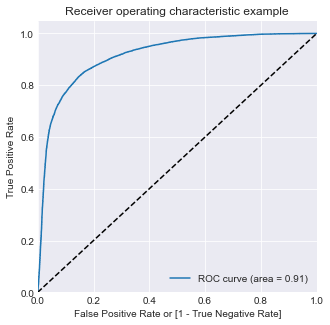

In [128]:
draw_roc(y_train_pred.Churn, y_train_pred.Churn_Pred)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [129]:
# Trying different threshold cutoffs 

numbers = np.arange(0, 1, 0.1)

for i in numbers:
    y_train_pred['thresh_' + str(i.round(2))]= y_train_pred['Churn_Pred'].map(lambda x: 1 if x > i.round(2) else 0)
    
y_train_pred.head()

Churn  Churn_Pred  thresh_0.5  thresh_0.0  thresh_0.1  thresh_0.2  \
49982      1    0.900405           1           1           1           1   
18898      1    0.933967           1           1           1           1   
4390       0    0.219028           0           1           1           1   
40598      1    0.983743           1           1           1           1   
32900      1    0.948898           1           1           1           1   

       thresh_0.3  thresh_0.4  thresh_0.6  thresh_0.7  thresh_0.8  thresh_0.9  
49982           1           1           1           1           1           1  
18898           1           1           1           1           1           1  
4390            0           0           0           0           0           0  
40598           1           1           1           1           1           1  
32900           1           1           1           1           1           1

In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob', 'accuracy', 'sensitivity', 'specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred['Churn'], y_train_pred['thresh_' + str(i.round(2))])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i, accuracy, sensi, speci]
cutoff_df

prob  accuracy  sensitivity  specificity
0.0   0.0  0.500013     1.000000     0.000000
0.1   0.1  0.707769     0.980624     0.434900
0.2   0.2  0.779085     0.947415     0.610746
0.3   0.3  0.815610     0.912133     0.719082
0.4   0.4  0.834054     0.875194     0.792912
0.5   0.5  0.842577     0.839706     0.845448
0.6   0.6  0.838924     0.794166     0.883685
0.7   0.7  0.830169     0.741685     0.918657
0.8   0.8  0.806673     0.664232     0.949122
0.9   0.9  0.713442     0.451093     0.975804

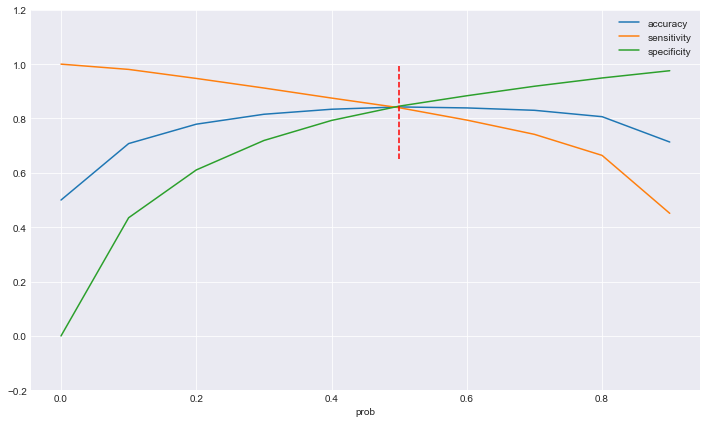

In [131]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot(kind = 'line', x = 'prob', y = ['accuracy', 'sensitivity', 'specificity'], figsize = [12, 7])

plt.ylim(-0.2, 1.2)
plt.plot([0.5, 0.5], [0.65, 1.0], color = 'red', linestyle = 'dashed')

plt.show()

**From the curve above, 0.5 is the optimum point to take it as a cutoff probability.**

In [132]:
y_train_pred['Logistic'] = y_train_pred.Churn_Pred.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred.head()

Churn  Churn_Pred  thresh_0.5  thresh_0.0  thresh_0.1  thresh_0.2  \
49982      1    0.900405           1           1           1           1   
18898      1    0.933967           1           1           1           1   
4390       0    0.219028           0           1           1           1   
40598      1    0.983743           1           1           1           1   
32900      1    0.948898           1           1           1           1   

       thresh_0.3  thresh_0.4  thresh_0.6  thresh_0.7  thresh_0.8  thresh_0.9  \
49982           1           1           1           1           1           1   
18898           1           1           1           1           1           1   
4390            0           0           0           0           0           0   
40598           1           1           1           1           1           1   
32900           1           1           1           1           1           1   

       Logistic  
49982         1  
18898         1  
4390          0  
40598         1  
32900         1

In [133]:
# Function to plot confusion matrix

def plot_ConfusionMatrix_metrics(
    conf_mat, 
    test_y, 
    pred_y, 
    figsize = None, 
    class_names = None, 
    hide_spines = False, 
    hide_ticks = False, 
    title = ''
): 
    '''
    conf_mat: Output of the sklearn's confusion_matrix method
    test_y: The true values of dependent variable
    pred_y: The predicted values of dependent variable
    figsize: The size of confusion matrix plot that needs to be displayed
    class_names: Axes titles
    hide_splines: Option to remove splines. Default False
    hide_ticks: OPtion to hide ticks. Default False
    title: Title of the graph
    '''
    if figsize is None:
        figsize = (len(conf_mat)*3, len(conf_mat)*3)
    
    fig, ax = plt.subplots(figsize = figsize)
    
    cmap = ListedColormap(['c', '#ebab92', '#9b36c9'])
    
    matshow = ax.matshow(conf_mat, cmap = cmap)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ''
            cell_text += format(conf_mat[i, j], '.0f')
            ax.text(x=j,
                        y=i,
                        s=cell_text,
                        va='center',
                        ha='center',
                        fontsize = 20,
                        color="black")

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
    ax.xaxis.set_ticks_position('top')
    
    ax.set_xticklabels(class_names, fontsize = 17)
    ax.set_yticklabels(class_names, fontsize = 17)
    ax.xaxis.set_label_coords(0.5, 1.15)
    
    plt.title(title, fontsize = 20, y = 1.2)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    
    ax.text(2.5, 0.2, 'Accuracy %:' + str(round(accuracy_score(test_y, pred_y) * 100, 2)), fontsize = 17)
    ax.text(1.8, 0.4, 'Precision %: ' + str(round(precision_score(test_y, pred_y) *100, 2)), fontsize = 17)
    ax.text(3.4, 0.4, 'Sensitivity: ' + str(round(conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0]), 2)), fontsize = 17)
    ax.text(1.8, 0.7, 'Specificity: ' + str(round(conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1]), 2)), fontsize = 17)
    ax.text(3.4, 0.7, 'F1 Score: ' + str(round(f1_score(test_y, pred_y), 2)), fontsize = 17)
    ax.text(2.725, 0.55, 'AUC: ' + str(round(roc_auc_score(test_y, pred_y), 2)), fontsize = 17)
    
    plt.tight_layout()

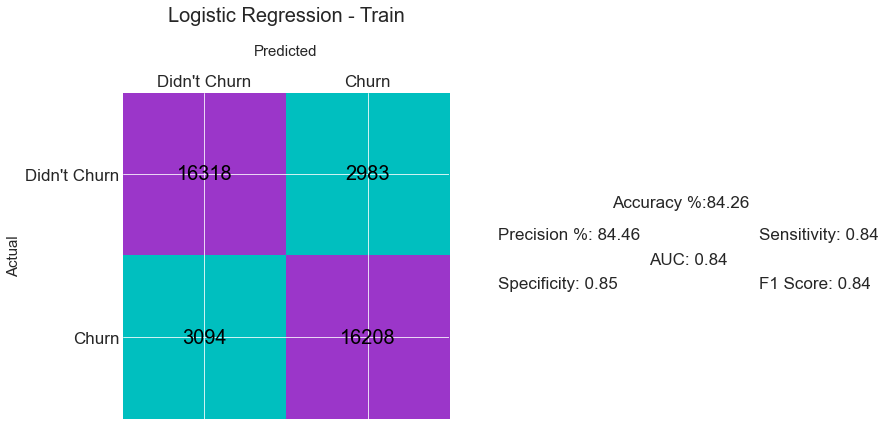

In [134]:
#plotting the confusion matrix for Train dataset
plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred['Churn'], y_train_pred['Logistic']), 
                             y_train_pred['Churn'], y_train_pred['Logistic'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Logistic Regression - Train')

### Precision-Recall Curve

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred['Churn'], y_train_pred['Churn_Pred'])

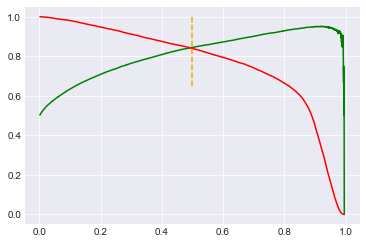

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.plot([0.5, 0.5], [0.65, 1.0], color = 'orange', linestyle = 'dashed')

plt.show()

#### Metrics on test data

In [137]:
X_train_log = sm.add_constant(X_test[col])

y_test_pred = res.predict(X_train_log)

y_test_pred = pd.DataFrame({'Churn': y_test.values, 'Churn_Pred': y_test_pred})
y_test_pred['Logistic'] = y_test_pred['Churn_Pred'].map(lambda x: 1 if x > 0.533 else 0)

y_test_pred.head()

Churn  Churn_Pred  Logistic
29697      1    0.736335         1
41464      1    0.958654         1
44500      1    0.886705         1
43725      1    0.947991         1
20152      0    0.688216         1

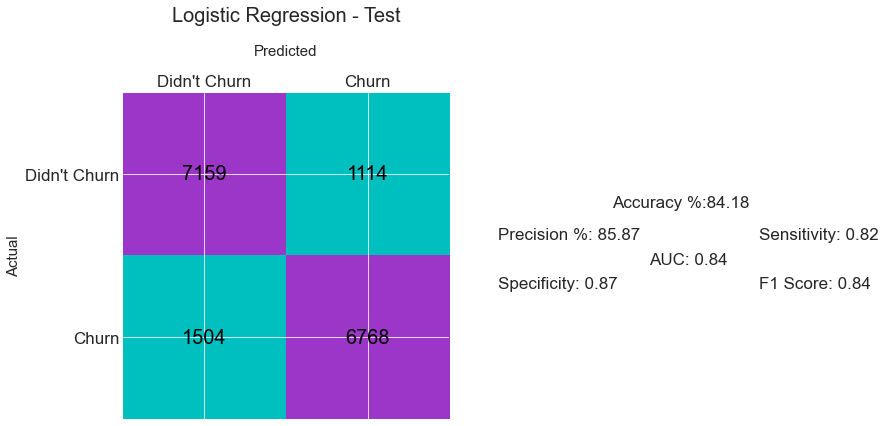

In [138]:
plot_ConfusionMatrix_metrics(confusion_matrix(y_test_pred['Churn'], y_test_pred['Logistic']), 
                             y_test_pred['Churn'], y_test_pred['Logistic'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Logistic Regression - Test')

#### The Model produces similar metrics on both train and test data. The model is a good fit and all the model features explain the churn factor well.

In [139]:
#initialising a random forest classifier 
rf = RandomForestClassifier(random_state=42)

In [140]:
#fitting the random forest on train data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [141]:
#checking the type of estimators 
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [142]:
#making predictions on train data
y_train_pred['Churn_RandomForest'] = rf.predict(X_train)

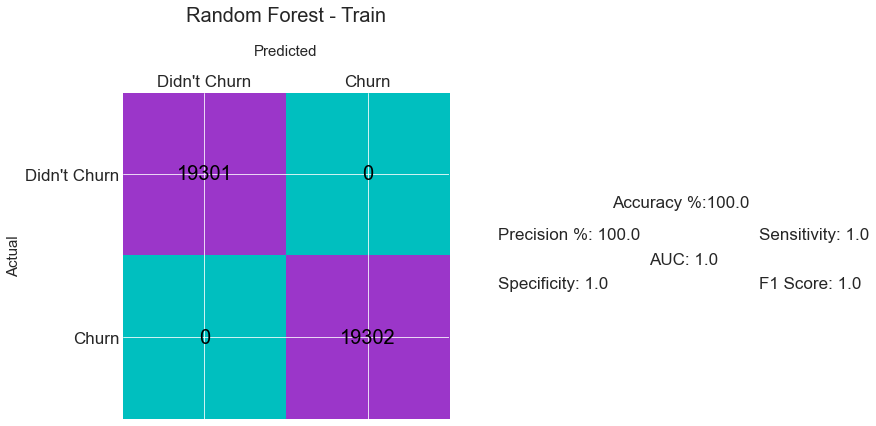

In [143]:
#plotting the confusion matrix on train data set
plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred['Churn'], y_train_pred['Churn_RandomForest']), 
                             y_train_pred['Churn'], y_train_pred['Churn_RandomForest'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Random Forest - Train')

> The model is having 100% accuracy may be overfitting

### Random Forest Classifier with hyperparameter tuning and cross-validation

In [144]:
#initialising a random forest classifier 
classifier_rf = RandomForestClassifier(random_state=42)

In [145]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth' : [20,30] ,
    'min_samples_leaf':[50,100],
    'min_samples_split':[100,150],
    'n_estimators':[30, 50]
}

In [146]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=3, verbose=1, scoring = "f1")

In [147]:
%%time

#fitting the grid search model on train data set
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Wall time: 3min 17s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [30, 50]},
             scoring='f1', verbose=1)

In [148]:
# results of grid search in a dataframe 
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.282435      0.132820         0.094477        0.009628   
1       5.563611      0.119725         0.145253        0.011894   
2       3.119406      0.082114         0.078677        0.000393   
3       4.976582      0.061865         0.126596        0.009466   
4       2.666468      0.033935         0.074290        0.001699   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0              20                     50                     100   
1              20                     50                     100   
2              20                     50                     150   
3              20                     50                     150   
4              20                    100                     100   

  param_n_estimators                                             params  \
0                 30  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
1                 50  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
2                 30  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
3                 50  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
4                 30  {'max_depth': 20, 'min_samples_leaf': 100, 'mi...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.901979           0.898742           0.906746         0.902489   
1           0.901902           0.899578           0.907761         0.903080   
2           0.902665           0.896832           0.906191         0.901896   
3           0.903368           0.896777           0.907130         0.902425   
4           0.892846           0.885433           0.900126         0.892801   

   std_test_score  rank_test_score  
0        0.003287                5  
1        0.003443                2  
2        0.003859                7  
3        0.004279                6  
4        0.005999               13

In [149]:
#finding the best estimator 
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=50, random_state=42)

In [150]:
#fine tuned model
classifier_rf = RandomForestClassifier(random_state = 42, max_depth = 20, min_samples_leaf = 50, min_samples_split = 100, 
                                       n_estimators = 50)

In [151]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [152]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [153]:
#prediction on train data
y_train_pred['Churn_RandomForestTuned'] = rf.predict(X_train)

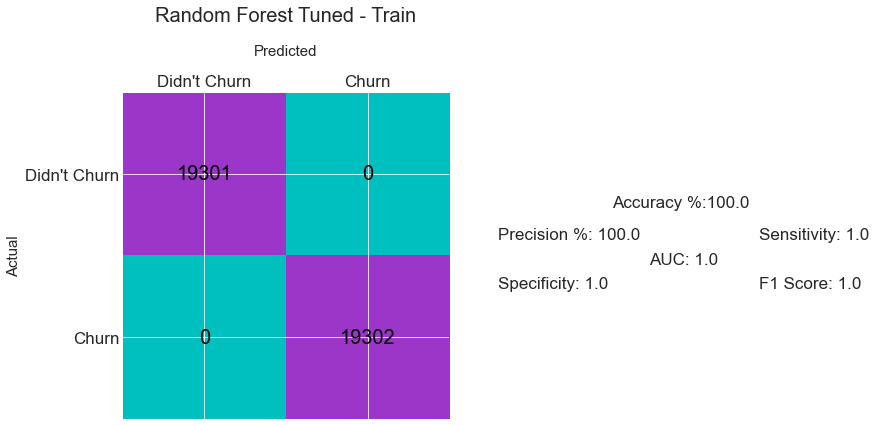

In [154]:
#confusion matrix on train data
plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred['Churn'], y_train_pred['Churn_RandomForestTuned']), 
                             y_train_pred['Churn'], y_train_pred['Churn_RandomForestTuned'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Random Forest Tuned - Train')

Acuracy is 100% model might be overfitting

In [155]:
#prediction on test data
y_test_pred['Churn_RandomForestTuned'] = rf.predict(X_test)

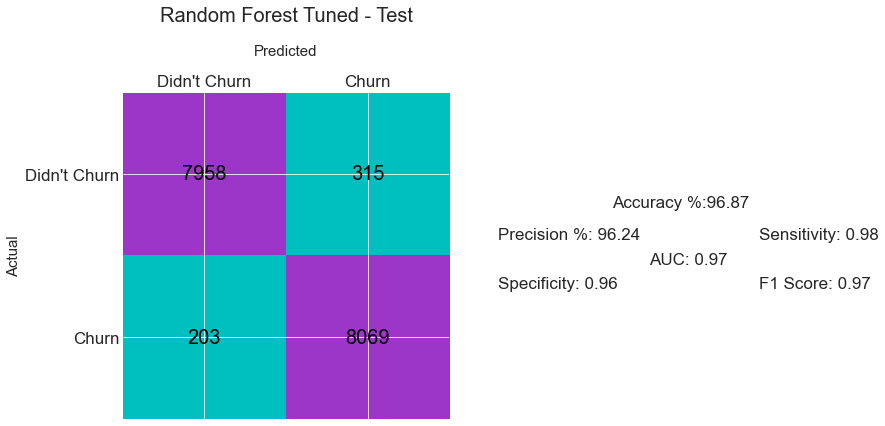

In [156]:
#confusion matrix on test data
plot_ConfusionMatrix_metrics(confusion_matrix(y_test_pred['Churn'], y_test_pred['Churn_RandomForestTuned']), 
                             y_test_pred['Churn'], y_test_pred['Churn_RandomForestTuned'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Random Forest Tuned - Test')

> Not much of a drop in accuracy/F1 score on the test set, hence not overfitting.
>> Performing and generalizing better than Logistic Regression

### Random Forest Classifier with PCA

In [157]:
#initialising a random forest classifier 
rf = RandomForestClassifier(random_state=42)

In [158]:
#fitting the random forest on train data
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [159]:
#checking the type of estimators 
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [160]:
#making predictions on train data
y_train_pred['Churn_RandomForestPCA'] = rf.predict(X_train_pca)

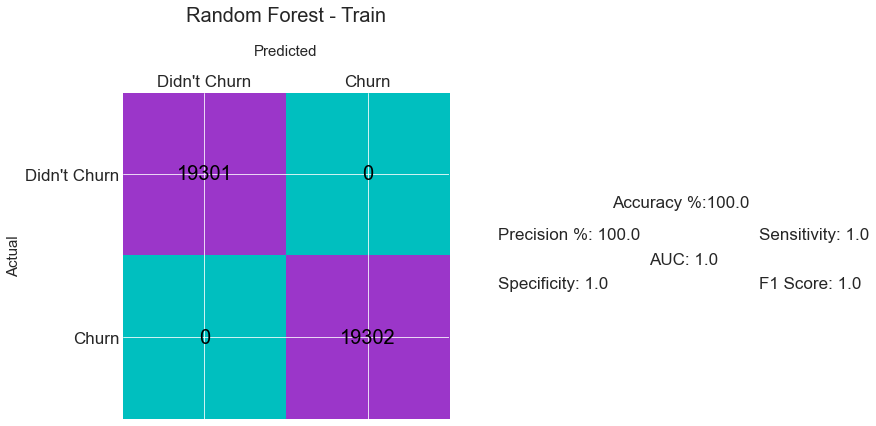

In [161]:
#plotting the confusion matrix on train data set
plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred['Churn'], y_train_pred['Churn_RandomForestPCA']), 
                             y_train_pred['Churn'], y_train_pred['Churn_RandomForestPCA'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Random Forest - Train')

### Random Forest Classifier with PCA, hyperparameter tuning and cross-validation

In [162]:
#initialising a random forest classifier 
classifier_rf = RandomForestClassifier(random_state=42)

In [163]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth' : [20,30] ,
    'min_samples_leaf':[50,100],
    'min_samples_split':[100,150],
    'n_estimators':[30, 50]
}

In [164]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=3, verbose=1, scoring = "f1")

In [165]:
%%time

#fitting the grid search model on train data set
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Wall time: 4min 22s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [30, 50]},
             scoring='f1', verbose=1)

In [166]:
# results of grid search in a dataframe 
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.055016      0.026056         0.057288    7.366145e-03   
1       6.737076      0.035049         0.101950    1.160572e-02   
2       4.010593      0.032183         0.057288    7.365021e-03   
3       6.624141      0.019084         0.093745    2.247832e-07   
4       3.627555      0.047903         0.057288    7.364797e-03   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0              20                     50                     100   
1              20                     50                     100   
2              20                     50                     150   
3              20                     50                     150   
4              20                    100                     100   

  param_n_estimators                                             params  \
0                 30  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
1                 50  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
2                 30  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
3                 50  {'max_depth': 20, 'min_samples_leaf': 50, 'min...   
4                 30  {'max_depth': 20, 'min_samples_leaf': 100, 'mi...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.873074           0.872886           0.873350         0.873103   
1           0.874859           0.874000           0.875503         0.874787   
2           0.867077           0.868250           0.868546         0.867958   
3           0.867093           0.867474           0.870645         0.868404   
4           0.857817           0.860467           0.860739         0.859674   

   std_test_score  rank_test_score  
0        0.000191                4  
1        0.000616                2  
2        0.000634                8  
3        0.001592                6  
4        0.001318               13

In [167]:
#finding the best estimator 
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=50, random_state=42)

In [168]:
#fine tuned model
classifier_rf = RandomForestClassifier(random_state = 42, max_depth = 20, min_samples_leaf = 50, min_samples_split = 100, 
                                       n_estimators = 50)

In [169]:
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [170]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [171]:
#prediction on train data
y_train_pred['Churn_RandomForestPCATuned'] = rf.predict(X_train_pca)

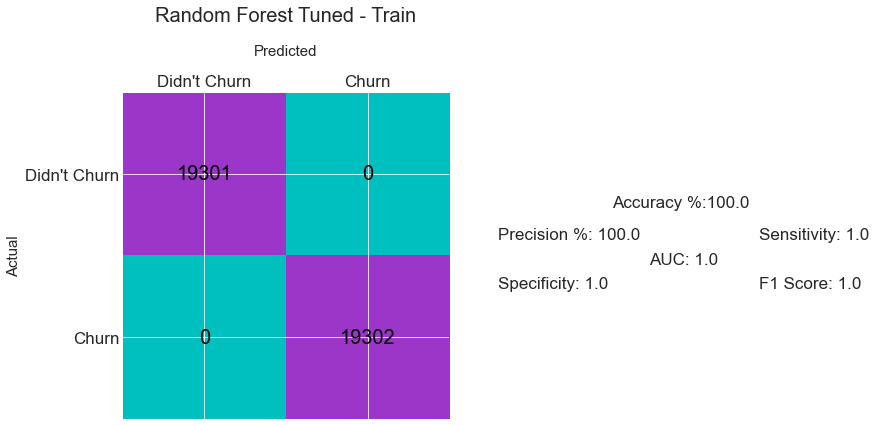

In [172]:
#confusion matrix on train data
plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred['Churn'], y_train_pred['Churn_RandomForestPCATuned']), 
                             y_train_pred['Churn'], y_train_pred['Churn_RandomForestPCATuned'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Random Forest Tuned - Train')

In [173]:
#prediction on test data
y_test_pred['Churn_RandomForestPCATuned'] = rf.predict(X_test_pca)

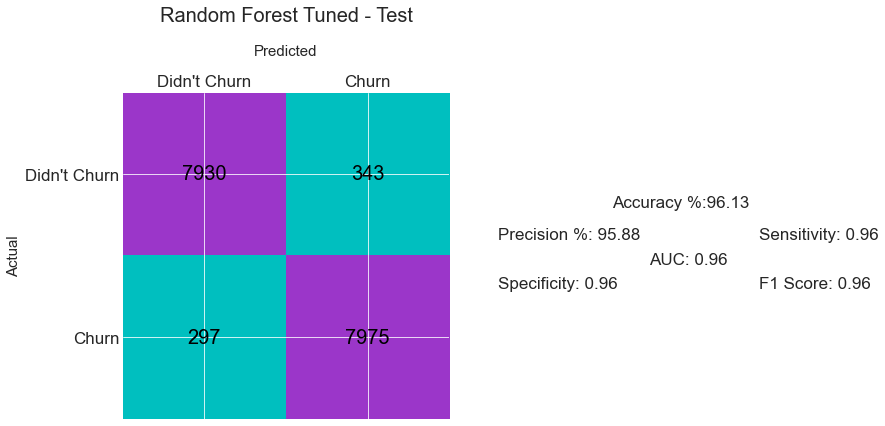

In [174]:
#confusion matrix on test data
plot_ConfusionMatrix_metrics(confusion_matrix(y_test_pred['Churn'], y_test_pred['Churn_RandomForestPCATuned']), 
                             y_test_pred['Churn'], y_test_pred['Churn_RandomForestPCATuned'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'Random Forest Tuned - Test')

> Not much of a drop in accuracy/F1 score on the test set, hence not overfitting.
>> Performing and generalizing better than Logistic Regression

In [175]:
# Running XGBoost Base Model Classifier

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train_pca, y_train)

[20:40:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [176]:
# Predicting on the train set

y_train_pred['Churn_XGBoost'] = xgclf.predict(X_train_pca)

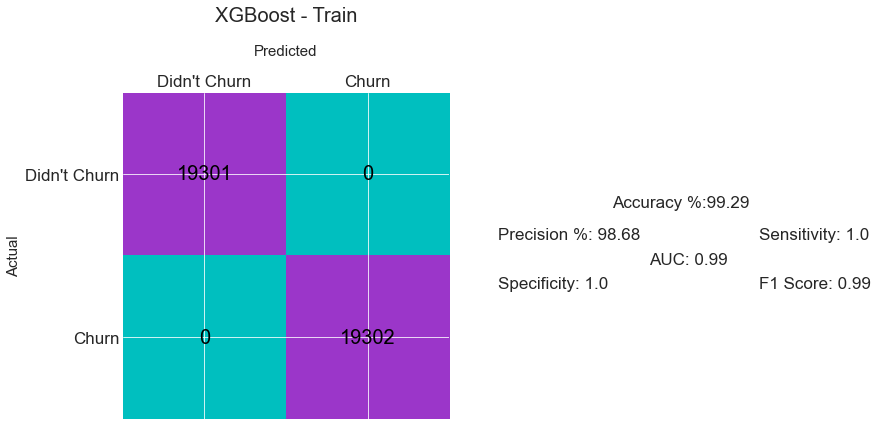

In [177]:
#confusion matrix on train data
plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred['Churn'], y_train_pred['Churn_RandomForestTuned']), 
                             y_train_pred['Churn'], y_train_pred['Churn_XGBoost'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'XGBoost - Train')

> The model is having 100% accuracy may be overfitting

In [178]:
%%time

# fine tuning XGBoost I

xgb_model = xgb.XGBClassifier()

parameters = {
    'learning_rate':[0.01,0.05], 
  'n_estimators':[20, 30, 40], 
  'max_depth':[4], 
  'min_child_weight':[7, 11], 
  'subsample':[0.4, 0.3],
}

scorer = metrics.make_scorer(metrics.f1_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator = xgb_model,
                       param_grid = parameters,
                       cv = 4,
                       scoring = scorer,
                       refit = True)

clf_xgb.fit(X_train_pca, y_train)

[20:40:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:40:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [179]:
#finding the best estimator 

print(clf_xgb.best_params_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 20, 'subsample': 0.4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [180]:
%%time

# fine tuning XGBoost II

xgb_model = xgb.XGBClassifier(learning_rate= 0.01, max_depth= 4, min_child_weight= 7, n_estimators= 20, subsample= 0.4)

parameters = {
      'learning_rate':[0.01,0.05],
          'reg_alpha':[1,5],
          'reg_lambda':[1,3],
          'gamma':[0.1,0.5]}

scorer = metrics.make_scorer(metrics.f1_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator = xgb_model,
                       param_grid = parameters,
                       cv = 4,
                       scoring = scorer,
                       refit = True)

clf_xgb.fit(X_train_pca, y_train)

[20:43:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:43:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=4, min_child_weight=7,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=20, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.4,
                                     tree_method=None, validat

In [181]:
#finding the best estimator 

print(clf_xgb.best_params_)
print(clf_xgb.best_estimator_)

{'gamma': 0.1, 'learning_rate': 0.01, 'reg_alpha': 1, 'reg_lambda': 1}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [182]:
# Fined tuned XGBoost Classifier

clf_xgb = xgb.XGBClassifier(learning_rate= 0.01, max_depth= 4, min_child_weight= 7, n_estimators= 20, subsample= 0.4, colsample_bytree= 0.6, gamma= 0.1, reg_alpha= 1, reg_lambda= 1)

In [183]:
# Running XGBoost Final Model Classifier
clf_xgb.fit(X_train_pca, y_train)

[20:44:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
# Predicting on the train set
y_train_pred['Churn_XGBoostTuned'] = clf_xgb.predict(X_train_pca)

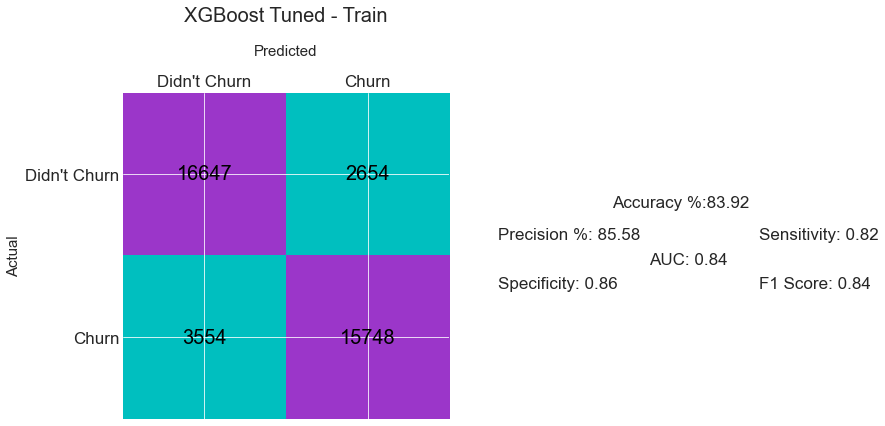

In [185]:
plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred['Churn'], y_train_pred['Churn_XGBoostTuned']), 
                             y_train_pred['Churn'], y_train_pred['Churn_XGBoostTuned'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'XGBoost Tuned - Train')

In [186]:
# Predicting on the test set

y_test_pred['Churn_XGBoostTuned'] = clf_xgb.predict(X_test_pca)

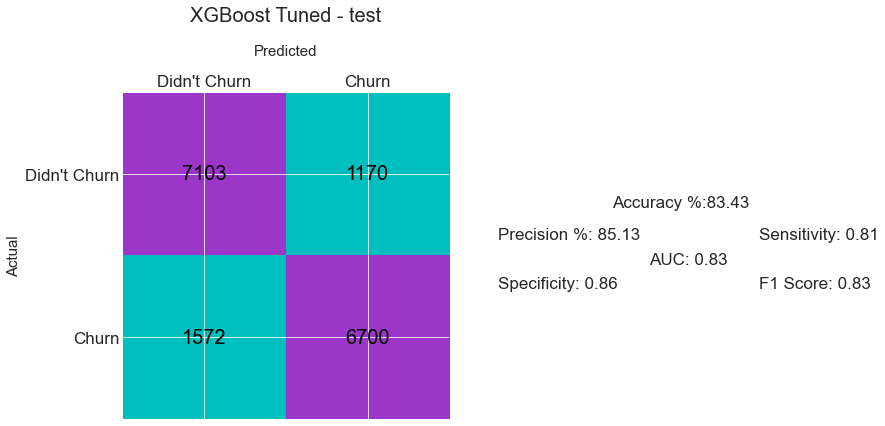

In [187]:
plot_ConfusionMatrix_metrics(confusion_matrix(y_test_pred['Churn'], y_test_pred['Churn_XGBoostTuned']), 
                             y_test_pred['Churn'], y_test_pred['Churn_XGBoostTuned'], 
                             class_names = ['Didn\'t Churn', 'Didn\'t Churn', 'Churn'], 
                             title = 'XGBoost Tuned - test')

The train and test accuracy are almost similar. This model is generalisng better than logistic regression and random forest

# Comparing all models - Evaluation Metrics

In [188]:
def metrics(
    test_y,
    pred_y,
    conf_mat
):
    x = list()
    x.append(round(accuracy_score(test_y, pred_y) * 100, 2))
    x.append(round(precision_score(test_y, pred_y) *100, 2))
    x.append(round(conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0]), 2))
    x.append(round(conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1]), 2))
    x.append(round(f1_score(test_y, pred_y), 2))
    x.append(round(roc_auc_score(test_y, pred_y), 2))
    return x

In [189]:
# Metrics for Train data-set models

train_metrics_df = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC'])
for i in y_train_pred.columns[y_train_pred.columns.str.contains('Churn|Log')][2:]:
    train_metrics_df.loc[i, :] = metrics(y_train_pred[i], y_train_pred['Churn'], confusion_matrix(y_train_pred['Churn'], y_train_pred[i]))
train_metrics_df

Accuracy Precision Sensitivity Specificity  \
Logistic                      84.26     83.97        0.84        0.85   
Churn_RandomForest            100.0     100.0         1.0         1.0   
Churn_RandomForestTuned       100.0     100.0         1.0         1.0   
Churn_RandomForestPCA         100.0     100.0         1.0         1.0   
Churn_RandomForestPCATuned    100.0     100.0         1.0         1.0   
Churn_XGBoost                 99.29     99.91         1.0        0.99   
Churn_XGBoostTuned            83.92     81.59        0.82        0.86   

                           F1 Score   AUC  
Logistic                       0.84  0.84  
Churn_RandomForest              1.0   1.0  
Churn_RandomForestTuned         1.0   1.0  
Churn_RandomForestPCA           1.0   1.0  
Churn_RandomForestPCATuned      1.0   1.0  
Churn_XGBoost                  0.99  0.99  
Churn_XGBoostTuned             0.84  0.84

In [190]:
# Metrics for Test data-set models

test_metrics_df = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'AUC'])
for i in y_test_pred.columns[y_test_pred.columns.str.contains('Churn|Log')][2:]:
    test_metrics_df.loc[i, :] = metrics(y_test_pred[i], y_test_pred['Churn'], confusion_matrix(y_test_pred['Churn'], y_test_pred[i]))
test_metrics_df

Accuracy Precision Sensitivity Specificity  \
Logistic                      84.18     81.82        0.82        0.87   
Churn_RandomForestTuned       96.87     97.55        0.98        0.96   
Churn_RandomForestPCATuned    96.13     96.41        0.96        0.96   
Churn_XGBoostTuned            83.43      81.0        0.81        0.86   

                           F1 Score   AUC  
Logistic                       0.84  0.84  
Churn_RandomForestTuned        0.97  0.97  
Churn_RandomForestPCATuned     0.96  0.96  
Churn_XGBoostTuned             0.83  0.84

In [191]:
for i in test_metrics_df.index:
    print(i)
    compare_metrics = pd.concat([train_metrics_df.loc[i, :], test_metrics_df.loc[i, :]], axis = 1)
    compare_metrics.columns = ['Train', 'Test']
    print(compare_metrics)
    print('\n\n')

Logistic
             Train   Test
Accuracy     84.26  84.18
Precision    83.97  81.82
Sensitivity   0.84   0.82
Specificity   0.85   0.87
F1 Score      0.84   0.84
AUC           0.84   0.84



Churn_RandomForestTuned
             Train   Test
Accuracy     100.0  96.87
Precision    100.0  97.55
Sensitivity    1.0   0.98
Specificity    1.0   0.96
F1 Score       1.0   0.97
AUC            1.0   0.97



Churn_RandomForestPCATuned
             Train   Test
Accuracy     100.0  96.13
Precision    100.0  96.41
Sensitivity    1.0   0.96
Specificity    1.0   0.96
F1 Score       1.0   0.96
AUC            1.0   0.96



Churn_XGBoostTuned
             Train   Test
Accuracy     83.92  83.43
Precision    81.59   81.0
Sensitivity   0.82   0.81
Specificity   0.86   0.86
F1 Score      0.84   0.83
AUC           0.84   0.84





# Feature Importance

## Logistic Regression

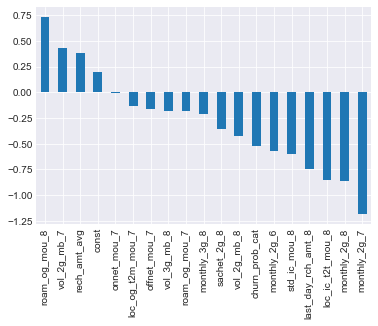

In [192]:
importance = res.params
importance.sort_values(ascending = False, inplace = True)
importance.plot(kind = 'bar')
plt.show()

> A positive co-efficients indicate for class 0 ('Not churn') while negative for class 1 ('Churn')

## Random Forest without PCA

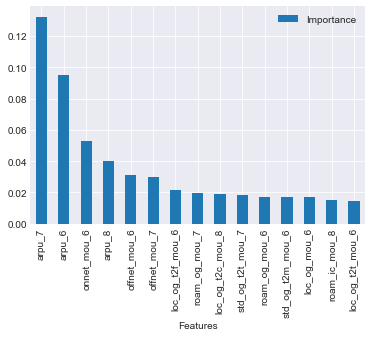

In [193]:
importance = pd.DataFrame([X_train.columns, rf.feature_importances_]).T
importance.columns = ['Features', 'Importance']
importance.sort_values(by = 'Importance', ascending = False, inplace = True)
importance[:15].plot(kind = 'bar', x = 'Features')
plt.show()

## Final Model Selection
The Business Problem Highlights that the tolerance for False Negatives should be minimum but Precision should also have a fair balance so company avoid spending too much funds on  rolling out schemes towards False Positives.<br> 
#### After considering Accuracy, Recall and Precision Balance the final model selected is XGB Hypertuned model on dimension reduced PCA data with SMOTE

Some of the factors that affect churn are :
1. Average Revenue Per User for both good and action phase.
2. The roaming outgoing minutes of usage in both good and action phase.
3. The roaming incoming minutes of usage in action phase.

Some measures the company can take to prevent churn is :
1. The Network operators must futher investigate their roaming tariffs, and quality of service.
2. Roll out attractive offers on roaming packages based on previous month's roaming usage.
3. If the network and service quality for roaming is the issue proper measures have to be taken to fix that to avoid long term loss of customers.
4. We can also notice that high data usage customers churn lesser the company must focus on providing best service at affordable prices in order to gain customer loyalty. 
5. The minimum recharge value can be as low as possible so that they can retain customers who mostly use only incoming services to retain customers. Since customer retention could be much more cost effective when compared to customer acquisition